In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
model = ExtraTreesRegressor(random_state=1)

# Loading Data

In [3]:
study = pd.read_csv('../brassica.csv')
study = study.drop(['crossovers', 'gametes', 'R', 'd', 'cM'], axis = 1)

study_kmers = study.iloc[:,0:70] 
study_expression = study[['cross', 'reference', 'chr', 'start', 'end','srec', 'gene', 'mRNA', 'exon', 'CDS']]
study_transposons = study.iloc[:, list(range(0, 6))  + list(range(74, study.shape[1]))]

# Reverse-complements

In [6]:
df_original = study_kmers
df_new = df_original[['cross','reference','chr', 'start', 'end','srec']].copy()

# List of complementary trimers
complementaries = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}

# Set to track processed trimers
processed = set()

# Iterate over the columns of the original DataFrame
for column in df_original.columns[6:-1]:  # Start from the eleventh column
    trimer = column[:3]  # Get the current trimer (e.g., 'AAA')
    
    # Avoid processing the same trimer more than once
    if trimer not in processed:
        complementary = ''.join([complementaries[base] for base in reversed(trimer)])  # Get the complementary trimer (e.g., 'TTT')
        
        # Sum the corresponding columns and add a new column to the new DataFrame
        df_new[trimer + '_' + complementary] = df_original[trimer] + df_original[complementary]
        
        # Add the trimer and its complementary to the set of processed trimers
        processed.add(trimer)
        processed.add(complementary)
        
study_kmers2 = df_new

study2 = study_kmers2.merge(study_expression, on=['cross', 'reference','chr', 'start', 'end', 'srec' ]) 
study2 = study2.merge(study_transposons, on=['cross', 'reference','chr', 'start', 'end', 'srec' ])
study2.head()

cross reference   chr   start     end      srec  AAA_TTT  \
0  broccoli_cauliflower  broccoli  chr1       0  100000  0.000000    10211   
1  broccoli_cauliflower  broccoli  chr1  100000  200000  0.000000     8607   
2  broccoli_cauliflower  broccoli  chr1  200000  300000  0.000000     9715   
3  broccoli_cauliflower  broccoli  chr1  300000  400000  0.036497     9583   
4  broccoli_cauliflower  broccoli  chr1  400000  500000  0.032847     9883   

   AAC_GTT  AAG_CTT  AAT_ATT  ...  LINE/L2  LINE/Rex-Babar  SINE  \
0     4046     3224     6793  ...        0               0     0   
1     3784     4268     5584  ...        0               0     0   
2     4085     3807     6370  ...        0               0     0   
3     3997     3850     6207  ...        0               0     0   
4     3941     4052     6189  ...        0               0     0   

   Retroposon/L1-dep  Satellite  LINE/RTE-BovB  DNA/Sola-1  LTR/Caulimovirus  \
0                  0          0              0           0                 0   
1                  0          0              0           0                 0   
2                  0          0              0           0                 0   
3                  0          0              0           0                 0   
4                  0          0              0           0                 0   

   DNA/Maverick  rRNA  
0             0     0  
1             0     0  
2             0     0  
3             0     0  
4             0     0  

[5 rows x 80 columns]

In [7]:
kale_white = study2[study2['cross'] == 'kale_white']

In [8]:
kale_white

cross reference   chr     start       end      srec  AAA_TTT  \
62221  kale_white      kale  chr1         0    100000  0.000000    11030   
62222  kale_white      kale  chr1    100000    200000  0.000000     8878   
62223  kale_white      kale  chr1    200000    300000  0.017857     9257   
62224  kale_white      kale  chr1    300000    400000  0.033929     9752   
62225  kale_white      kale  chr1    400000    500000  0.066379     9768   
...           ...       ...   ...       ...       ...       ...      ...   
72661  kale_white     white  chr9  65200000  65300000  0.300418    13046   
72662  kale_white     white  chr9  65300000  65400000  0.288233    10420   
72663  kale_white     white  chr9  65400000  65500000  0.259410     9892   
72664  kale_white     white  chr9  65500000  65600000  0.233469    10062   
72665  kale_white     white  chr9  65600000  65700000  0.210122    11053   

       AAC_GTT  AAG_CTT  AAT_ATT  ...  LINE/L2  LINE/Rex-Babar  SINE  \
62221     4716     2941     6825  ...        0               0     0   
62222     3878     3987     5862  ...        0               0     0   
62223     3991     3962     6027  ...        0               0     0   
62224     3962     3940     6243  ...        0               0     0   
62225     3937     4105     6037  ...        0               0     0   
...        ...      ...      ...  ...      ...             ...   ...   
72661     4398     2857     7986  ...        0               0     0   
72662     4296     3396     6915  ...        0               0     0   
72663     4080     3727     6619  ...        0               0     0   
72664     4108     3840     6310  ...        0               0     0   
72665     4214     3150     7142  ...        0               0     0   

       Retroposon/L1-dep  Satellite  LINE/RTE-BovB  DNA/Sola-1  \
62221                  0          0              0           0   
62222                  0          0              0           0   
62223                  0          0              0           0   
62224                  0          0              0           0   
62225                  0          0              0           0   
...                  ...        ...            ...         ...   
72661                  0          0              0           0   
72662                  0          0              0           0   
72663                  0          0              0           0   
72664                  0          0              0           0   
72665                  0          0              0           0   

       LTR/Caulimovirus  DNA/Maverick  rRNA  
62221                 0             0     0  
62222                 0             0     0  
62223                 0             0     0  
62224                 0             0     0  
62225                 0             0     0  
...                 ...           ...   ...  
72661                 0             0     0  
72662                 0             0     0  
72663                 0             0     0  
72664                 0             0     0  
72665                 0             0     0  

[10445 rows x 80 columns]

In [9]:
k = kale_white[kale_white['reference']=='kale']

In [10]:
w = kale_white[kale_white['reference']=='white']

# KALE GENOME

# Data exploration

In [12]:
df = k

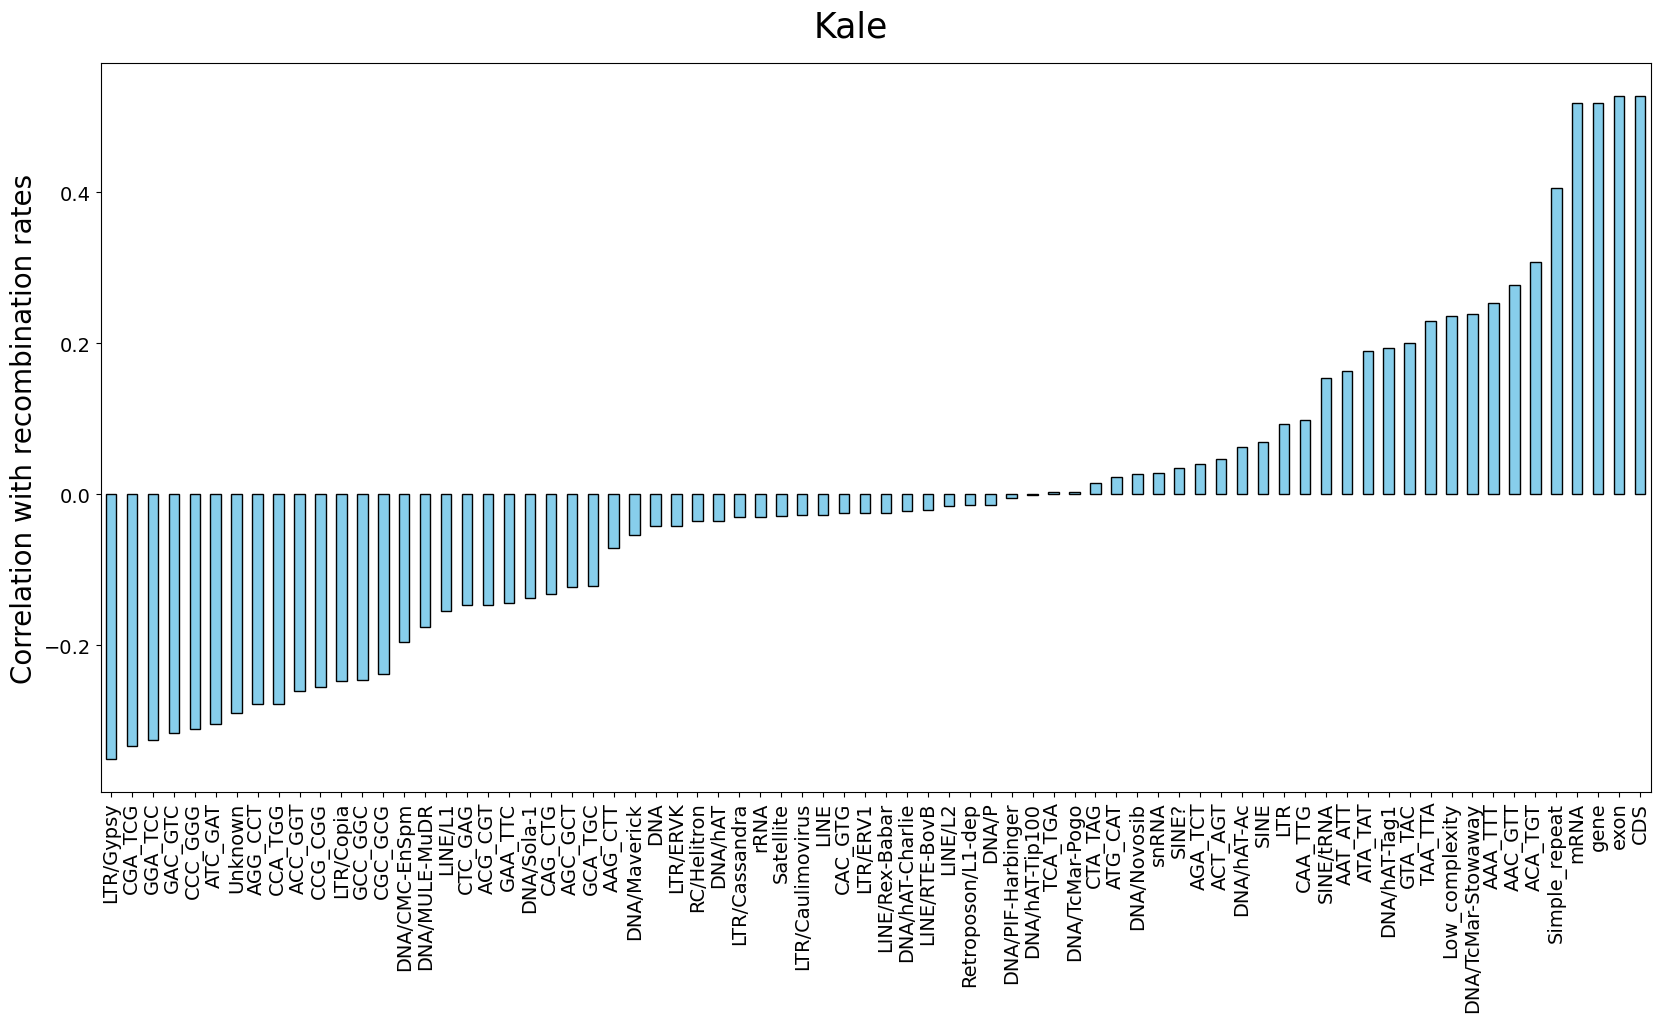

In [13]:
df_stats = df.drop(['cross', 'reference','chr','start','end'],  axis=1)
df_stats_corr = df_stats.corr()['srec'].sort_values(ascending = True)
df_corr = df_stats.corr()
df_corr = df_corr.iloc[1:, :]
fig = plt.figure(figsize=(20,9))
ax = fig.add_subplot(111)
df_corr['srec'].sort_values(ascending = True).plot(kind = 'bar', color='skyblue', edgecolor='black')
ax.set_ylabel('Correlation with recombination rates', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.suptitle('Kale', fontsize=25)
plt.subplots_adjust(top=0.92)

plt.show()

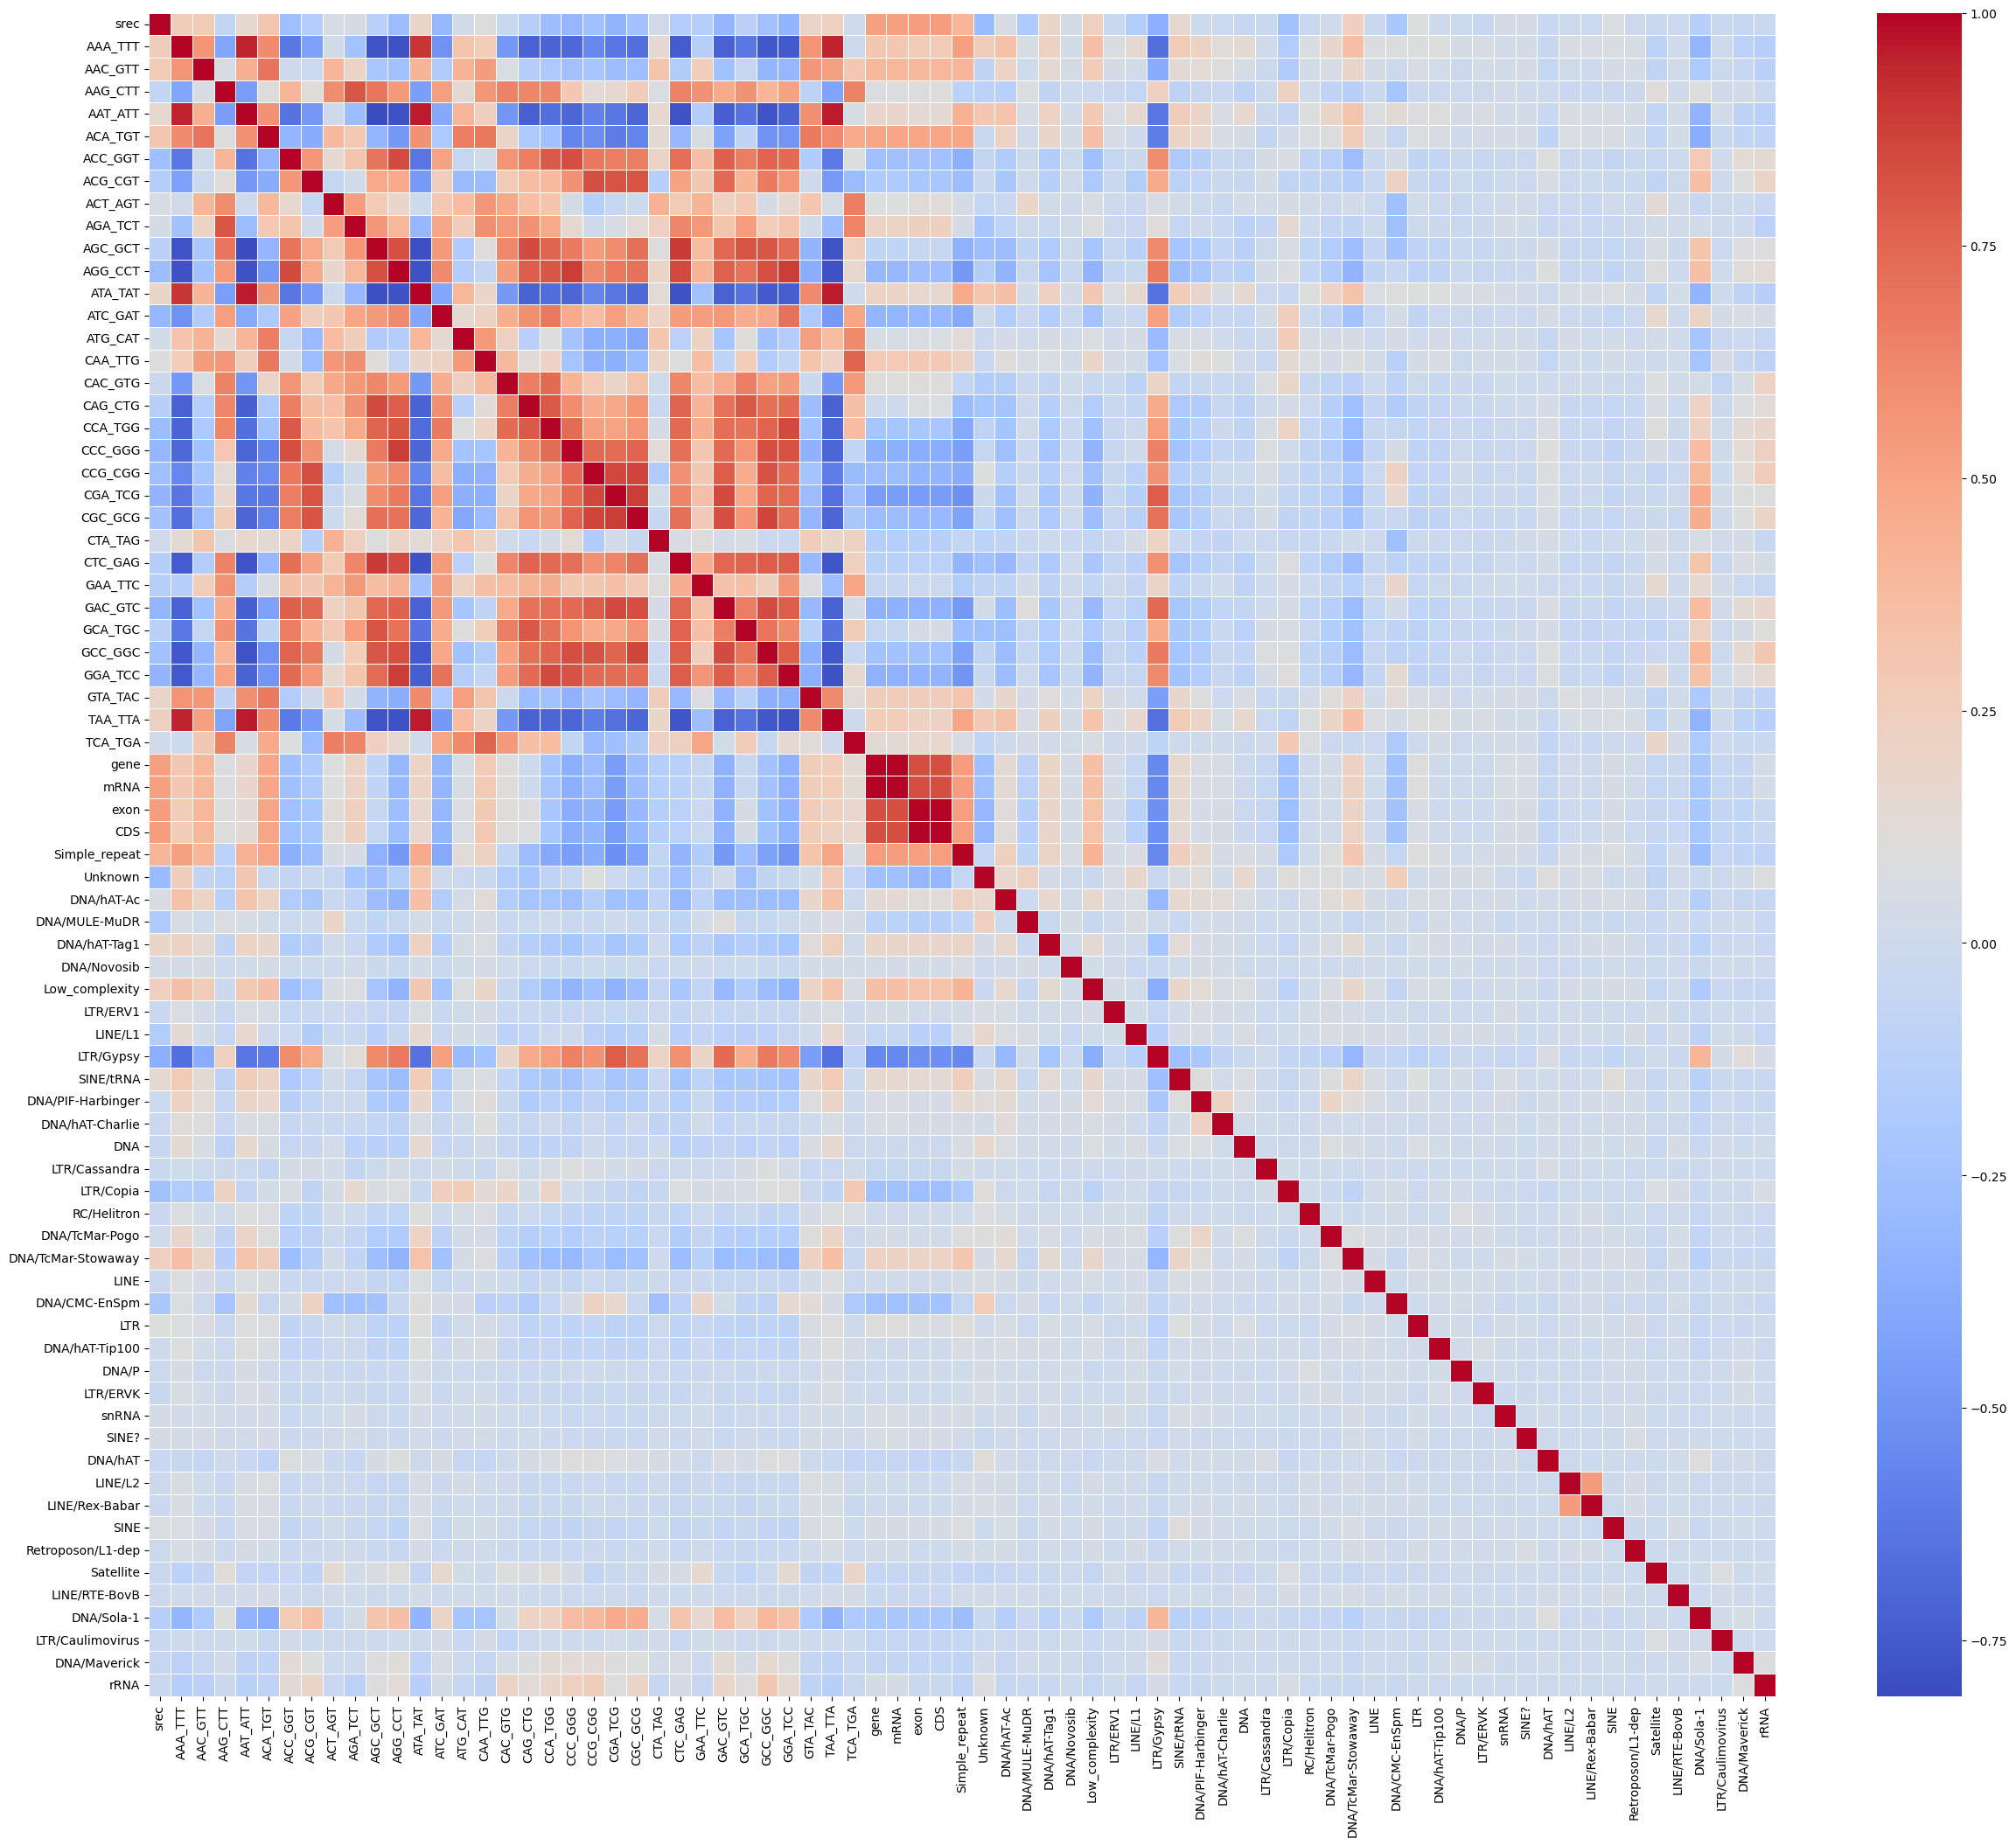

In [15]:
plt.figure(figsize=(30, 25))
sns.heatmap(df_stats.corr(), cmap= 'coolwarm', linewidths = 0.5, linecolor='white')
plt.show()

# Chromosome Split

In [16]:
chr1 = df[df['chr']== 'chr1']
chr2 = df[df['chr']== 'chr2']
chr3 = df[df['chr']== 'chr3']
chr4 = df[df['chr']== 'chr4']
chr5 = df[df['chr']== 'chr5']
chr6 = df[df['chr']== 'chr6']
chr7 = df[df['chr']== 'chr7']
chr8 = df[df['chr']== 'chr8']
chr9 = df[df['chr']== 'chr9']

In [17]:
achr1 = df[df['chr']!= 'chr1']
achr2 = df[df['chr']!= 'chr2']
achr3 = df[df['chr']!= 'chr3']
achr4 = df[df['chr']!= 'chr4']
achr5 = df[df['chr']!= 'chr5']
achr6 = df[df['chr']!= 'chr6']
achr7 = df[df['chr']!= 'chr7']
achr8 = df[df['chr']!= 'chr8']
achr9 = df[df['chr']!= 'chr9']

# Function to train models and make graphs

The model is trained with the information of all chromosomes except the information of the chromosome to be predicted.

In [18]:
def plot_chromosome_results(chr_number):
    # Replace  with 'chr{chr_number}' 
    chromosomes_data = globals()[f'achr{chr_number}']
    chr_data = globals()[f'chr{chr_number}']

    # TRAINING MODEL
    X_train = chromosomes_data.drop(['cross', 'reference','chr','start','end','srec'], axis=1)
    y_train = chromosomes_data[['srec']]

    model.fit(X_train, y_train)
    model_preds = model.predict(chr_data.drop(['cross', 'reference','chr','start','end','srec'], axis=1))
    
    #SMOOTHING
    model_spreds= np.zeros(len(model_preds))

    for i in  range(1, len(model_preds)): 
        model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9
        
    #CORRELATIONS BY QUARTILES
    c_q1 = int(len(chr_data)*0.25)
    c_q2 = int(len(chr_data)*0.50)
    c_q3 = int(len(chr_data)*0.75)
    
    rq1 = chr_data['srec'].iloc[0:c_q1]
    rq2 = chr_data['srec'].iloc[c_q1:c_q2]
    rq3 = chr_data['srec'].iloc[c_q2:c_q3]
    rq4 = chr_data['srec'].iloc[c_q3:int(len(chr_data))]

    pq1 = model_spreds[0:c_q1]
    pq2 = model_spreds[c_q1:c_q2]
    pq3 = model_spreds[c_q2:c_q3]
    pq4 = model_spreds[c_q3:int(len(chr_data))]

    corr_q1 = np.corrcoef(rq1, pq1)[0, 1]
    corr_q2 = np.corrcoef(rq2, pq2)[0, 1]
    corr_q3 = np.corrcoef(rq3, pq3)[0, 1]
    corr_q4 = np.corrcoef(rq4, pq4)[0, 1]
    
    globals()[f'corr_q1_chr{chr_number}'] = corr_q1
    globals()[f'corr_q2_chr{chr_number}'] = corr_q2
    globals()[f'corr_q3_chr{chr_number}'] = corr_q3
    globals()[f'corr_q4_chr{chr_number}'] = corr_q4
     
    # PLOTTING RESULTS
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4), gridspec_kw={'width_ratios': [10, 3]})

    # Line plot and correlation plot
    ax1.plot(chr_data.end, chr_data.srec, label='Recombination')
    ax1.plot(chr_data.end, model_spreds, label='Prediction', color='green')
    ax1.set_title(f'Kale Chromosome {chr_number}', fontsize=20)
    ax1.set_xlabel('chromosomes position (Mb)', fontsize=15)
    ax1.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
    ax1.legend(loc='upper right', fontsize=12)
    ticks = ax1.get_xticks() / 1000000
    ax1.set_xticklabels(ticks)
        
    chr_len = chr_data["end"].iloc[-1]
    q1 =round(chr_len * 0.25 / 100000) * 100000
    q2 =round(chr_len* 0.50 / 100000) * 100000
    q3 =round(chr_len * 0.75 / 100000) * 100000

    ax1.axvline(x=q1, color='gray', linestyle='-')
    ax1.axvline(x=q2, color='gray', linestyle='--')
    ax1.axvline(x=q3, color='gray', linestyle='-')

    # Scatter plot
    scatter = ax2.scatter(chr_data.srec, model_spreds, c='skyblue', edgecolors='black', linewidth= 0.3)
    ax2.set_title('Recombination vs. Prediction', fontsize=15)
    ax2.set_xlabel('Recombination', fontsize=15)
    ax2.set_ylabel('Prediction', fontsize=15)

    # Calculate correlation coefficient, coefficient of determination, and Mean Squared Error
    corr_chr = np.corrcoef(chr_data.srec, model_spreds)[0, 1]
    r2_chr = r2_score(chr_data.srec, model_spreds)
    mse_chr = mean_squared_error(chr_data.srec, model_spreds)

    # Calculate the aspect ratio based on the plot heights
    h1 = ax1.get_ylim()
    h2 = ax2.get_ylim()
    aspect_ratio = max(h1[1] - h1[0], h2[1] - h2[0]) / (max(h1[1], h2[1]) - min(h1[0], h2[0]))

    # Set the aspect ratio for the scatter plot only if it doesn't distort the square shape
    if aspect_ratio < 1:
        ax2.set_aspect('equal')

    # Display correlation coefficient, coefficient of determination, and Mean Squared Error as plain text
    globals()[f'corr_chr{chr_number}'] = corr_chr
    globals()[f'r2_chr{chr_number}'] = r2_chr
    globals()[f'mse_chr{chr_number}'] = mse_chr

    textstr = f'Correlation: {corr_chr:.3f}\nR-squared: {r2_chr:.3f}\nMSE: {mse_chr:.3f}'
    ax2.text(0.05, 0.95, textstr, transform=ax2.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

    # Adjustments to align the heights of the two plots
    max_height = max(h1[1], h2[1])
    ax1.set_ylim([h1[0], max_height])
    ax2.set_ylim([h2[0], max_height])

    # Reduce the separation between the plots
    plt.subplots_adjust(wspace=0.1)
    plt.show()

# Model Predictions

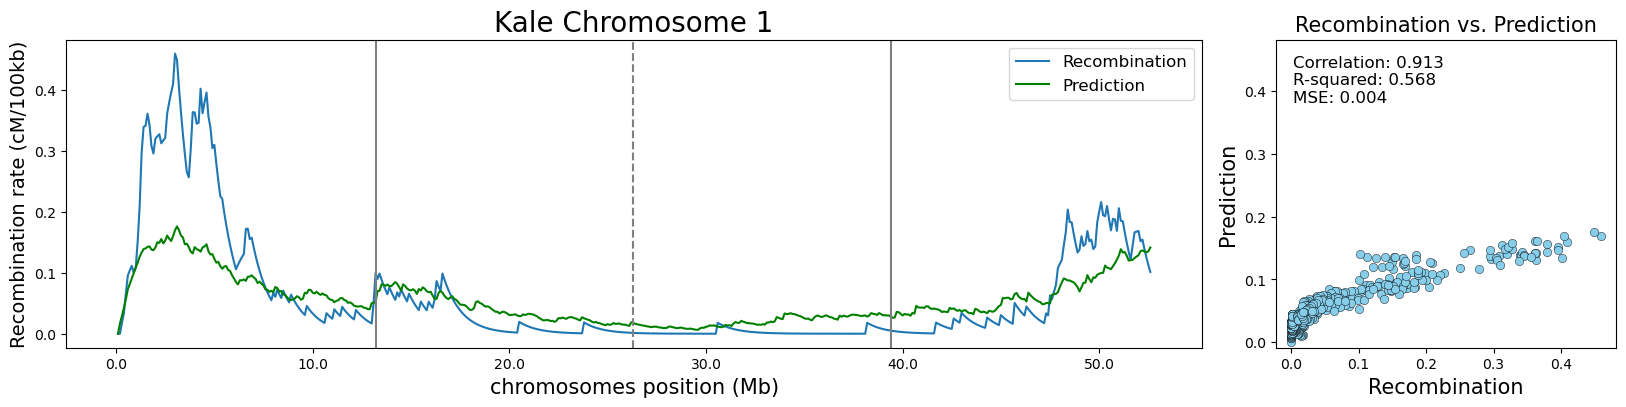

In [19]:
# Predictions for one chromosome, example: Chromosome 1
plot_chromosome_results(1)

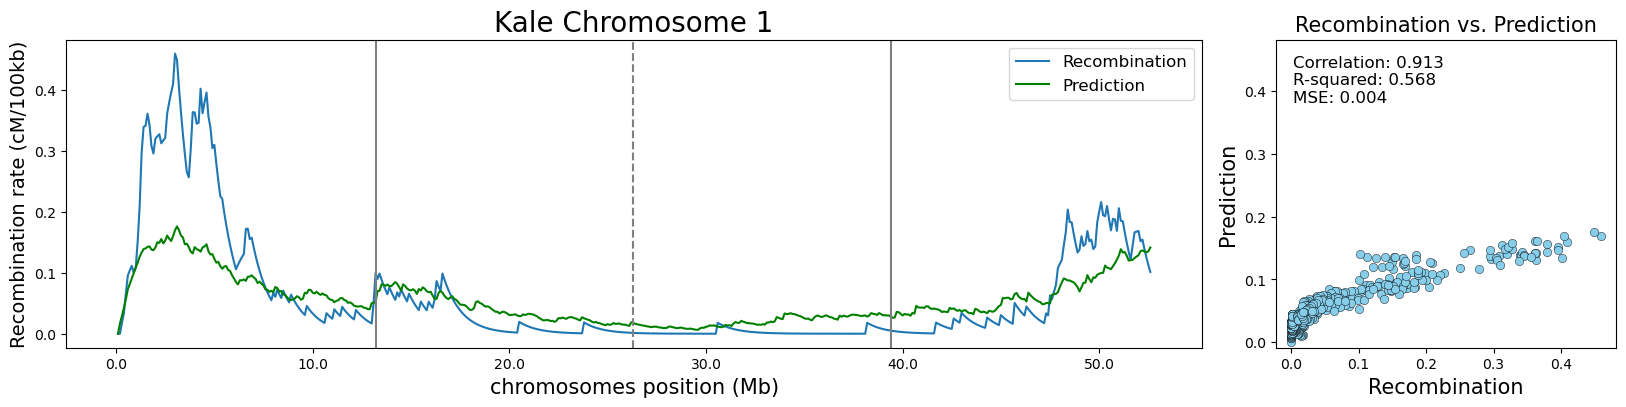

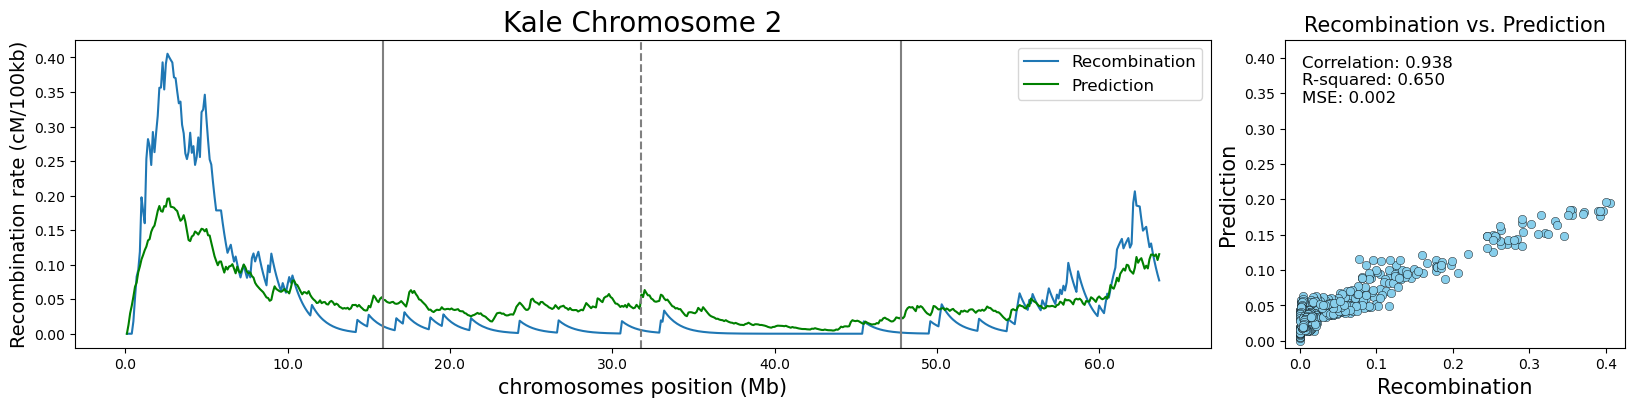

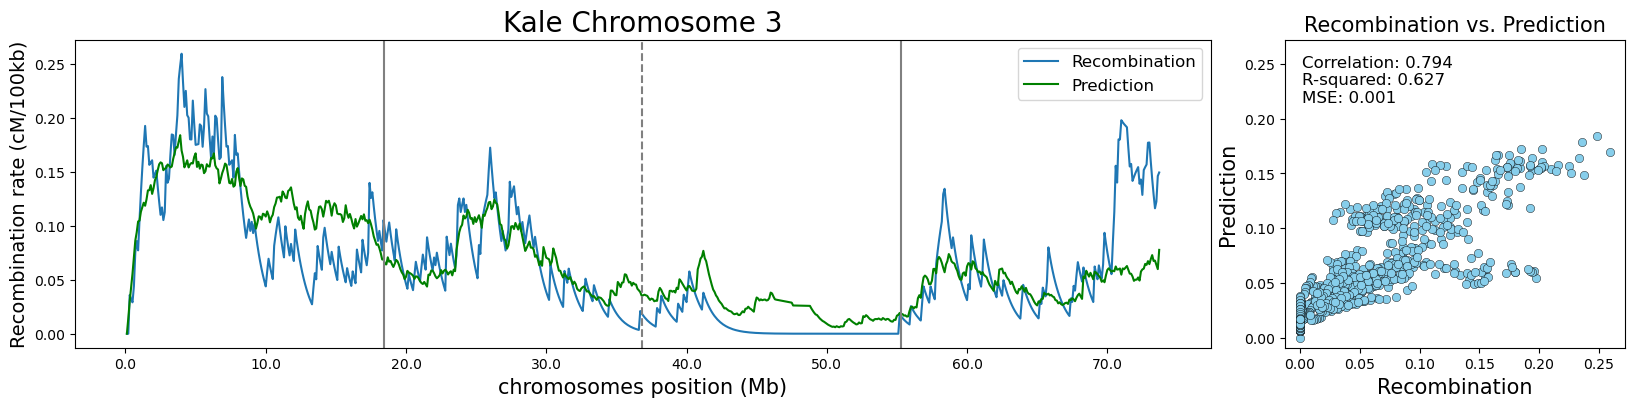

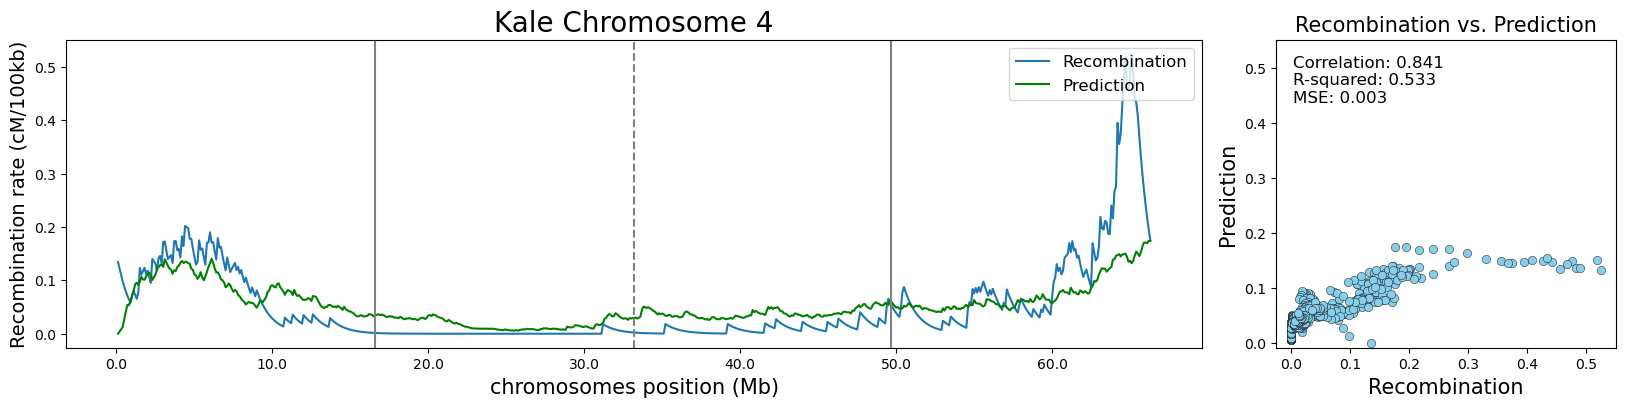

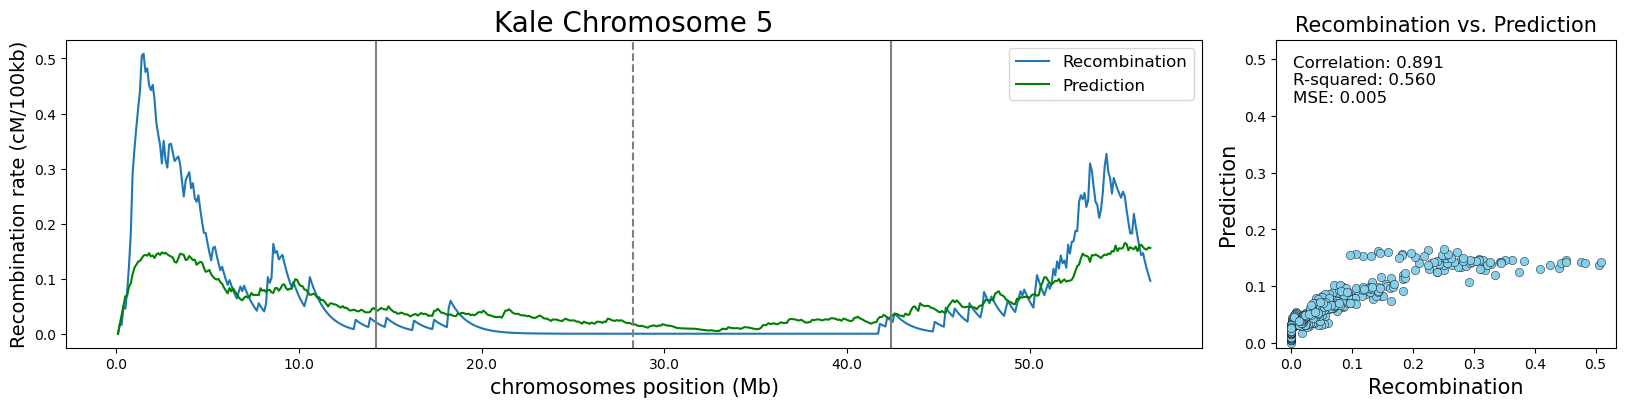

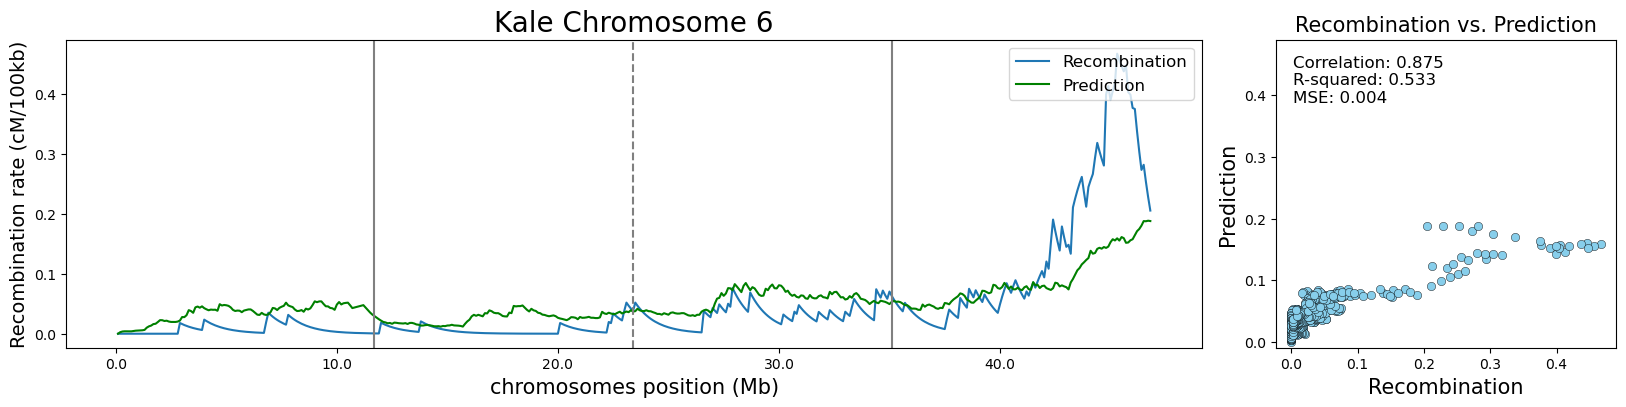

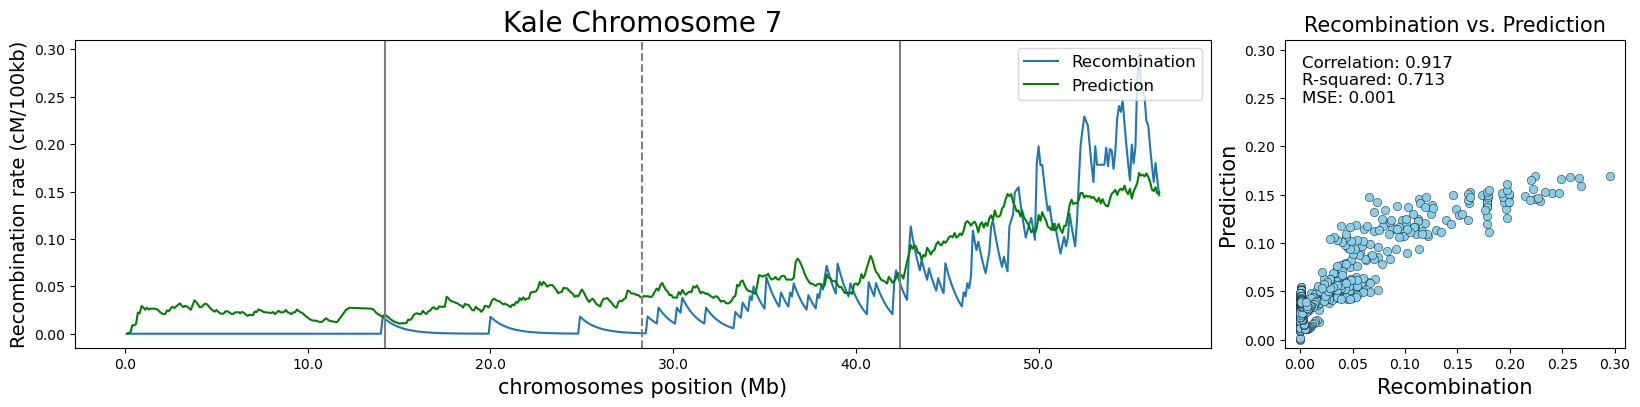

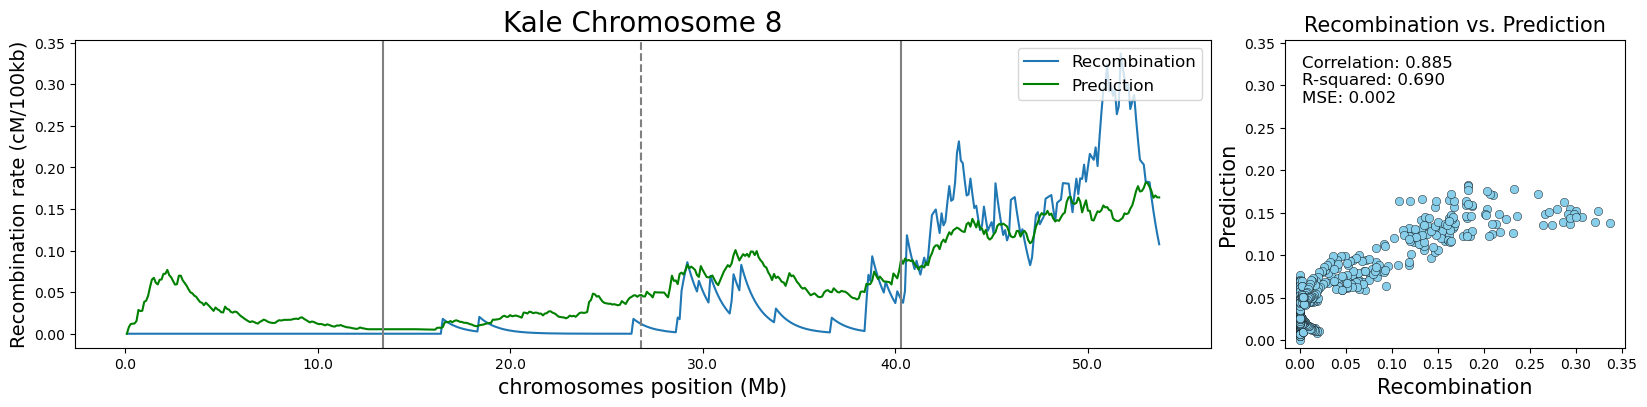

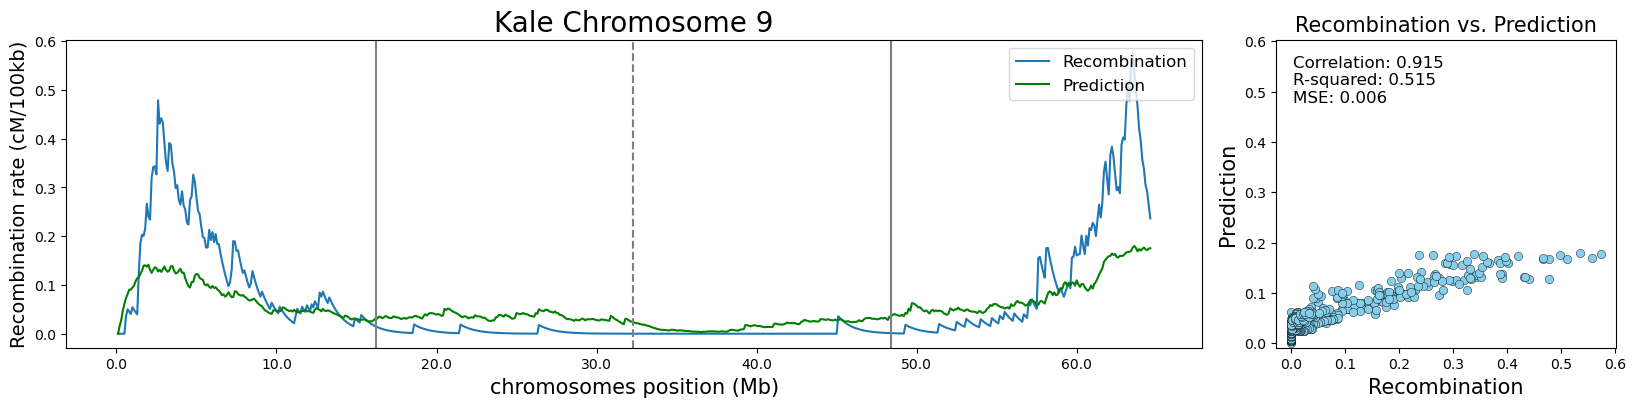

In [20]:
# Predictions and graphs for all chromosomes
for chr_number in range(1, 10):
    plot_chromosome_results(chr_number)
    plt.show()

# Data compilation

In [21]:
corr = pd.DataFrame({'corr':[corr_chr1, corr_chr2, corr_chr3, corr_chr4, corr_chr5, corr_chr6,corr_chr7,corr_chr8,corr_chr9,]})
r2 = pd.DataFrame({'R^2':[r2_chr1, r2_chr2, r2_chr3, r2_chr4, r2_chr5, r2_chr6, r2_chr7, r2_chr8, r2_chr9]})
mse = pd.DataFrame({'MSE':[mse_chr1, mse_chr2, mse_chr3, mse_chr4, mse_chr5, mse_chr6, mse_chr7, mse_chr8, mse_chr9]})
index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9',]})
k_table = pd.concat([index, corr, r2, mse], axis=1)
k_table

chr      corr       R^2       MSE
0  chr1  0.913196  0.567667  0.004051
1  chr2  0.938284  0.649983  0.002340
2  chr3  0.794171  0.626803  0.001177
3  chr4  0.840784  0.533445  0.003332
4  chr5  0.890671  0.559529  0.004641
5  chr6  0.875428  0.533309  0.003599
6  chr7  0.917097  0.713464  0.001065
7  chr8  0.885176  0.689922  0.001924
8  chr9  0.915203  0.514951  0.006045

Correlation between model predictions and recombination rates by quartiles

In [22]:
corr_q1 = pd.DataFrame({'Q1':[corr_q1_chr1,corr_q1_chr2,corr_q1_chr3,corr_q1_chr4,corr_q1_chr5,corr_q1_chr6,corr_q1_chr7,corr_q1_chr8,corr_q1_chr9]})
corr_q2 = pd.DataFrame({'Q2':[corr_q2_chr1,corr_q2_chr2,corr_q2_chr3,corr_q2_chr4,corr_q2_chr5,corr_q2_chr6,corr_q2_chr7,corr_q2_chr8,corr_q2_chr9]})
corr_q3 = pd.DataFrame({'Q3':[corr_q3_chr1,corr_q3_chr2,corr_q3_chr3,corr_q3_chr4,corr_q3_chr5,corr_q3_chr6,corr_q3_chr7,corr_q3_chr8,corr_q3_chr9]})
corr_q4 = pd.DataFrame({'Q4':[corr_q4_chr1,corr_q4_chr2,corr_q4_chr3,corr_q4_chr4,corr_q4_chr5,corr_q4_chr6,corr_q4_chr7,corr_q4_chr8,corr_q4_chr9]})

index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9']})
q_corr = pd.concat([index, corr_q1, corr_q2, corr_q3, corr_q4], axis=1)
q_corr_styled = q_corr.style.background_gradient(cmap="PRGn", vmin=-1, vmax=1)
q_corr_styled.set_table_styles([{'selector': 'th',
                                'props': [('text-align', 'center')]}])
q_corr_styled 

# WHITE GENOME

# Data exploration

In [23]:
df = w

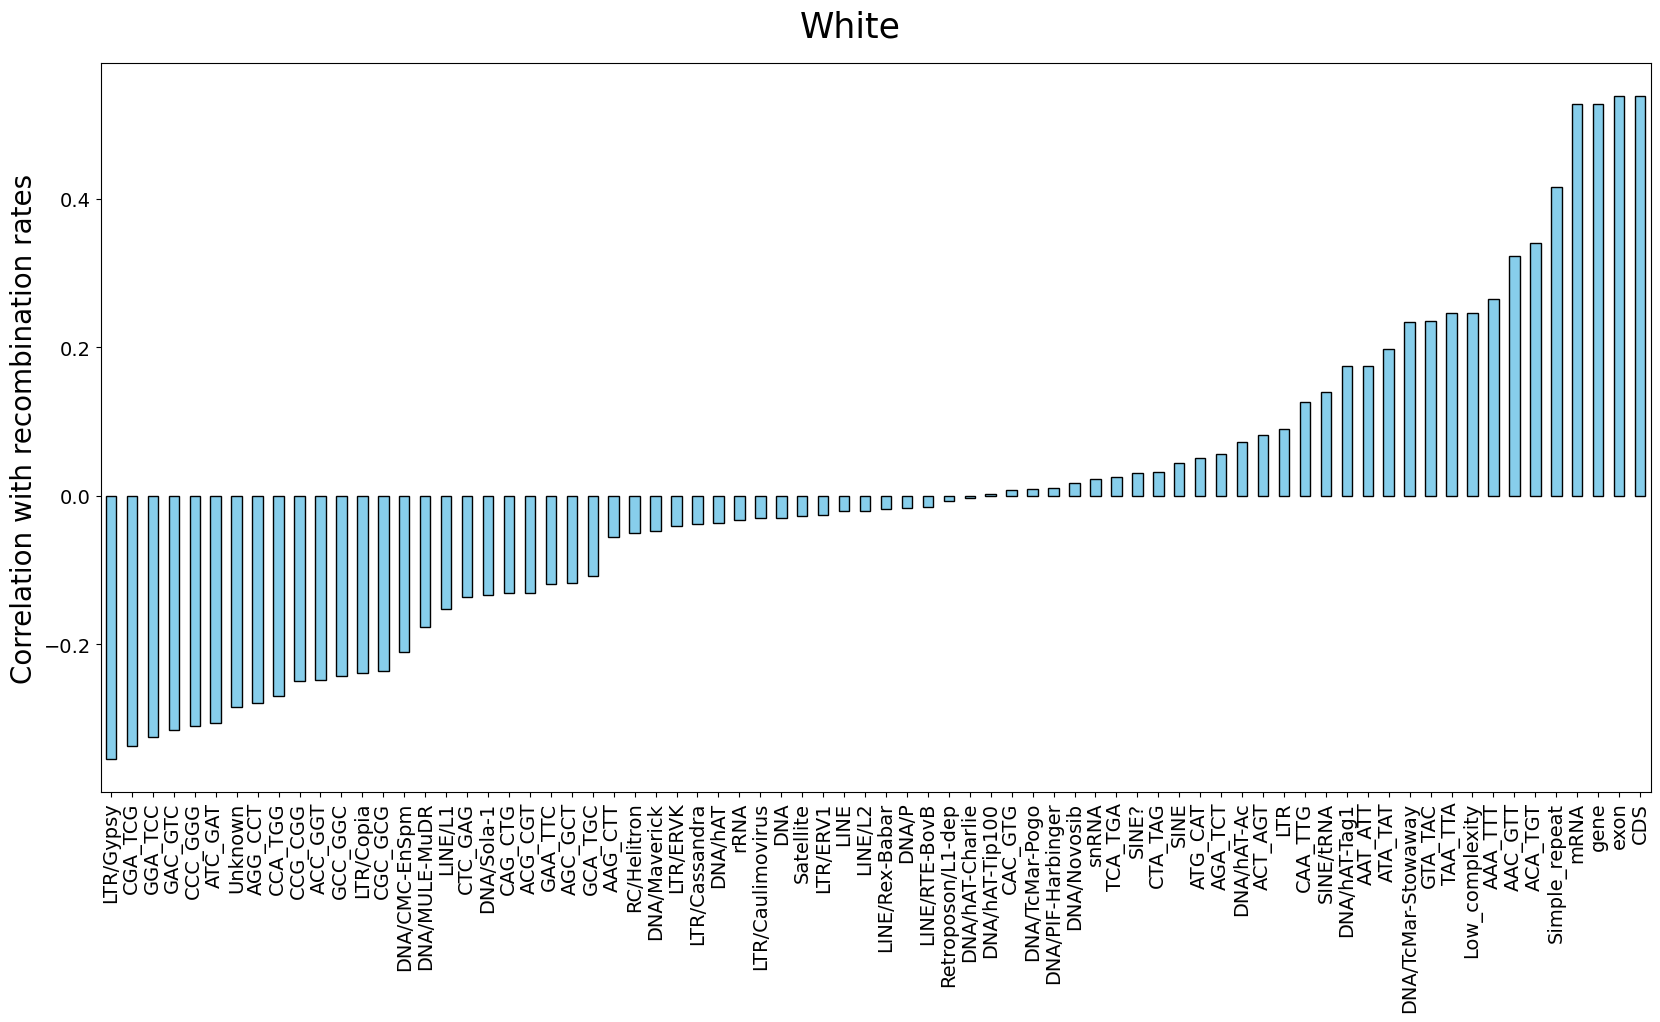

In [24]:
df_stats = df.drop(['cross', 'reference','chr','start','end'],  axis=1)
df_stats_corr = df_stats.corr()['srec'].sort_values(ascending = True)
df_corr = df_stats.corr()
df_corr = df_corr.iloc[1:, :]
fig = plt.figure(figsize=(20,9))
ax = fig.add_subplot(111)
df_corr['srec'].sort_values(ascending = True).plot(kind = 'bar', color='skyblue', edgecolor='black')
ax.set_ylabel('Correlation with recombination rates', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.suptitle('White', fontsize=25)
plt.subplots_adjust(top=0.92)

plt.show()

# Chromosome Split

In [25]:
chr1 = df[df['chr']== 'chr1']
chr2 = df[df['chr']== 'chr2']
chr3 = df[df['chr']== 'chr3']
chr4 = df[df['chr']== 'chr4']
chr5 = df[df['chr']== 'chr5']
chr6 = df[df['chr']== 'chr6']
chr7 = df[df['chr']== 'chr7']
chr8 = df[df['chr']== 'chr8']
chr9 = df[df['chr']== 'chr9']

In [26]:
achr1 = df[df['chr']!= 'chr1']
achr2 = df[df['chr']!= 'chr2']
achr3 = df[df['chr']!= 'chr3']
achr4 = df[df['chr']!= 'chr4']
achr5 = df[df['chr']!= 'chr5']
achr6 = df[df['chr']!= 'chr6']
achr7 = df[df['chr']!= 'chr7']
achr8 = df[df['chr']!= 'chr8']
achr9 = df[df['chr']!= 'chr9']

# Function to train models and make graphs

The model is trained with the information of all chromosomes except the information of the chromosome to be predicted.

In [27]:
def plot_chromosome_results(chr_number):
    # Replace  with 'chr{chr_number}' 
    chromosomes_data = globals()[f'achr{chr_number}']
    chr_data = globals()[f'chr{chr_number}']

    # TRAINING MODEL
    X_train = chromosomes_data.drop(['cross', 'reference','chr','start','end','srec'], axis=1)
    y_train = chromosomes_data[['srec']]
    
    model.fit(X_train, y_train)
    model_preds = model.predict(chr_data.drop(['cross', 'reference','chr','start','end','srec'], axis=1))
    
    #SMOOTHING
    model_spreds= np.zeros(len(model_preds))

    for i in  range(1, len(model_preds)): 
        model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9
        
    #CORRELATIONS BY QUARTILES
    c_q1 = int(len(chr_data)*0.25)
    c_q2 = int(len(chr_data)*0.50)
    c_q3 = int(len(chr_data)*0.75)
    
    rq1 = chr_data['srec'].iloc[0:c_q1]
    rq2 = chr_data['srec'].iloc[c_q1:c_q2]
    rq3 = chr_data['srec'].iloc[c_q2:c_q3]
    rq4 = chr_data['srec'].iloc[c_q3:int(len(chr_data))]

    pq1 = model_spreds[0:c_q1]
    pq2 = model_spreds[c_q1:c_q2]
    pq3 = model_spreds[c_q2:c_q3]
    pq4 = model_spreds[c_q3:int(len(chr_data))]

    corr_q1 = np.corrcoef(rq1, pq1)[0, 1]
    corr_q2 = np.corrcoef(rq2, pq2)[0, 1]
    corr_q3 = np.corrcoef(rq3, pq3)[0, 1]
    corr_q4 = np.corrcoef(rq4, pq4)[0, 1]
    
    globals()[f'corr_q1_chr{chr_number}'] = corr_q1
    globals()[f'corr_q2_chr{chr_number}'] = corr_q2
    globals()[f'corr_q3_chr{chr_number}'] = corr_q3
    globals()[f'corr_q4_chr{chr_number}'] = corr_q4
     
    # PLOTTING RESULTS
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4), gridspec_kw={'width_ratios': [10, 3]})

    # Line plot and correlation plot
    ax1.plot(chr_data.end, chr_data.srec, label='Recombination')
    ax1.plot(chr_data.end, model_spreds, label='Prediction', color='green')
    ax1.set_title(f'White Chromosome {chr_number}', fontsize=20)
    ax1.set_xlabel('chromosomes position (Mb)', fontsize=15)
    ax1.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
    ax1.legend(loc='upper right', fontsize=12)
    ticks = ax1.get_xticks() / 1000000
    ax1.set_xticklabels(ticks)
        
    chr_len = chr_data["end"].iloc[-1]
    q1 =round(chr_len * 0.25 / 100000) * 100000
    q2 =round(chr_len* 0.50 / 100000) * 100000
    q3 =round(chr_len * 0.75 / 100000) * 100000

    ax1.axvline(x=q1, color='gray', linestyle='-')
    ax1.axvline(x=q2, color='gray', linestyle='--')
    ax1.axvline(x=q3, color='gray', linestyle='-')

    # Scatter plot
    scatter = ax2.scatter(chr_data.srec, model_spreds, c='skyblue', edgecolors='black', linewidth= 0.3)
    ax2.set_title('Recombination vs. Prediction', fontsize=15)
    ax2.set_xlabel('Recombination', fontsize=15)
    ax2.set_ylabel('Prediction', fontsize=15)

    # Calculate correlation coefficient, coefficient of determination, and Mean Squared Error
    corr_chr = np.corrcoef(chr_data.srec, model_spreds)[0, 1]
    r2_chr = r2_score(chr_data.srec, model_spreds)
    mse_chr = mean_squared_error(chr_data.srec, model_spreds)

    # Calculate the aspect ratio based on the plot heights
    h1 = ax1.get_ylim()
    h2 = ax2.get_ylim()
    aspect_ratio = max(h1[1] - h1[0], h2[1] - h2[0]) / (max(h1[1], h2[1]) - min(h1[0], h2[0]))

    # Set the aspect ratio for the scatter plot only if it doesn't distort the square shape
    if aspect_ratio < 1:
        ax2.set_aspect('equal')

    # Display correlation coefficient, coefficient of determination, and Mean Squared Error as plain text
    globals()[f'corr_chr{chr_number}'] = corr_chr
    globals()[f'r2_chr{chr_number}'] = r2_chr
    globals()[f'mse_chr{chr_number}'] = mse_chr

    textstr = f'Correlation: {corr_chr:.3f}\nR-squared: {r2_chr:.3f}\nMSE: {mse_chr:.3f}'
    ax2.text(0.05, 0.95, textstr, transform=ax2.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

    # Adjustments to align the heights of the two plots
    max_height = max(h1[1], h2[1])
    ax1.set_ylim([h1[0], max_height])
    ax2.set_ylim([h2[0], max_height])

    # Reduce the separation between the plots
    plt.subplots_adjust(wspace=0.1)
    plt.show()

# Model Predictions

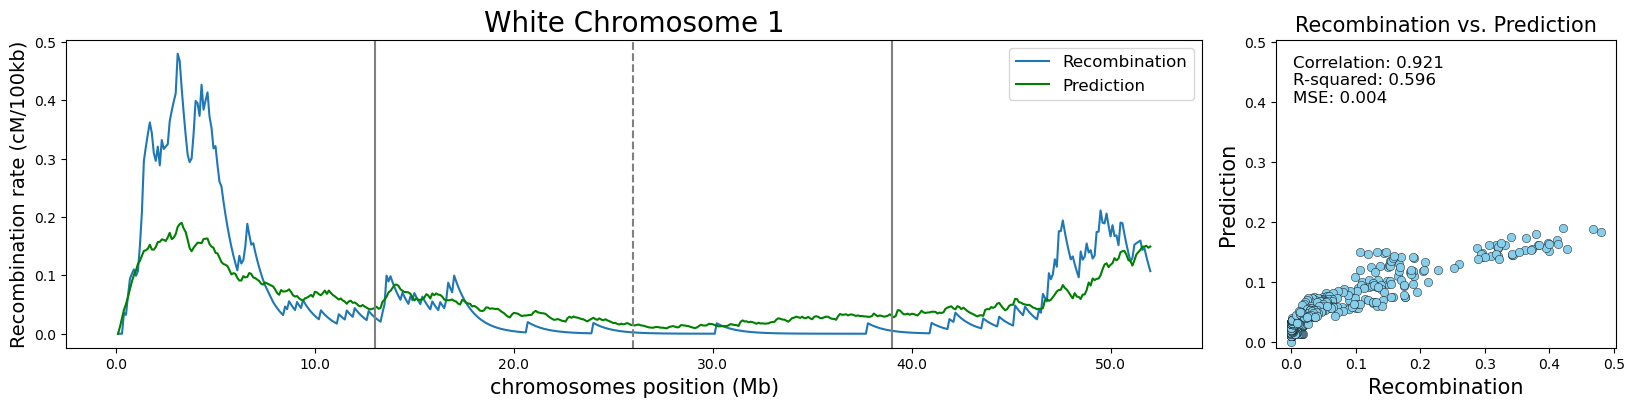

In [28]:
# For one chromosome, example Chromosome 1
plot_chromosome_results(1)

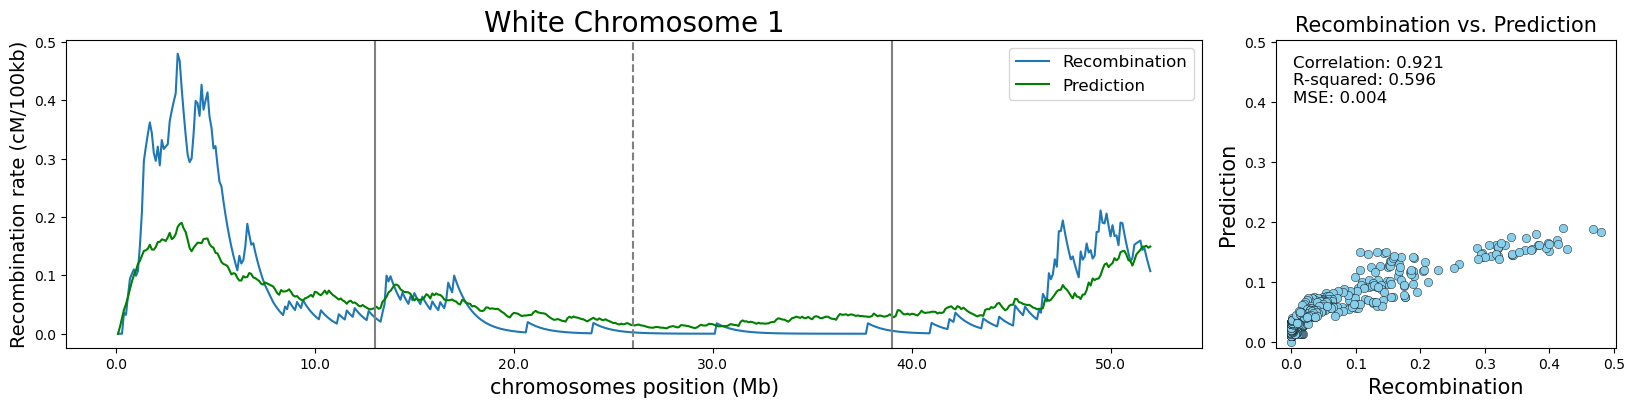

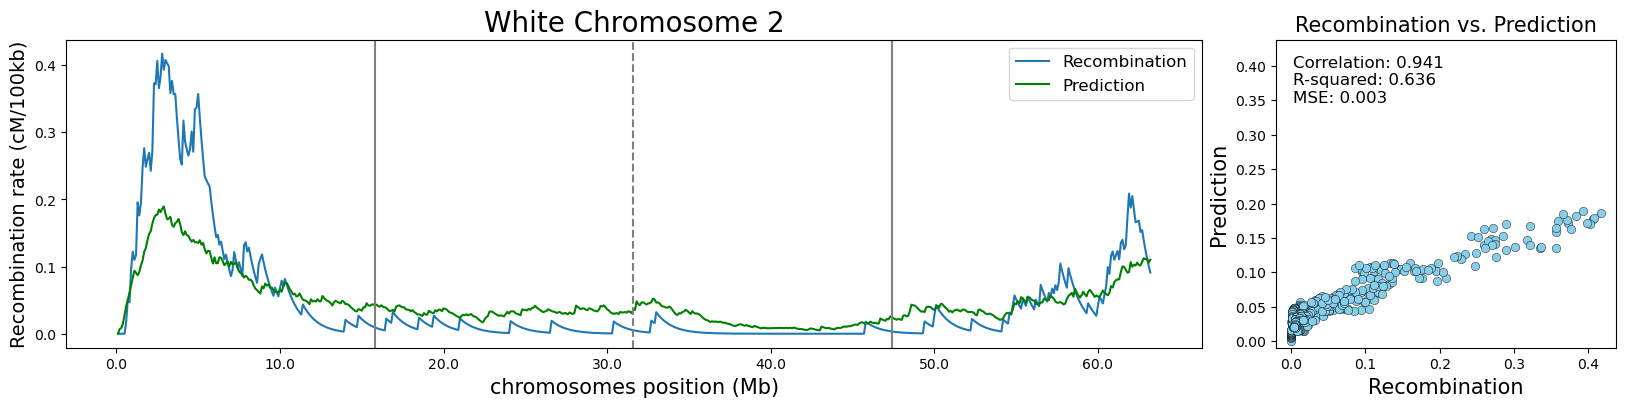

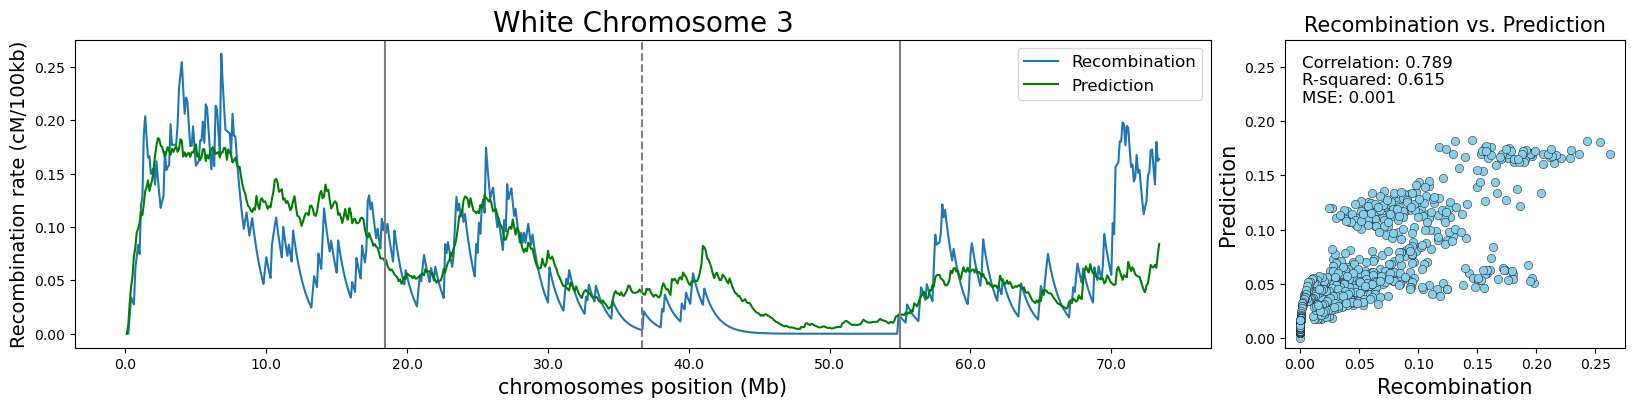

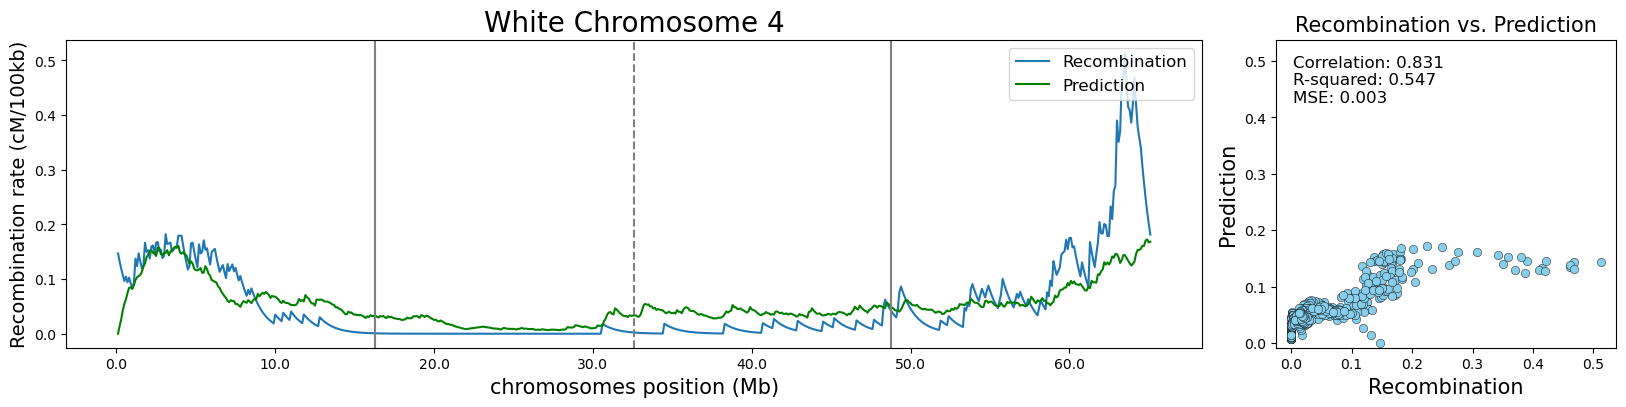

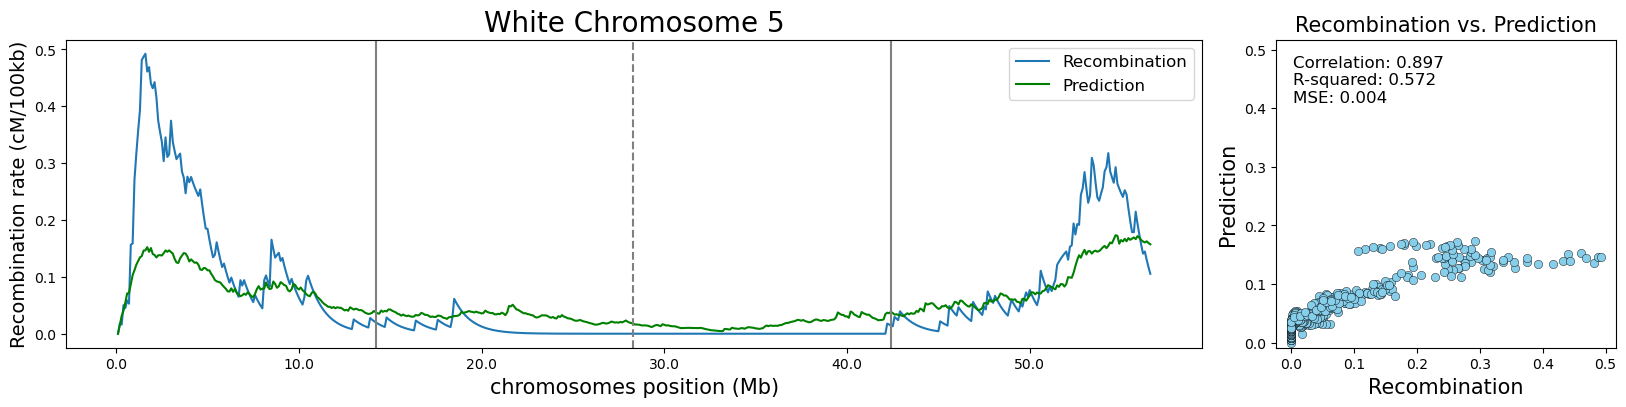

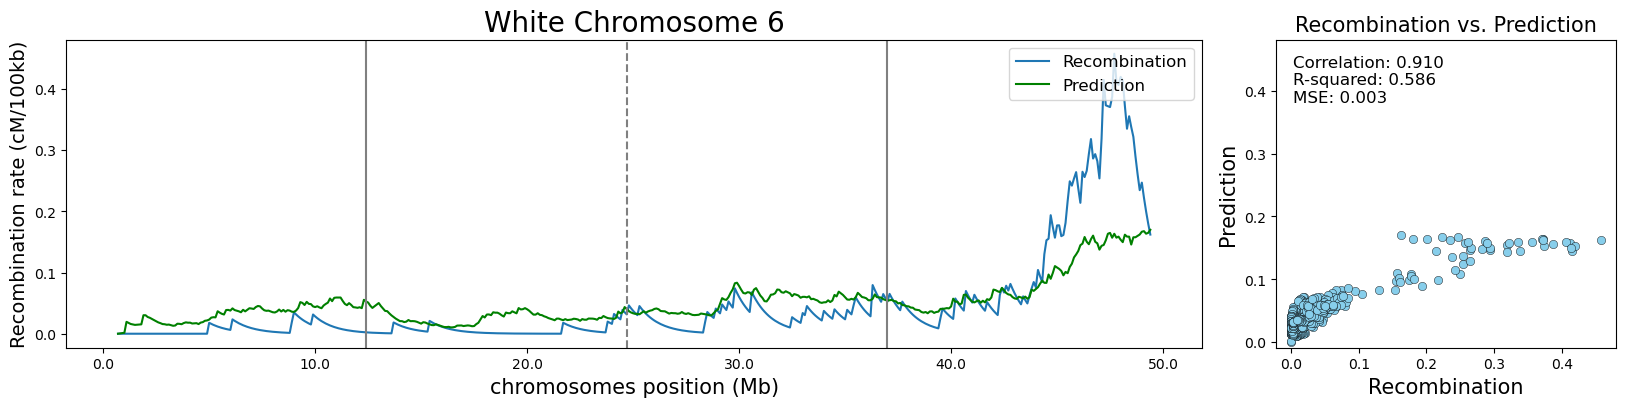

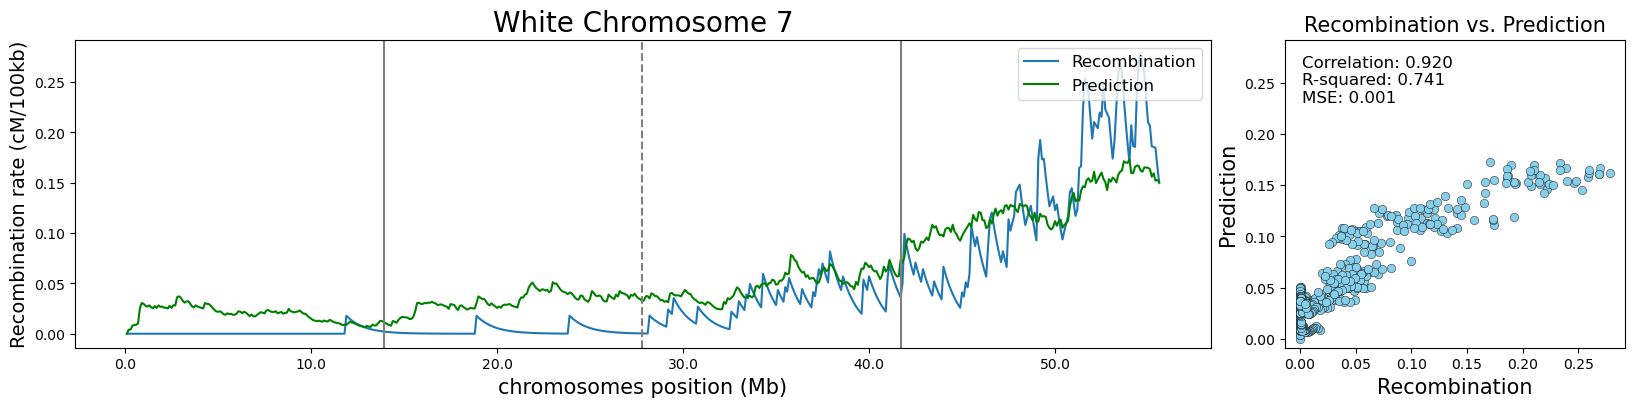

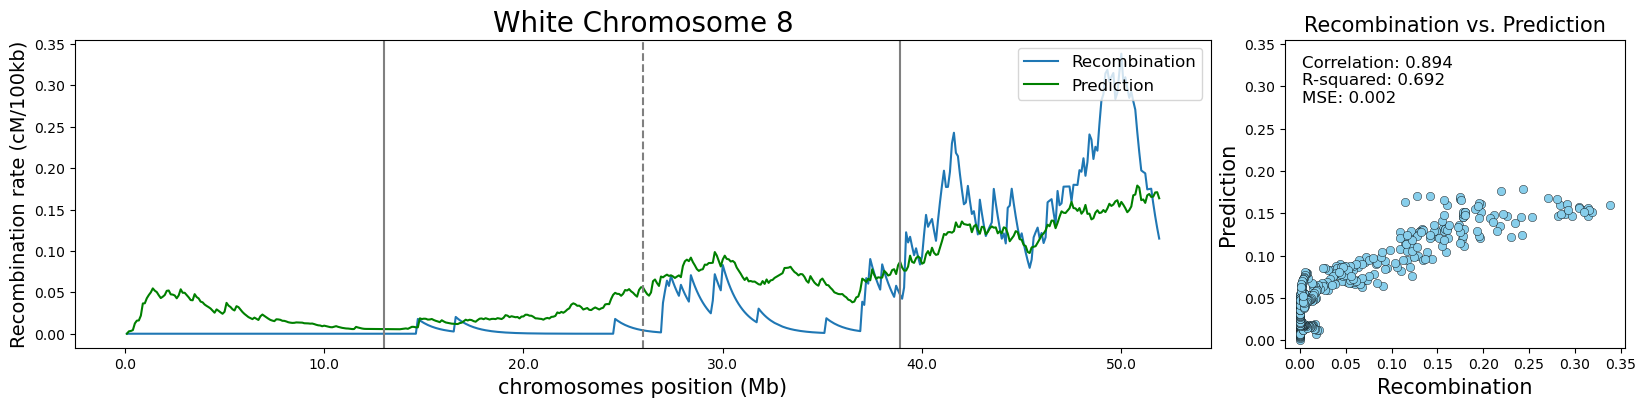

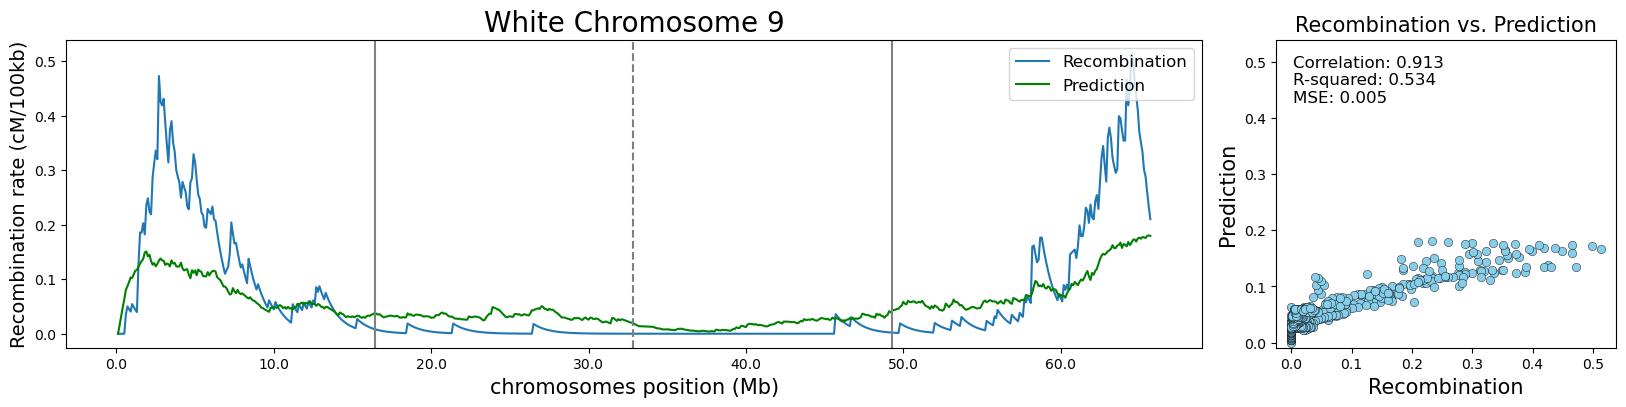

In [29]:
# Predictions and graphs for all chromosomes
for chr_number in range(1, 10):
    plot_chromosome_results(chr_number)
    plt.show()

# Data compilation

In [30]:
corr = pd.DataFrame({'corr':[corr_chr1, corr_chr2, corr_chr3, corr_chr4, corr_chr5, corr_chr6,corr_chr7,corr_chr8,corr_chr9,]})
r2 = pd.DataFrame({'R^2':[r2_chr1, r2_chr2, r2_chr3, r2_chr4, r2_chr5, r2_chr6, r2_chr7, r2_chr8, r2_chr9]})
mse = pd.DataFrame({'MSE':[mse_chr1, mse_chr2, mse_chr3, mse_chr4, mse_chr5, mse_chr6, mse_chr7, mse_chr8, mse_chr9]})
index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9',]})
w_table = pd.concat([index, corr, r2, mse], axis=1)
w_table

chr      corr       R^2       MSE
0  chr1  0.921298  0.595501  0.003936
1  chr2  0.940647  0.635938  0.002536
2  chr3  0.788980  0.615119  0.001258
3  chr4  0.830823  0.547470  0.003070
4  chr5  0.896754  0.572097  0.004466
5  chr6  0.909586  0.586310  0.002977
6  chr7  0.919997  0.740525  0.001043
7  chr8  0.893676  0.691553  0.001983
8  chr9  0.913318  0.534013  0.005473

Correlation between model predictions and recombination rates by quartiles

In [31]:
corr_q1 = pd.DataFrame({'Q1':[corr_q1_chr1,corr_q1_chr2,corr_q1_chr3,corr_q1_chr4,corr_q1_chr5,corr_q1_chr6,corr_q1_chr7,corr_q1_chr8,corr_q1_chr9]})
corr_q2 = pd.DataFrame({'Q2':[corr_q2_chr1,corr_q2_chr2,corr_q2_chr3,corr_q2_chr4,corr_q2_chr5,corr_q2_chr6,corr_q2_chr7,corr_q2_chr8,corr_q2_chr9]})
corr_q3 = pd.DataFrame({'Q3':[corr_q3_chr1,corr_q3_chr2,corr_q3_chr3,corr_q3_chr4,corr_q3_chr5,corr_q3_chr6,corr_q3_chr7,corr_q3_chr8,corr_q3_chr9]})
corr_q4 = pd.DataFrame({'Q4':[corr_q4_chr1,corr_q4_chr2,corr_q4_chr3,corr_q4_chr4,corr_q4_chr5,corr_q4_chr6,corr_q4_chr7,corr_q4_chr8,corr_q4_chr9]})

index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9']})
q_corr = pd.concat([index, corr_q1, corr_q2, corr_q3, corr_q4], axis=1)
q_corr_styled = q_corr.style.background_gradient(cmap="PRGn", vmin=-1, vmax=1)
q_corr_styled.set_table_styles([{'selector': 'th',
                                'props': [('text-align', 'center')]}])
q_corr_styled 

# Prediction performance of models trained with Kale data and White data.

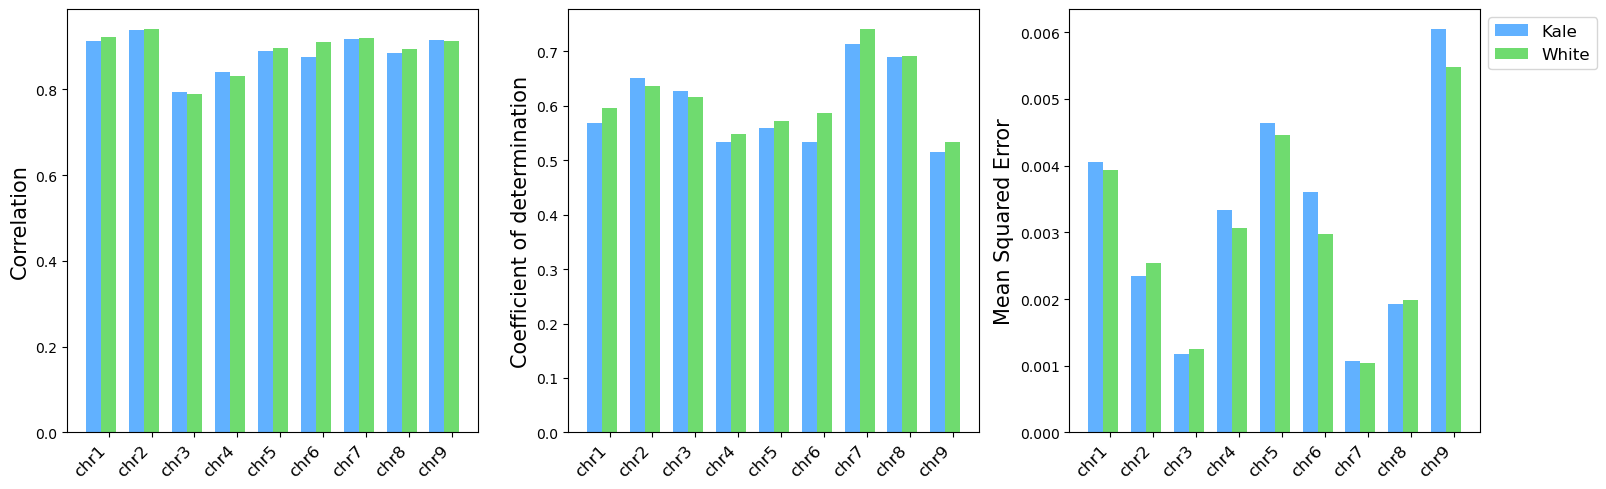

In [32]:
# Adjusting bar width
bar_width = 0.35

# Creating data positions
bar_positions_k = np.arange(len(k_table['chr']))
bar_positions_w = bar_positions_k + bar_width

# Creating subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# First chart
axs[0].bar(bar_positions_k, k_table['corr'], color='dodgerblue', width=bar_width, label='Kale', alpha=0.7)
axs[0].bar(bar_positions_w, w_table['corr'], color='limegreen', width=bar_width, label='White', alpha=0.7)

axs[0].set_ylabel('Correlation', fontsize=15)

# Second chart
axs[1].bar(bar_positions_k, k_table['R^2'], color='dodgerblue', width=bar_width, label='Kale', alpha=0.7)
axs[1].bar(bar_positions_w, w_table['R^2'], color='limegreen', width=bar_width, label='White', alpha=0.7)

axs[1].set_ylabel('Coefficient of determination', fontsize=15)

# Third chart
axs[2].bar(bar_positions_k, k_table['MSE'], color='dodgerblue', width=bar_width, label='Kale', alpha=0.7)
axs[2].bar(bar_positions_w, w_table['MSE'], color='limegreen', width=bar_width, label='White', alpha=0.7)

axs[2].set_ylabel('Mean Squared Error', fontsize=15)

# Get chromosome labels from the 'chr' column
chr_labels = k_table['chr']

# Set x-axis labels for all three subplots
for ax in axs:
    ax.set_xticks(bar_positions_w)
    ax.set_xticklabels(chr_labels)

# Rotate labels for better readability
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Adjusting layout
plt.tight_layout()

# Place legend outside the subplots and above the last subplot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Show the figure
plt.show()

# Model trained with all Kale chromosomes to predict recombination on each White chromosome

In [33]:
# TRAINING MODEL with Kale data
X_train = k.drop(['cross', 'reference','chr','start','end','srec'], axis=1)
y_train = k[['srec']]

model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=1)

In [34]:
# Objects with White data per chromosome
chr1 = w[w['chr']== 'chr1']
chr2 = w[w['chr']== 'chr2']
chr3 = w[w['chr']== 'chr3']
chr4 = w[w['chr']== 'chr4']
chr5 = w[w['chr']== 'chr5']
chr6 = w[w['chr']== 'chr6']
chr7 = w[w['chr']== 'chr7']
chr8 = w[w['chr']== 'chr8']
chr9 = w[w['chr']== 'chr9']

In [35]:
def plot_chromosome_results(chr_number):
    # Replace  with 'chr{chr_number}' 
    chromosomes_data = globals()[f'achr{chr_number}']
    chr_data = globals()[f'chr{chr_number}']

    # MODEL PREDICTIONS
    model_preds = model.predict(chr_data.drop(['cross', 'reference','chr','start','end','srec'], axis=1))
    
    #SMOOTHING
    model_spreds= np.zeros(len(model_preds))

    for i in  range(1, len(model_preds)): 
        model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9
        
    #CORRELATIONS BY QUARTILES
    c_q1 = int(len(chr_data)*0.25)
    c_q2 = int(len(chr_data)*0.50)
    c_q3 = int(len(chr_data)*0.75)
    
    rq1 = chr_data['srec'].iloc[0:c_q1]
    rq2 = chr_data['srec'].iloc[c_q1:c_q2]
    rq3 = chr_data['srec'].iloc[c_q2:c_q3]
    rq4 = chr_data['srec'].iloc[c_q3:int(len(chr_data))]

    pq1 = model_spreds[0:c_q1]
    pq2 = model_spreds[c_q1:c_q2]
    pq3 = model_spreds[c_q2:c_q3]
    pq4 = model_spreds[c_q3:int(len(chr_data))]

    corr_q1 = np.corrcoef(rq1, pq1)[0, 1]
    corr_q2 = np.corrcoef(rq2, pq2)[0, 1]
    corr_q3 = np.corrcoef(rq3, pq3)[0, 1]
    corr_q4 = np.corrcoef(rq4, pq4)[0, 1]
    
    globals()[f'corr_q1_chr{chr_number}'] = corr_q1
    globals()[f'corr_q2_chr{chr_number}'] = corr_q2
    globals()[f'corr_q3_chr{chr_number}'] = corr_q3
    globals()[f'corr_q4_chr{chr_number}'] = corr_q4
     
    # PLOTTING RESULTS
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4), gridspec_kw={'width_ratios': [10, 3]})

    # Line plot and correlation plot
    ax1.plot(chr_data.end, chr_data.srec, label='Recombination')
    ax1.plot(chr_data.end, model_spreds, label='Prediction', color='green')
    ax1.set_title(f'White Chromosome {chr_number}', fontsize=20)
    ax1.set_xlabel('chromosomes position (Mb)', fontsize=15)
    ax1.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
    ax1.legend(loc='upper right', fontsize=12)
    ticks = ax1.get_xticks() / 1000000
    ax1.set_xticklabels(ticks)
        
    chr_len = chr_data["end"].iloc[-1]
    q1 =round(chr_len * 0.25 / 100000) * 100000
    q2 =round(chr_len* 0.50 / 100000) * 100000
    q3 =round(chr_len * 0.75 / 100000) * 100000

    ax1.axvline(x=q1, color='gray', linestyle='-')
    ax1.axvline(x=q2, color='gray', linestyle='--')
    ax1.axvline(x=q3, color='gray', linestyle='-')

    # Scatter plot
    scatter = ax2.scatter(chr_data.srec, model_spreds, c='skyblue', edgecolors='black', linewidth= 0.3)
    ax2.set_title('Recombination vs. Prediction', fontsize=15)
    ax2.set_xlabel('Recombination', fontsize=15)
    ax2.set_ylabel('Prediction', fontsize=15)

    # Calculate correlation coefficient, coefficient of determination, and Mean Squared Error
    corr_chr = np.corrcoef(chr_data.srec, model_spreds)[0, 1]
    r2_chr = r2_score(chr_data.srec, model_spreds)
    mse_chr = mean_squared_error(chr_data.srec, model_spreds)

    # Calculate the aspect ratio based on the plot heights
    h1 = ax1.get_ylim()
    h2 = ax2.get_ylim()
    aspect_ratio = max(h1[1] - h1[0], h2[1] - h2[0]) / (max(h1[1], h2[1]) - min(h1[0], h2[0]))

    # Set the aspect ratio for the scatter plot only if it doesn't distort the square shape
    if aspect_ratio < 1:
        ax2.set_aspect('equal')

    # Display correlation coefficient, coefficient of determination, and Mean Squared Error as plain text
    globals()[f'corr_chr{chr_number}'] = corr_chr
    globals()[f'r2_chr{chr_number}'] = r2_chr
    globals()[f'mse_chr{chr_number}'] = mse_chr

    textstr = f'Correlation: {corr_chr:.3f}\nR-squared: {r2_chr:.3f}\nMSE: {mse_chr:.3f}'
    ax2.text(0.05, 0.95, textstr, transform=ax2.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

    # Adjustments to align the heights of the two plots
    max_height = max(h1[1], h2[1])
    ax1.set_ylim([h1[0], max_height])
    ax2.set_ylim([h2[0], max_height])

    # Reduce the separation between the plots
    plt.subplots_adjust(wspace=0.1)
    plt.show()

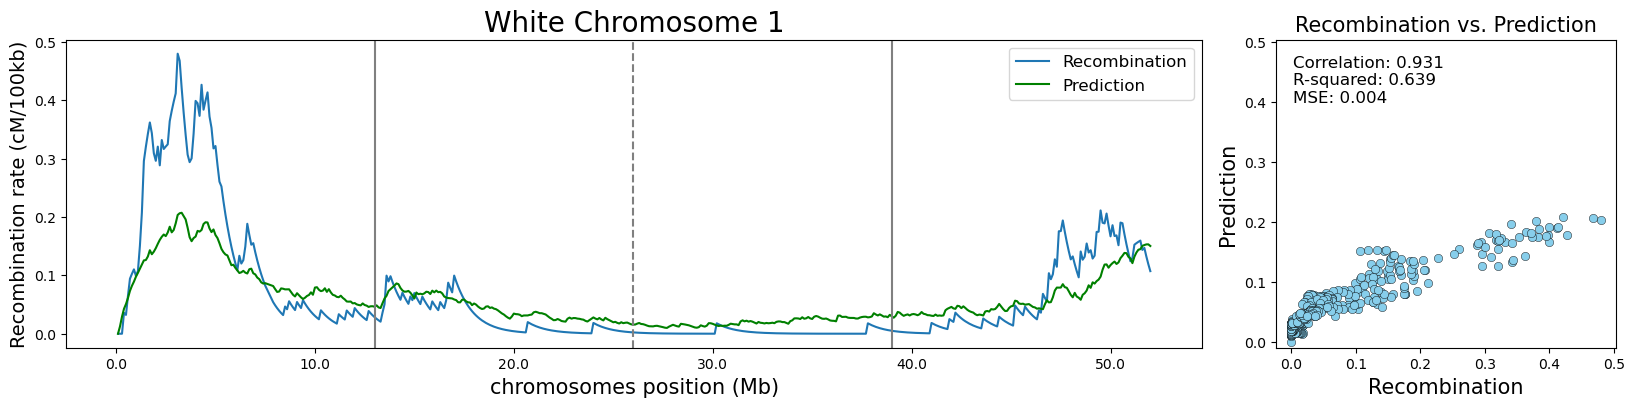

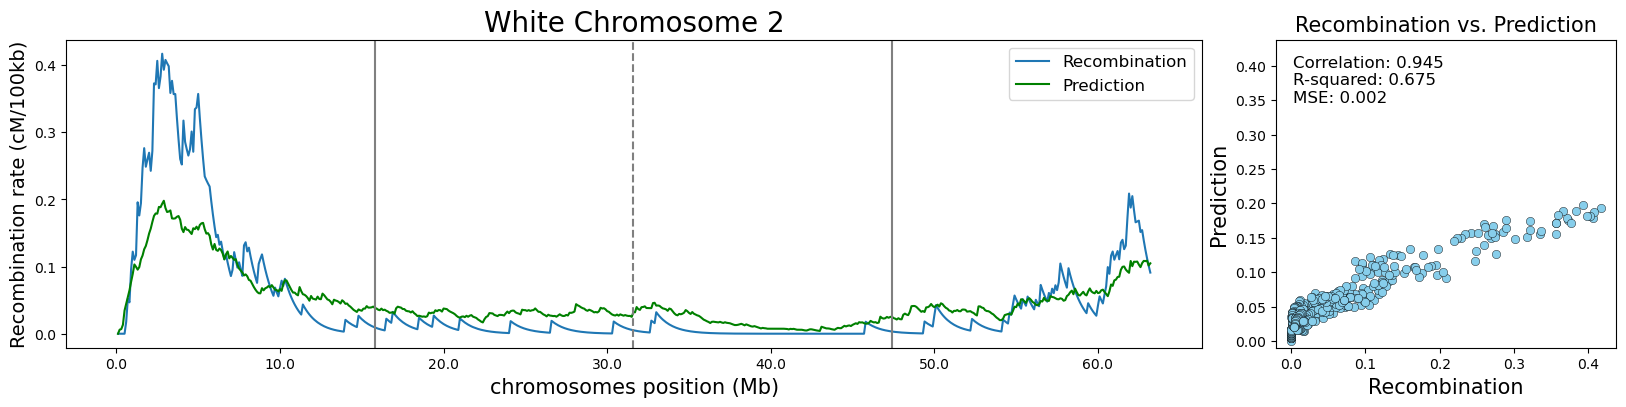

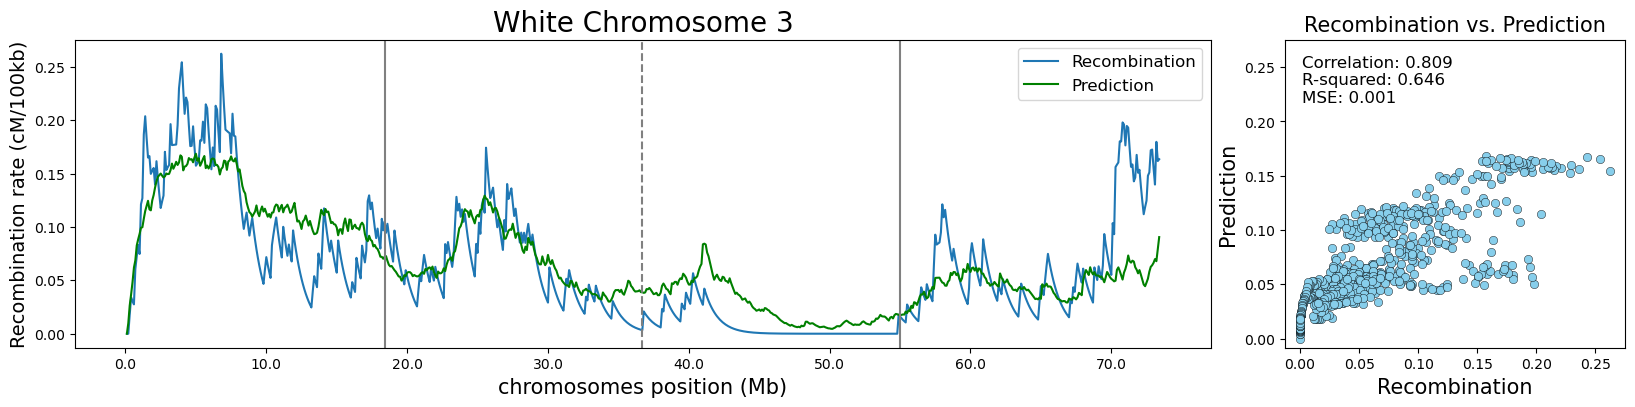

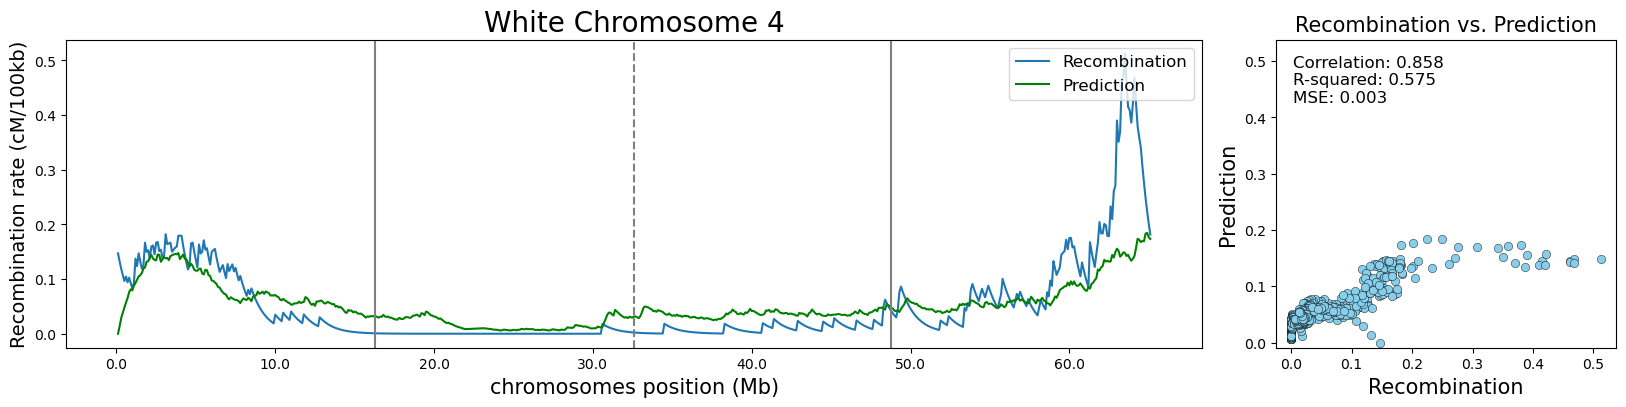

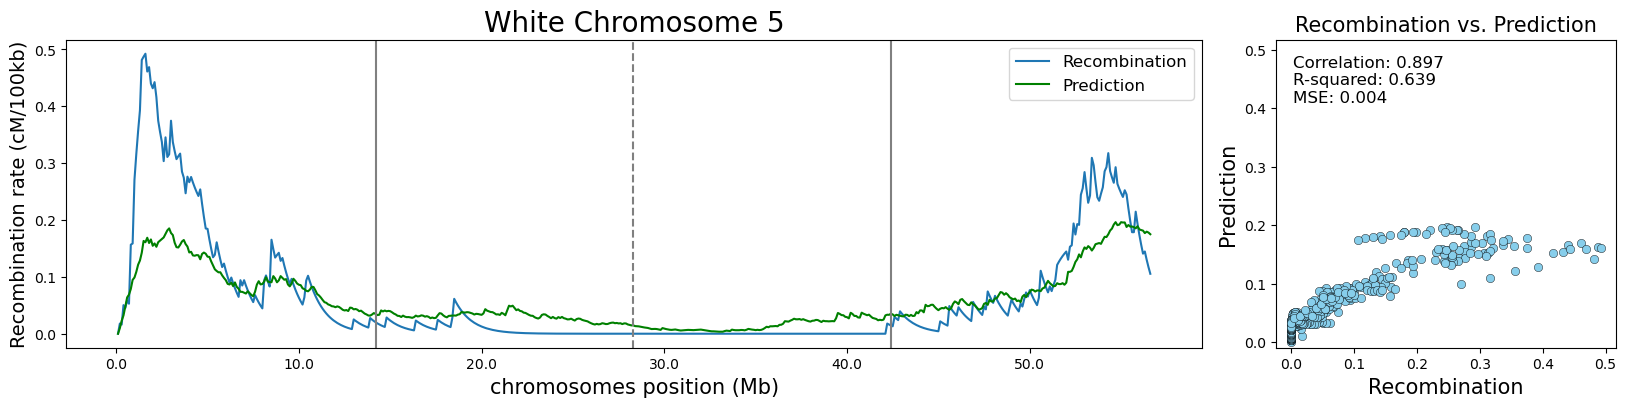

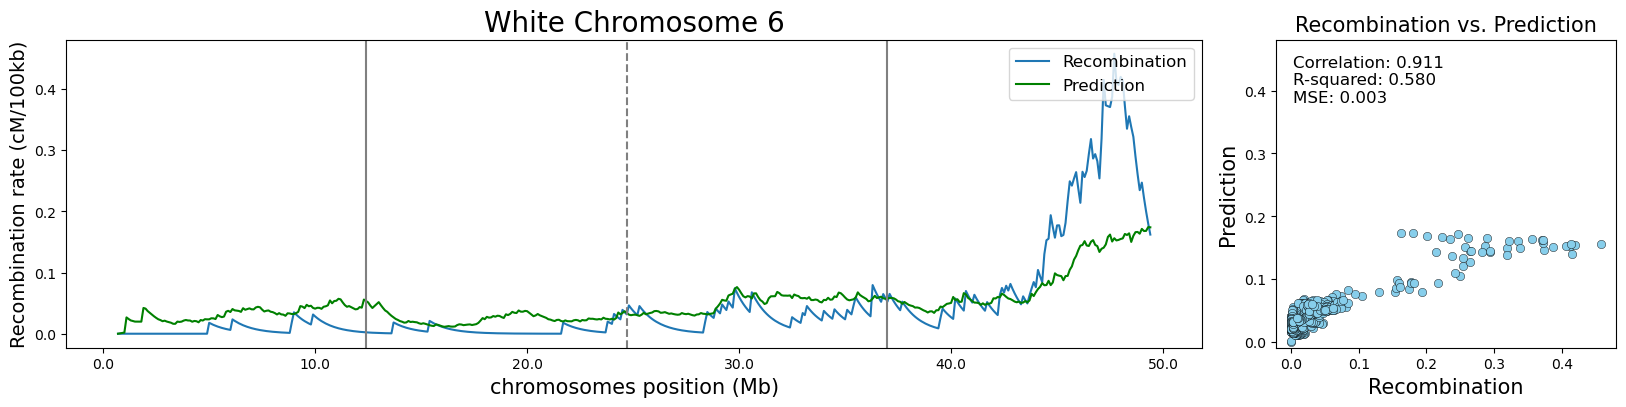

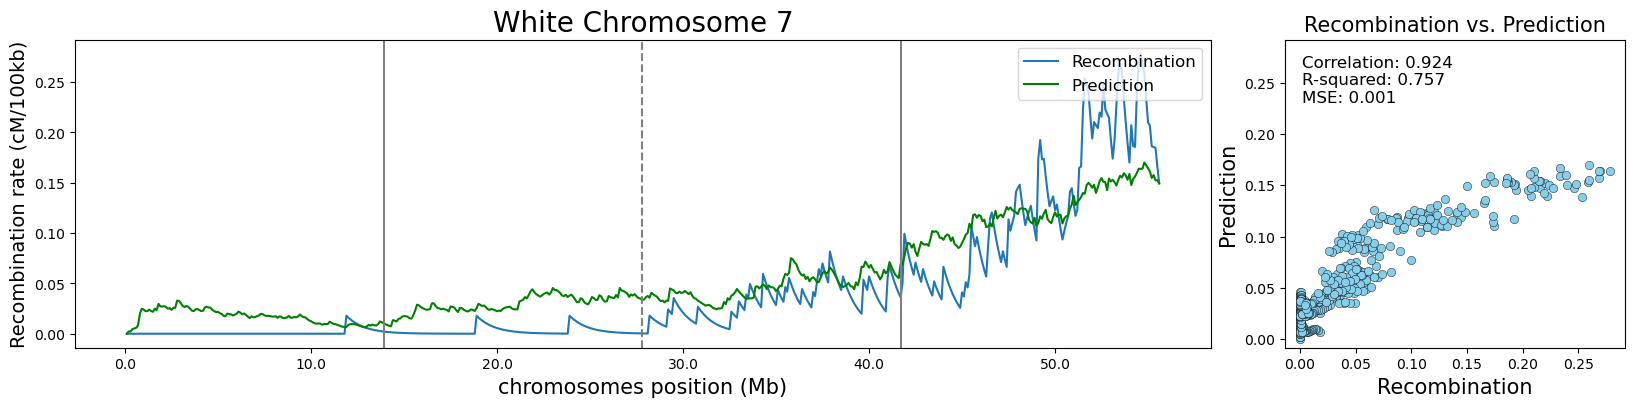

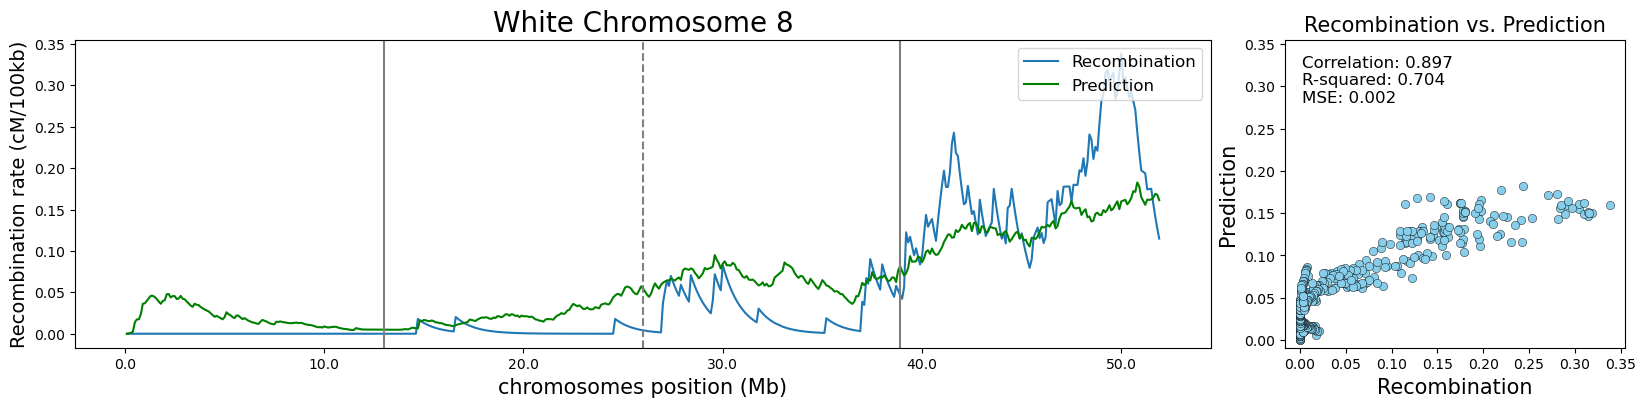

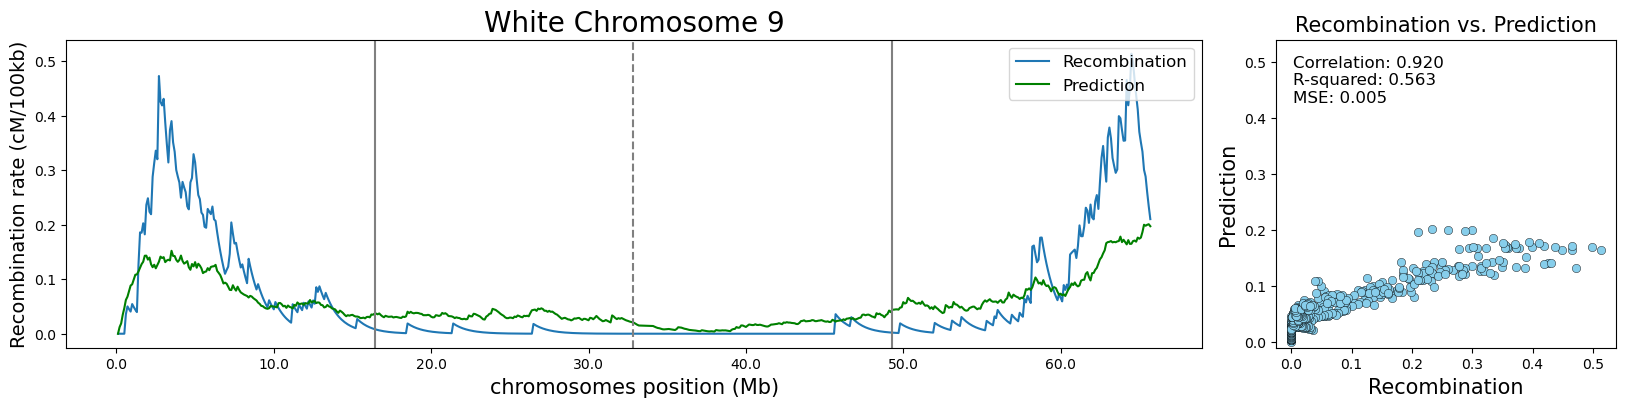

In [36]:
# Predictions and graphs for all chromosomes
for chr_number in range(1, 10):
    plot_chromosome_results(chr_number)
    plt.show()

# Data compilation

In [37]:
corr = pd.DataFrame({'corr':[corr_chr1, corr_chr2, corr_chr3, corr_chr4, corr_chr5, corr_chr6,corr_chr7,corr_chr8,corr_chr9,]})
r2 = pd.DataFrame({'R^2':[r2_chr1, r2_chr2, r2_chr3, r2_chr4, r2_chr5, r2_chr6, r2_chr7, r2_chr8, r2_chr9]})
mse = pd.DataFrame({'MSE':[mse_chr1, mse_chr2, mse_chr3, mse_chr4, mse_chr5, mse_chr6, mse_chr7, mse_chr8, mse_chr9]})
index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9',]})
tk_pw_table = pd.concat([index, corr, r2, mse], axis=1)
tk_pw_table

chr      corr       R^2       MSE
0  chr1  0.931438  0.638774  0.003515
1  chr2  0.944712  0.675411  0.002261
2  chr3  0.808626  0.646149  0.001157
3  chr4  0.857892  0.575257  0.002882
4  chr5  0.896945  0.638509  0.003772
5  chr6  0.911425  0.579998  0.003023
6  chr7  0.923773  0.757198  0.000976
7  chr8  0.896768  0.704277  0.001901
8  chr9  0.920038  0.562587  0.005138

Correlation between model predictions and recombination rates by quartiles

In [38]:
corr_q1 = pd.DataFrame({'Q1':[corr_q1_chr1,corr_q1_chr2,corr_q1_chr3,corr_q1_chr4,corr_q1_chr5,corr_q1_chr6,corr_q1_chr7,corr_q1_chr8,corr_q1_chr9]})
corr_q2 = pd.DataFrame({'Q2':[corr_q2_chr1,corr_q2_chr2,corr_q2_chr3,corr_q2_chr4,corr_q2_chr5,corr_q2_chr6,corr_q2_chr7,corr_q2_chr8,corr_q2_chr9]})
corr_q3 = pd.DataFrame({'Q3':[corr_q3_chr1,corr_q3_chr2,corr_q3_chr3,corr_q3_chr4,corr_q3_chr5,corr_q3_chr6,corr_q3_chr7,corr_q3_chr8,corr_q3_chr9]})
corr_q4 = pd.DataFrame({'Q4':[corr_q4_chr1,corr_q4_chr2,corr_q4_chr3,corr_q4_chr4,corr_q4_chr5,corr_q4_chr6,corr_q4_chr7,corr_q4_chr8,corr_q4_chr9]})

index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9']})
q_corr = pd.concat([index, corr_q1, corr_q2, corr_q3, corr_q4], axis=1)
q_corr_styled = q_corr.style.background_gradient(cmap="PRGn", vmin=-1, vmax=1)
q_corr_styled.set_table_styles([{'selector': 'th',
                                'props': [('text-align', 'center')]}])
q_corr_styled 

# Model trained with all White chromosomes to predict recombination on each Kale chromosome

In [39]:
# TRAINING MODEL with White data
X_train = w.drop(['cross', 'reference','chr','start','end','srec'], axis=1)
y_train = w[['srec']]

model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=1)

In [40]:
# Okjects with Kale data per chromosome
chr1 = k[k['chr']== 'chr1']
chr2 = k[k['chr']== 'chr2']
chr3 = k[k['chr']== 'chr3']
chr4 = k[k['chr']== 'chr4']
chr5 = k[k['chr']== 'chr5']
chr6 = k[k['chr']== 'chr6']
chr7 = k[k['chr']== 'chr7']
chr8 = k[k['chr']== 'chr8']
chr9 = k[k['chr']== 'chr9']

In [41]:
def plot_chromosome_results(chr_number):
    # Replace  with 'chr{chr_number}' 
    chromosomes_data = globals()[f'achr{chr_number}']
    chr_data = globals()[f'chr{chr_number}']

    # MODEL PREDICTIONS
    model_preds = model.predict(chr_data.drop(['cross', 'reference','chr','start','end','srec'], axis=1))
    
    #SMOOTHING
    model_spreds= np.zeros(len(model_preds))

    for i in  range(1, len(model_preds)): 
        model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9
        
    #CORRELATIONS BY QUARTILES
    c_q1 = int(len(chr_data)*0.25)
    c_q2 = int(len(chr_data)*0.50)
    c_q3 = int(len(chr_data)*0.75)
    
    rq1 = chr_data['srec'].iloc[0:c_q1]
    rq2 = chr_data['srec'].iloc[c_q1:c_q2]
    rq3 = chr_data['srec'].iloc[c_q2:c_q3]
    rq4 = chr_data['srec'].iloc[c_q3:int(len(chr_data))]

    pq1 = model_spreds[0:c_q1]
    pq2 = model_spreds[c_q1:c_q2]
    pq3 = model_spreds[c_q2:c_q3]
    pq4 = model_spreds[c_q3:int(len(chr_data))]

    corr_q1 = np.corrcoef(rq1, pq1)[0, 1]
    corr_q2 = np.corrcoef(rq2, pq2)[0, 1]
    corr_q3 = np.corrcoef(rq3, pq3)[0, 1]
    corr_q4 = np.corrcoef(rq4, pq4)[0, 1]
    
    globals()[f'corr_q1_chr{chr_number}'] = corr_q1
    globals()[f'corr_q2_chr{chr_number}'] = corr_q2
    globals()[f'corr_q3_chr{chr_number}'] = corr_q3
    globals()[f'corr_q4_chr{chr_number}'] = corr_q4
     
    # PLOTTING RESULTS
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4), gridspec_kw={'width_ratios': [10, 3]})

    # Line plot and correlation plot
    ax1.plot(chr_data.end, chr_data.srec, label='Recombination')
    ax1.plot(chr_data.end, model_spreds, label='Prediction', color='green')
    ax1.set_title(f'Kale Chromosome {chr_number}', fontsize=20)
    ax1.set_xlabel('chromosomes position (Mb)', fontsize=15)
    ax1.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
    ax1.legend(loc='upper right', fontsize=12)
    ticks = ax1.get_xticks() / 1000000
    ax1.set_xticklabels(ticks)
        
    chr_len = chr_data["end"].iloc[-1]
    q1 =round(chr_len * 0.25 / 100000) * 100000
    q2 =round(chr_len* 0.50 / 100000) * 100000
    q3 =round(chr_len * 0.75 / 100000) * 100000

    ax1.axvline(x=q1, color='gray', linestyle='-')
    ax1.axvline(x=q2, color='gray', linestyle='--')
    ax1.axvline(x=q3, color='gray', linestyle='-')

    # Scatter plot
    scatter = ax2.scatter(chr_data.srec, model_spreds, c='skyblue', edgecolors='black', linewidth= 0.3)
    ax2.set_title('Recombination vs. Prediction', fontsize=15)
    ax2.set_xlabel('Recombination', fontsize=15)
    ax2.set_ylabel('Prediction', fontsize=15)

    # Calculate correlation coefficient, coefficient of determination, and Mean Squared Error
    corr_chr = np.corrcoef(chr_data.srec, model_spreds)[0, 1]
    r2_chr = r2_score(chr_data.srec, model_spreds)
    mse_chr = mean_squared_error(chr_data.srec, model_spreds)

    # Calculate the aspect ratio based on the plot heights
    h1 = ax1.get_ylim()
    h2 = ax2.get_ylim()
    aspect_ratio = max(h1[1] - h1[0], h2[1] - h2[0]) / (max(h1[1], h2[1]) - min(h1[0], h2[0]))

    # Set the aspect ratio for the scatter plot only if it doesn't distort the square shape
    if aspect_ratio < 1:
        ax2.set_aspect('equal')

    # Display correlation coefficient, coefficient of determination, and Mean Squared Error as plain text
    globals()[f'corr_chr{chr_number}'] = corr_chr
    globals()[f'r2_chr{chr_number}'] = r2_chr
    globals()[f'mse_chr{chr_number}'] = mse_chr

    textstr = f'Correlation: {corr_chr:.3f}\nR-squared: {r2_chr:.3f}\nMSE: {mse_chr:.3f}'
    ax2.text(0.05, 0.95, textstr, transform=ax2.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

    # Adjustments to align the heights of the two plots
    max_height = max(h1[1], h2[1])
    ax1.set_ylim([h1[0], max_height])
    ax2.set_ylim([h2[0], max_height])

    # Reduce the separation between the plots
    plt.subplots_adjust(wspace=0.1)
    plt.show()

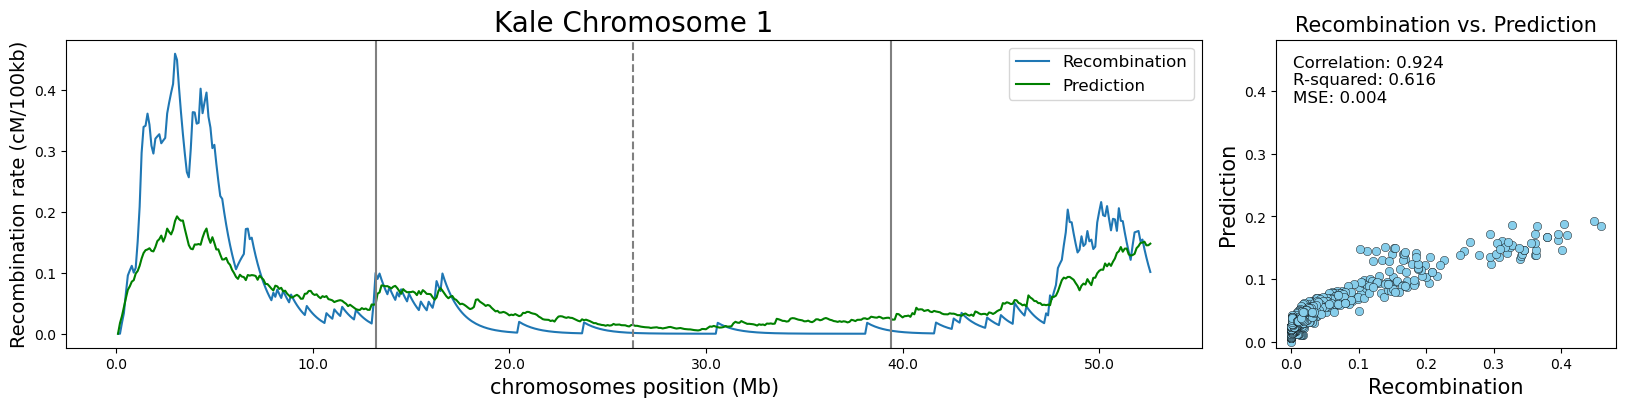

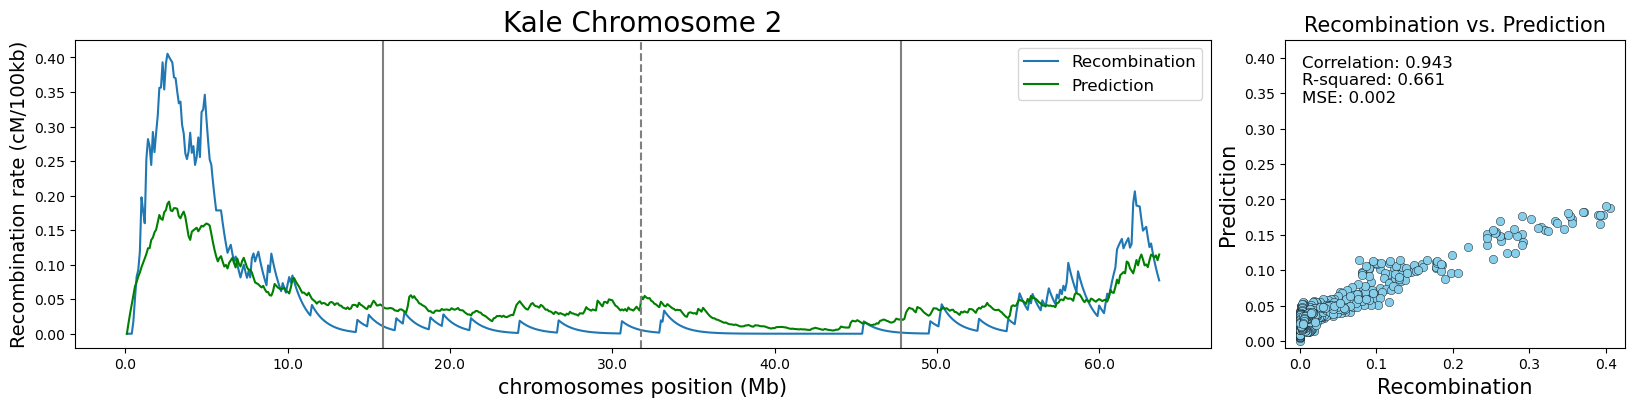

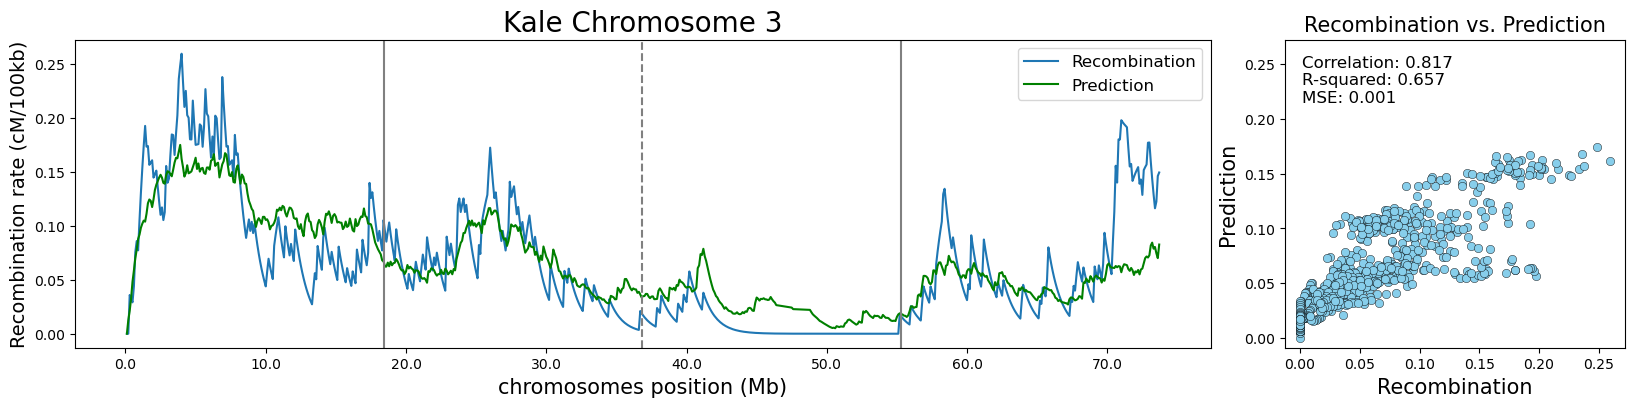

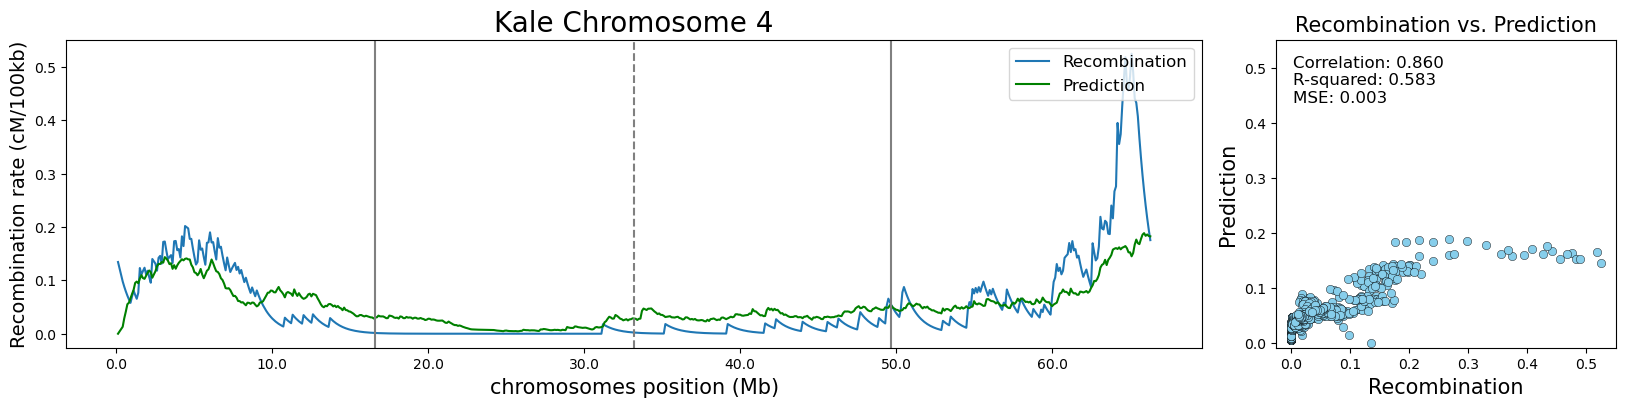

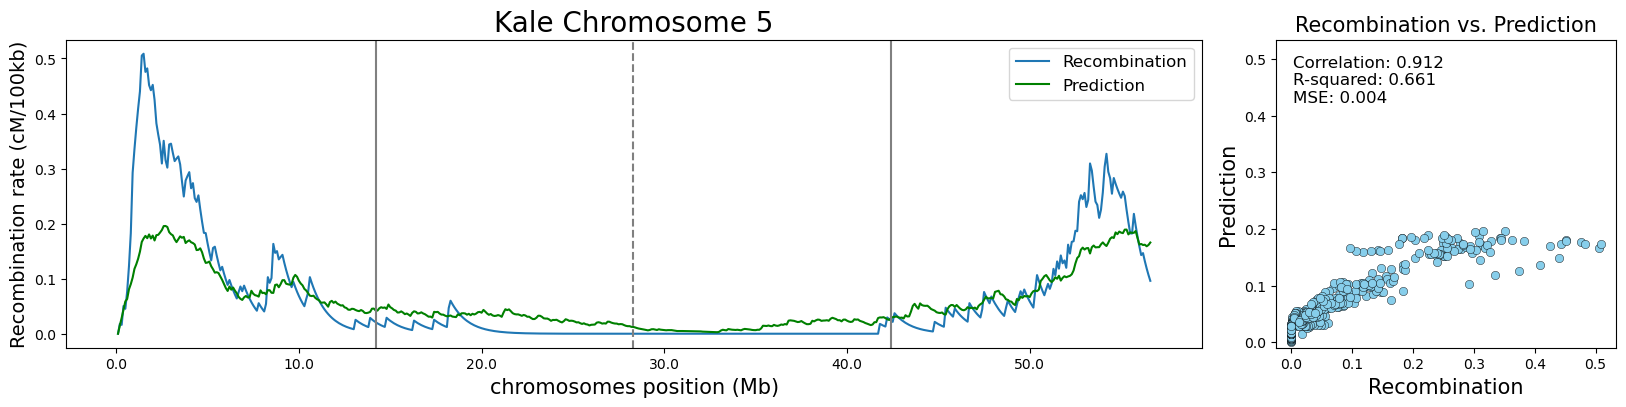

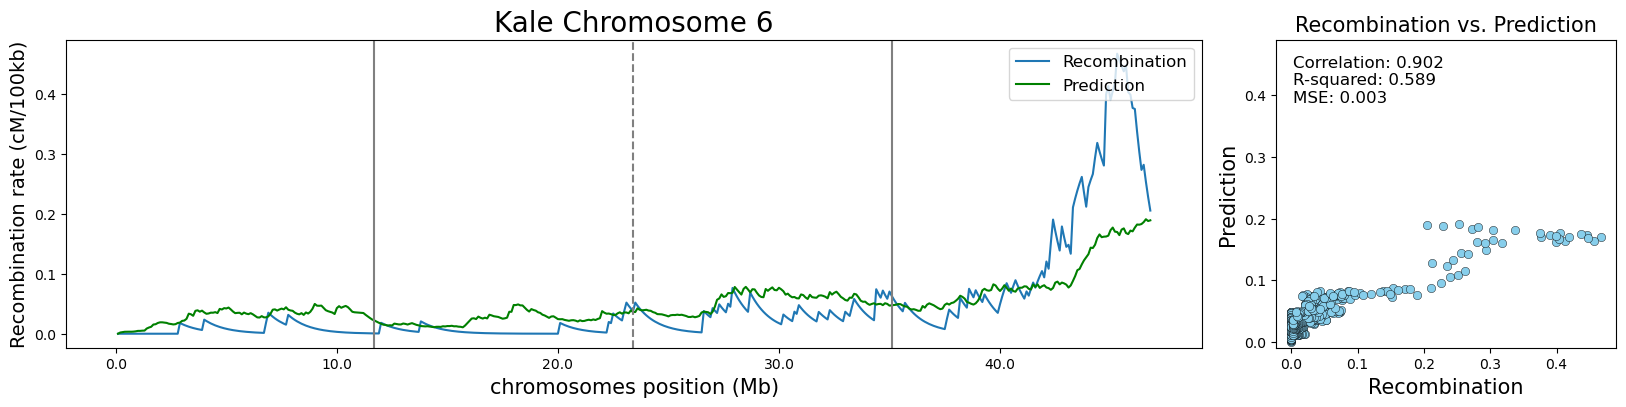

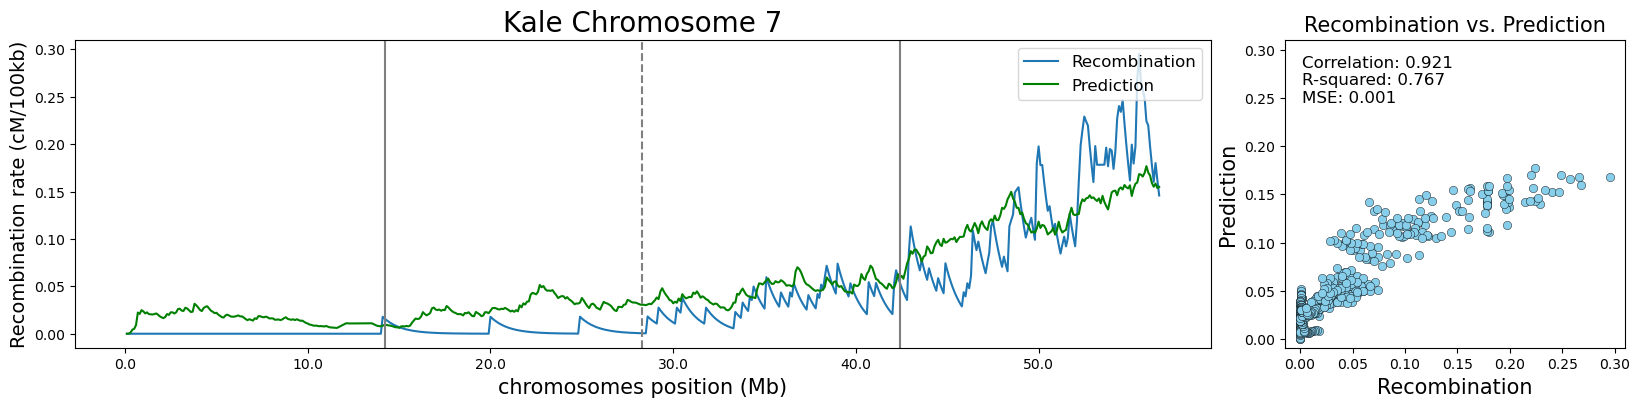

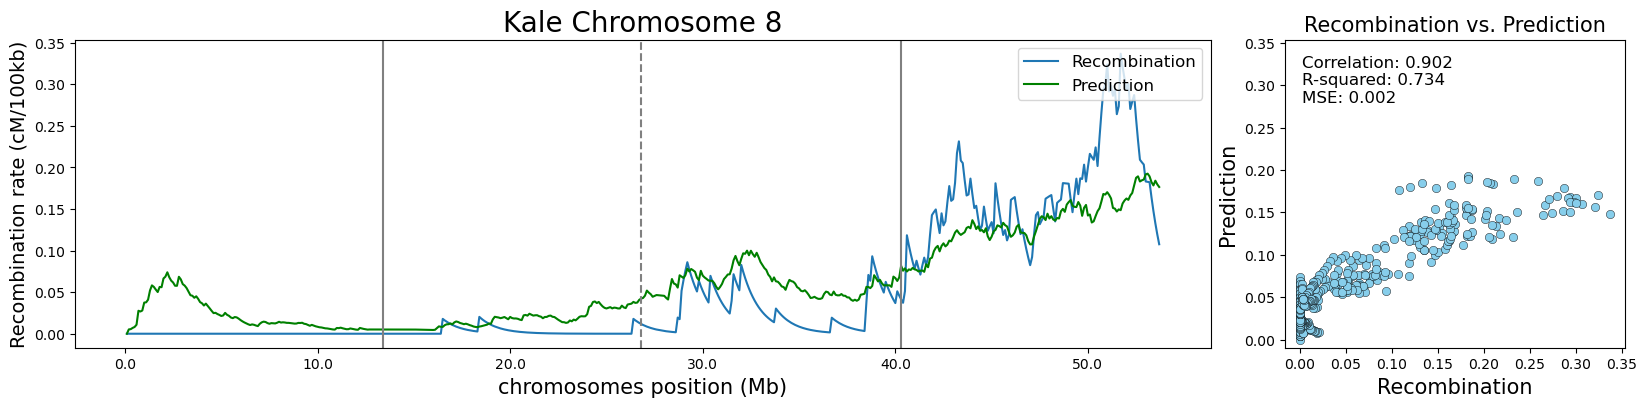

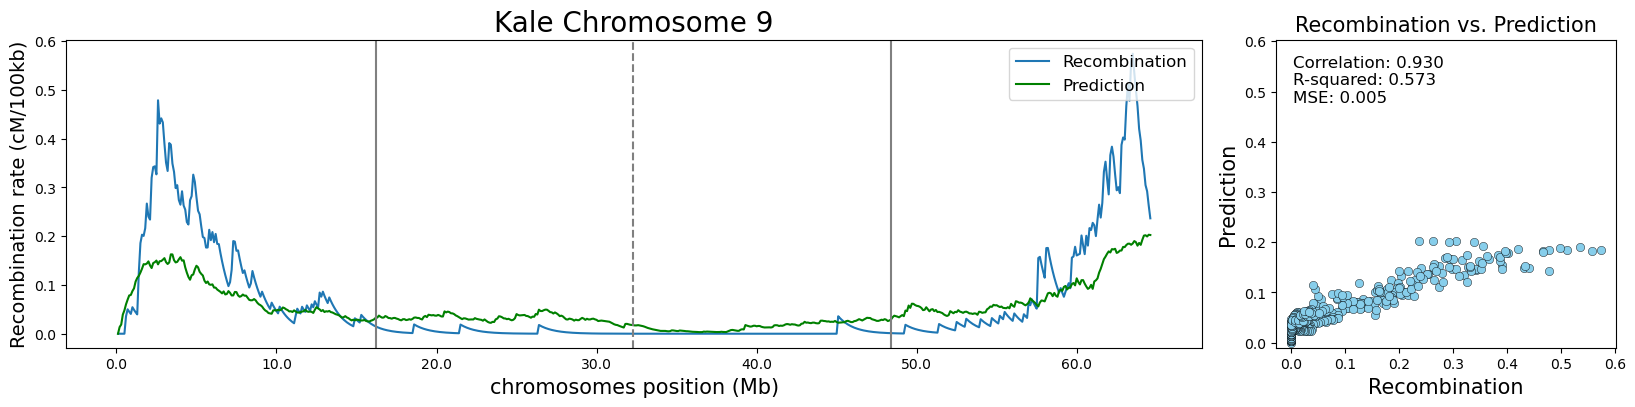

In [42]:
# Predictions and graphs for all chromosomes
for chr_number in range(1, 10):
    plot_chromosome_results(chr_number)
    plt.show()

# Data compilation

In [43]:
corr = pd.DataFrame({'corr':[corr_chr1, corr_chr2, corr_chr3, corr_chr4, corr_chr5, corr_chr6,corr_chr7,corr_chr8,corr_chr9,]})
r2 = pd.DataFrame({'R^2':[r2_chr1, r2_chr2, r2_chr3, r2_chr4, r2_chr5, r2_chr6, r2_chr7, r2_chr8, r2_chr9]})
mse = pd.DataFrame({'MSE':[mse_chr1, mse_chr2, mse_chr3, mse_chr4, mse_chr5, mse_chr6, mse_chr7, mse_chr8, mse_chr9]})
index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9',]})
tw_pk_table = pd.concat([index, corr, r2, mse], axis=1)
tw_pk_table

chr      corr       R^2       MSE
0  chr1  0.923586  0.615747  0.003600
1  chr2  0.942830  0.660940  0.002267
2  chr3  0.817330  0.657148  0.001082
3  chr4  0.860377  0.582838  0.002979
4  chr5  0.911529  0.661232  0.003570
5  chr6  0.901754  0.588636  0.003172
6  chr7  0.920642  0.767231  0.000865
7  chr8  0.901811  0.733634  0.001653
8  chr9  0.930496  0.572505  0.005328

Correlation between model predictions and recombination rates by quartiles

In [44]:
corr_q1 = pd.DataFrame({'Q1':[corr_q1_chr1,corr_q1_chr2,corr_q1_chr3,corr_q1_chr4,corr_q1_chr5,corr_q1_chr6,corr_q1_chr7,corr_q1_chr8,corr_q1_chr9]})
corr_q2 = pd.DataFrame({'Q2':[corr_q2_chr1,corr_q2_chr2,corr_q2_chr3,corr_q2_chr4,corr_q2_chr5,corr_q2_chr6,corr_q2_chr7,corr_q2_chr8,corr_q2_chr9]})
corr_q3 = pd.DataFrame({'Q3':[corr_q3_chr1,corr_q3_chr2,corr_q3_chr3,corr_q3_chr4,corr_q3_chr5,corr_q3_chr6,corr_q3_chr7,corr_q3_chr8,corr_q3_chr9]})
corr_q4 = pd.DataFrame({'Q4':[corr_q4_chr1,corr_q4_chr2,corr_q4_chr3,corr_q4_chr4,corr_q4_chr5,corr_q4_chr6,corr_q4_chr7,corr_q4_chr8,corr_q4_chr9]})

index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9']})
q_corr = pd.concat([index, corr_q1, corr_q2, corr_q3, corr_q4], axis=1)
q_corr_styled = q_corr.style.background_gradient(cmap="PRGn", vmin=-1, vmax=1)
q_corr_styled.set_table_styles([{'selector': 'th',
                                'props': [('text-align', 'center')]}])
q_corr_styled 

# Four model comparison

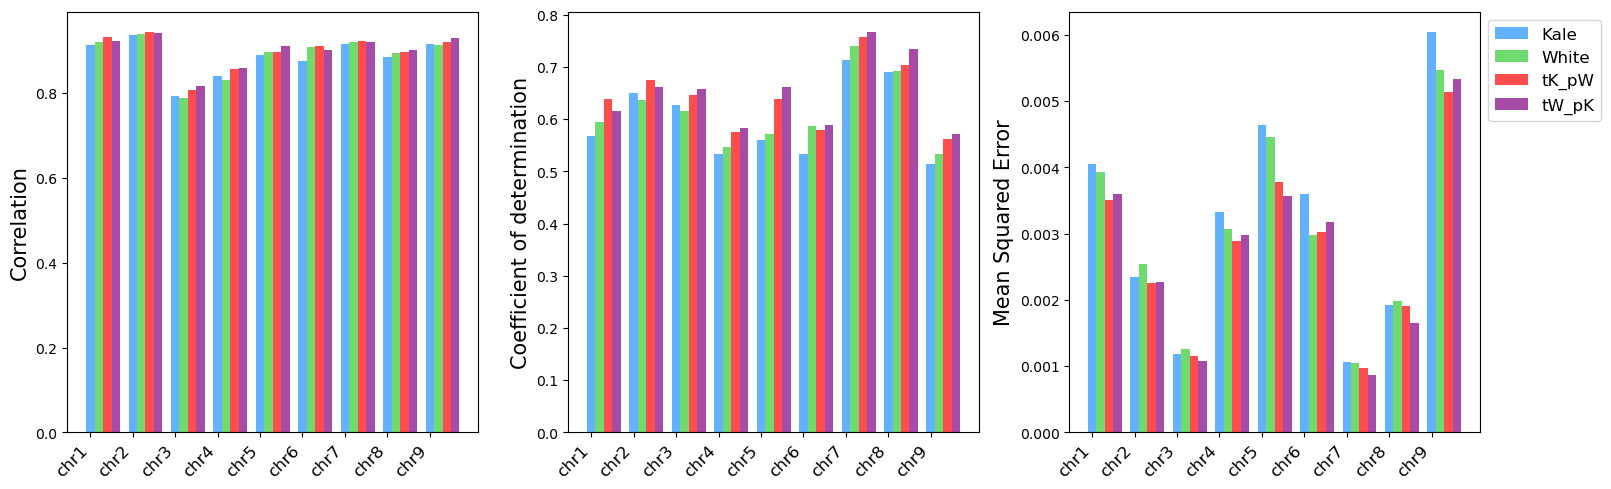

In [45]:
# Adjusting bar width
bar_width = 0.2

# Creating data positions
bar_positions_k = np.arange(len(k_table['chr']))
bar_positions_w = bar_positions_k + bar_width
bar_positions_tk_pw = bar_positions_w + bar_width
bar_positions_tw_pk = bar_positions_tk_pw + bar_width

# Creating subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# First chart
axs[0].bar(bar_positions_k, k_table['corr'], color='dodgerblue', width=bar_width, label='Kale', alpha=0.7)
axs[0].bar(bar_positions_w, w_table['corr'], color='limegreen', width=bar_width, label='White', alpha=0.7)
axs[0].bar(bar_positions_tk_pw, tk_pw_table['corr'], color='red', width=bar_width, label='tK_pW', alpha=0.7)
axs[0].bar(bar_positions_tw_pk, tw_pk_table['corr'], color='purple', width=bar_width, label='tW_pK', alpha=0.7)

axs[0].set_ylabel('Correlation', fontsize=15)

# Second chart

axs[1].bar(bar_positions_k, k_table['R^2'], color='dodgerblue', width=bar_width, label='Kale', alpha=0.7)
axs[1].bar(bar_positions_w, w_table['R^2'], color='limegreen', width=bar_width, label='White', alpha=0.7)
axs[1].bar(bar_positions_tk_pw, tk_pw_table['R^2'], color='red', width=bar_width, label='tK_pW', alpha=0.7)
axs[1].bar(bar_positions_tw_pk, tw_pk_table['R^2'], color='purple', width=bar_width, label='tW_pK', alpha=0.7)

axs[1].set_ylabel('Coefficient of determination', fontsize=15)

# Third chart

axs[2].bar(bar_positions_k, k_table['MSE'], color='dodgerblue', width=bar_width, label='Kale', alpha=0.7)
axs[2].bar(bar_positions_w, w_table['MSE'], color='limegreen', width=bar_width, label='White', alpha=0.7)
axs[2].bar(bar_positions_tk_pw, tk_pw_table['MSE'], color='red', width=bar_width, label='tK_pW', alpha=0.7)
axs[2].bar(bar_positions_tw_pk, tw_pk_table['MSE'], color='purple', width=bar_width, label='tW_pK', alpha=0.7)

axs[2].set_ylabel('Mean Squared Error', fontsize=15)

# Get chromosome labels from the 'chr' column
chr_labels = k_table['chr']

# Set x-axis labels for all three subplots
for ax in axs:
    ax.set_xticks(bar_positions_k)
    ax.set_xticklabels(chr_labels)

# Rotate labels for better readability
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Adjusting layout
plt.tight_layout()

# Place legend outside the subplots and above the last subplot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Show the figure
plt.show()

# Model trained with information from Brassica crosses to predict recombination on each Kale chromosome

In [46]:
study2.head(2)

cross reference   chr   start     end  srec  AAA_TTT  \
0  broccoli_cauliflower  broccoli  chr1       0  100000   0.0    10211   
1  broccoli_cauliflower  broccoli  chr1  100000  200000   0.0     8607   

   AAC_GTT  AAG_CTT  AAT_ATT  ...  LINE/L2  LINE/Rex-Babar  SINE  \
0     4046     3224     6793  ...        0               0     0   
1     3784     4268     5584  ...        0               0     0   

   Retroposon/L1-dep  Satellite  LINE/RTE-BovB  DNA/Sola-1  LTR/Caulimovirus  \
0                  0          0              0           0                 0   
1                  0          0              0           0                 0   

   DNA/Maverick  rRNA  
0             0     0  
1             0     0  

[2 rows x 80 columns]

In [47]:
all_info_without_kale = study2[study2['reference'] != 'kale' ]
all_info_without_kale

cross reference   chr     start       end      srec  \
0       broccoli_cauliflower  broccoli  chr1         0    100000  0.000000   
1       broccoli_cauliflower  broccoli  chr1    100000    200000  0.000000   
2       broccoli_cauliflower  broccoli  chr1    200000    300000  0.000000   
3       broccoli_cauliflower  broccoli  chr1    300000    400000  0.036497   
4       broccoli_cauliflower  broccoli  chr1    400000    500000  0.032847   
...                      ...       ...   ...       ...       ...       ...   
103831        white_kohlrabi  kohlrabi  chr9  64400000  64500000  0.189701   
103832        white_kohlrabi  kohlrabi  chr9  64500000  64600000  0.170731   
103833        white_kohlrabi  kohlrabi  chr9  64600000  64700000  0.153658   
103834        white_kohlrabi  kohlrabi  chr9  64700000  64800000  0.138292   
103835        white_kohlrabi  kohlrabi  chr9  64800000  64900000  0.124463   

        AAA_TTT  AAC_GTT  AAG_CTT  AAT_ATT  ...  LINE/L2  LINE/Rex-Babar  \
0         10211     4046     3224     6793  ...        0               0   
1          8607     3784     4268     5584  ...        0               0   
2          9715     4085     3807     6370  ...        0               0   
3          9583     3997     3850     6207  ...        0               0   
4          9883     3941     4052     6189  ...        0               0   
...         ...      ...      ...      ...  ...      ...             ...   
103831    11246     4299     3298     7081  ...        0               0   
103832    10101     4700     3424     6216  ...        0               0   
103833     9573     3974     3906     6380  ...        0               0   
103834    10861     4256     3452     7026  ...        0               0   
103835    10274     4087     3565     6577  ...        0               0   

        SINE  Retroposon/L1-dep  Satellite  LINE/RTE-BovB  DNA/Sola-1  \
0          0                  0          0              0           0   
1          0                  0          0              0           0   
2          0                  0          0              0           0   
3          0                  0          0              0           0   
4          0                  0          0              0           0   
...      ...                ...        ...            ...         ...   
103831     0                  0          0              0           0   
103832     0                  0          0              0           0   
103833     0                  0          0              0           0   
103834     0                  0          0              0           0   
103835     0                  0          0              0           0   

        LTR/Caulimovirus  DNA/Maverick  rRNA  
0                      0             0     0  
1                      0             0     0  
2                      0             0     0  
3                      0             0     0  
4                      0             0     0  
...                  ...           ...   ...  
103831                 0             0     0  
103832                 0             0     0  
103833                 0             0     0  
103834                 0             0     1  
103835                 0             0     0  

[82947 rows x 80 columns]

In [48]:
all_info_without_kale.reference.unique()

array(['broccoli', 'cauliflower', 'kohlrabi', 'white'], dtype=object)

In [49]:
# TRAINING MODEL WITH BRASSICA CROSSES
X_train = all_info_without_kale.drop(['cross', 'reference','chr','start','end','srec'], axis=1)
y_train = all_info_without_kale[['srec']]

model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=1)

In [50]:
# Objects with Kale data per chromosome
chr1 = k[k['chr']== 'chr1']
chr2 = k[k['chr']== 'chr2']
chr3 = k[k['chr']== 'chr3']
chr4 = k[k['chr']== 'chr4']
chr5 = k[k['chr']== 'chr5']
chr6 = k[k['chr']== 'chr6']
chr7 = k[k['chr']== 'chr7']
chr8 = k[k['chr']== 'chr8']
chr9 = k[k['chr']== 'chr9']

In [51]:
def plot_chromosome_results(chr_number):
    # Replace  with 'chr{chr_number}' 
    chromosomes_data = globals()[f'achr{chr_number}']
    chr_data = globals()[f'chr{chr_number}']

    # MODEL PREDICTIONS
    model_preds = model.predict(chr_data.drop(['cross', 'reference','chr','start','end','srec'], axis=1))
    
    #SMOOTHING
    model_spreds= np.zeros(len(model_preds))

    for i in  range(1, len(model_preds)): 
        model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9
        
    #CORRELATIONS BY QUARTILES
    c_q1 = int(len(chr_data)*0.25)
    c_q2 = int(len(chr_data)*0.50)
    c_q3 = int(len(chr_data)*0.75)
    
    rq1 = chr_data['srec'].iloc[0:c_q1]
    rq2 = chr_data['srec'].iloc[c_q1:c_q2]
    rq3 = chr_data['srec'].iloc[c_q2:c_q3]
    rq4 = chr_data['srec'].iloc[c_q3:int(len(chr_data))]

    pq1 = model_spreds[0:c_q1]
    pq2 = model_spreds[c_q1:c_q2]
    pq3 = model_spreds[c_q2:c_q3]
    pq4 = model_spreds[c_q3:int(len(chr_data))]

    corr_q1 = np.corrcoef(rq1, pq1)[0, 1]
    corr_q2 = np.corrcoef(rq2, pq2)[0, 1]
    corr_q3 = np.corrcoef(rq3, pq3)[0, 1]
    corr_q4 = np.corrcoef(rq4, pq4)[0, 1]
    
    globals()[f'corr_q1_chr{chr_number}'] = corr_q1
    globals()[f'corr_q2_chr{chr_number}'] = corr_q2
    globals()[f'corr_q3_chr{chr_number}'] = corr_q3
    globals()[f'corr_q4_chr{chr_number}'] = corr_q4
     
    # PLOTTING RESULTS
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4), gridspec_kw={'width_ratios': [10, 3]})

    # Line plot and correlation plot
    ax1.plot(chr_data.end, chr_data.srec, label='Recombination')
    ax1.plot(chr_data.end, model_spreds, label='Prediction', color='green')
    ax1.set_title(f'Kale Chromosome {chr_number}', fontsize=20)
    ax1.set_xlabel('chromosomes position (Mb)', fontsize=15)
    ax1.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
    ax1.legend(loc='upper right', fontsize=12)
    ticks = ax1.get_xticks() / 1000000
    ax1.set_xticklabels(ticks)
        
    chr_len = chr_data["end"].iloc[-1]
    q1 =round(chr_len * 0.25 / 100000) * 100000
    q2 =round(chr_len* 0.50 / 100000) * 100000
    q3 =round(chr_len * 0.75 / 100000) * 100000

    ax1.axvline(x=q1, color='gray', linestyle='-')
    ax1.axvline(x=q2, color='gray', linestyle='--')
    ax1.axvline(x=q3, color='gray', linestyle='-')

    # Scatter plot
    scatter = ax2.scatter(chr_data.srec, model_spreds, c='skyblue', edgecolors='black', linewidth= 0.3)
    ax2.set_title('Recombination vs. Prediction', fontsize=15)
    ax2.set_xlabel('Recombination', fontsize=15)
    ax2.set_ylabel('Prediction', fontsize=15)

    # Calculate correlation coefficient, coefficient of determination, and Mean Squared Error
    corr_chr = np.corrcoef(chr_data.srec, model_spreds)[0, 1]
    r2_chr = r2_score(chr_data.srec, model_spreds)
    mse_chr = mean_squared_error(chr_data.srec, model_spreds)

    # Calculate the aspect ratio based on the plot heights
    h1 = ax1.get_ylim()
    h2 = ax2.get_ylim()
    aspect_ratio = max(h1[1] - h1[0], h2[1] - h2[0]) / (max(h1[1], h2[1]) - min(h1[0], h2[0]))

    # Set the aspect ratio for the scatter plot only if it doesn't distort the square shape
    if aspect_ratio < 1:
        ax2.set_aspect('equal')

    # Display correlation coefficient, coefficient of determination, and Mean Squared Error as plain text
    globals()[f'corr_chr{chr_number}'] = corr_chr
    globals()[f'r2_chr{chr_number}'] = r2_chr
    globals()[f'mse_chr{chr_number}'] = mse_chr

    textstr = f'Correlation: {corr_chr:.3f}\nR-squared: {r2_chr:.3f}\nMSE: {mse_chr:.3f}'
    ax2.text(0.05, 0.95, textstr, transform=ax2.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

    # Adjustments to align the heights of the two plots
    max_height = max(h1[1], h2[1])
    ax1.set_ylim([h1[0], max_height])
    ax2.set_ylim([h2[0], max_height])

    # Reduce the separation between the plots
    plt.subplots_adjust(wspace=0.1)
    plt.show()

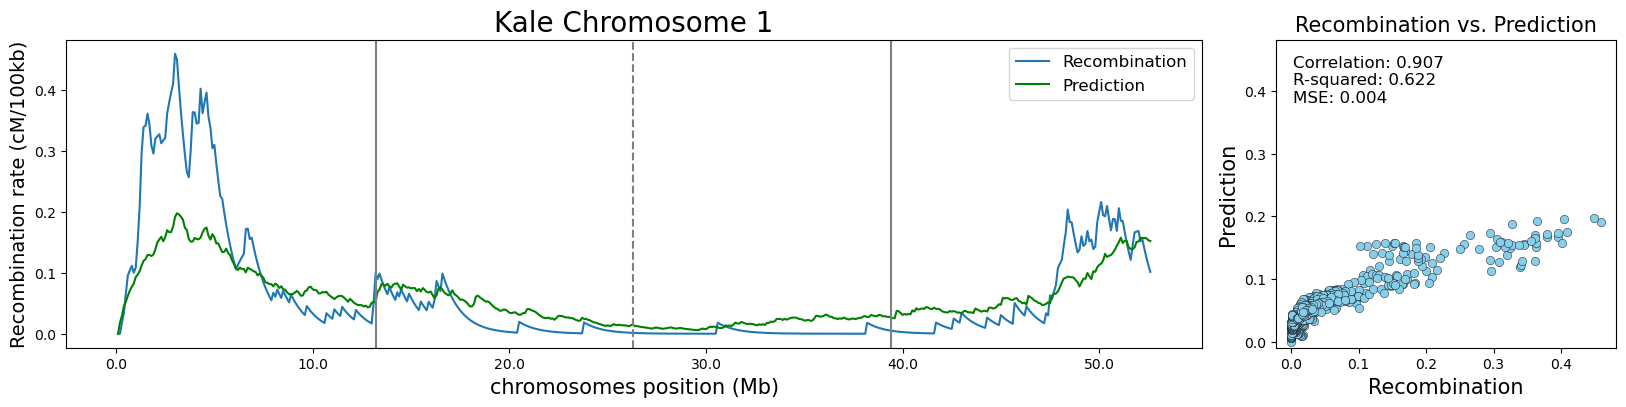

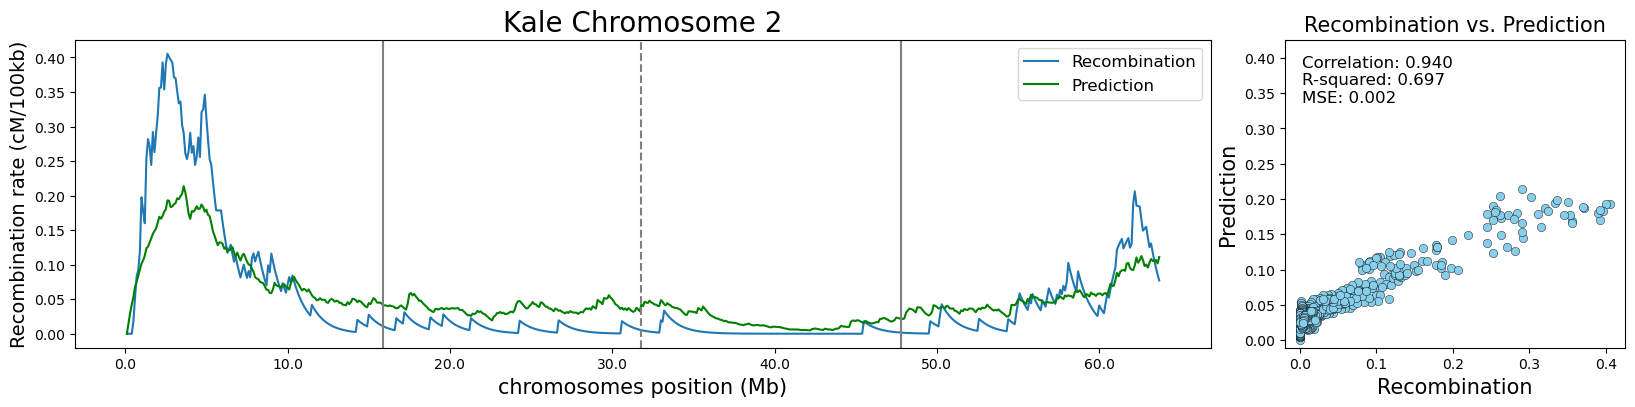

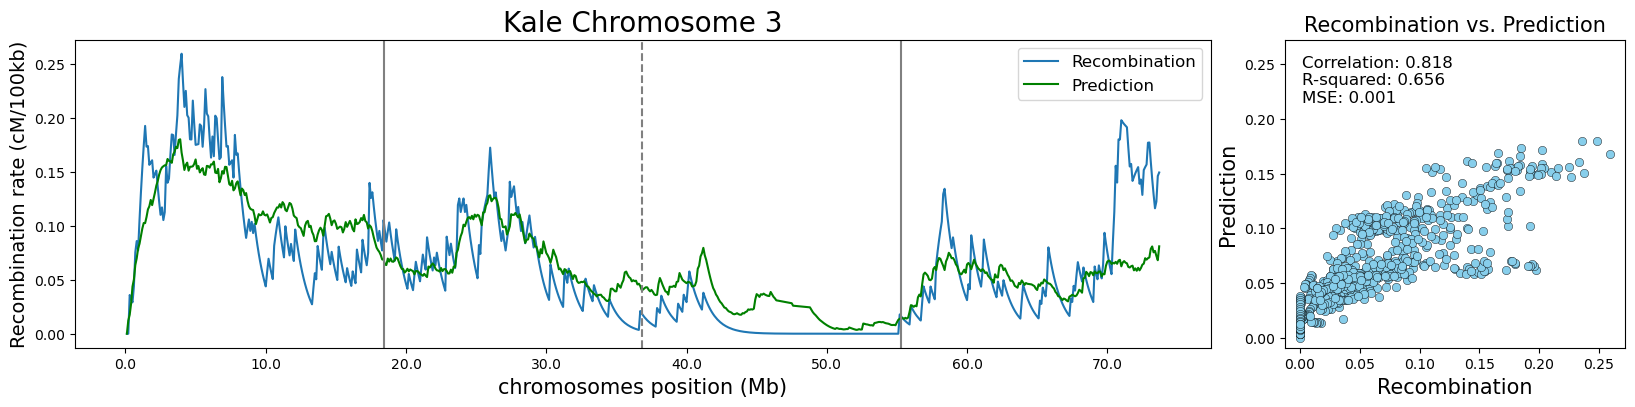

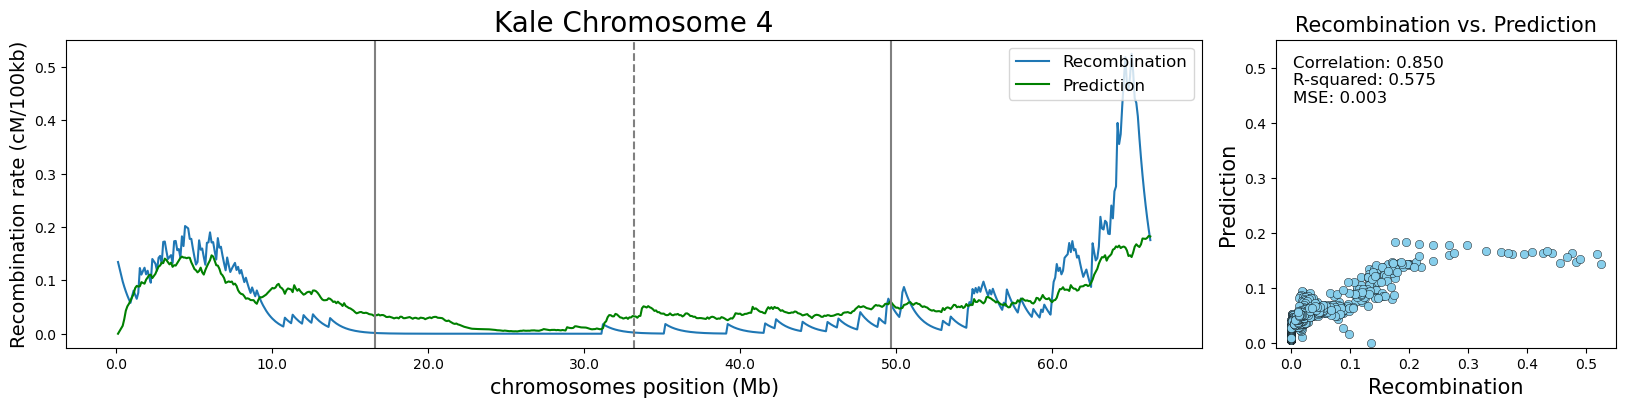

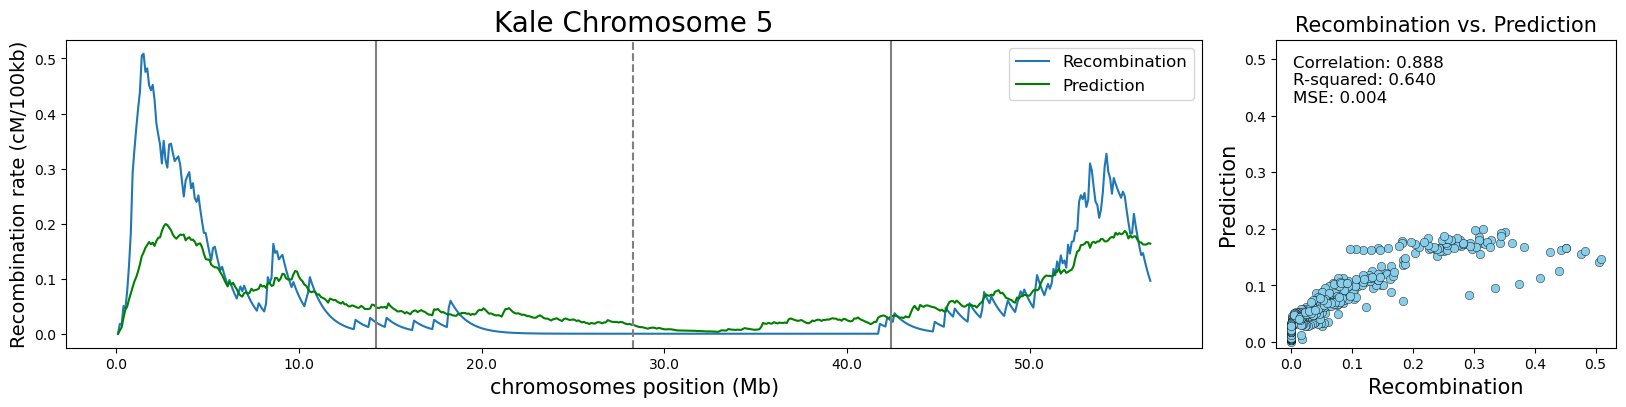

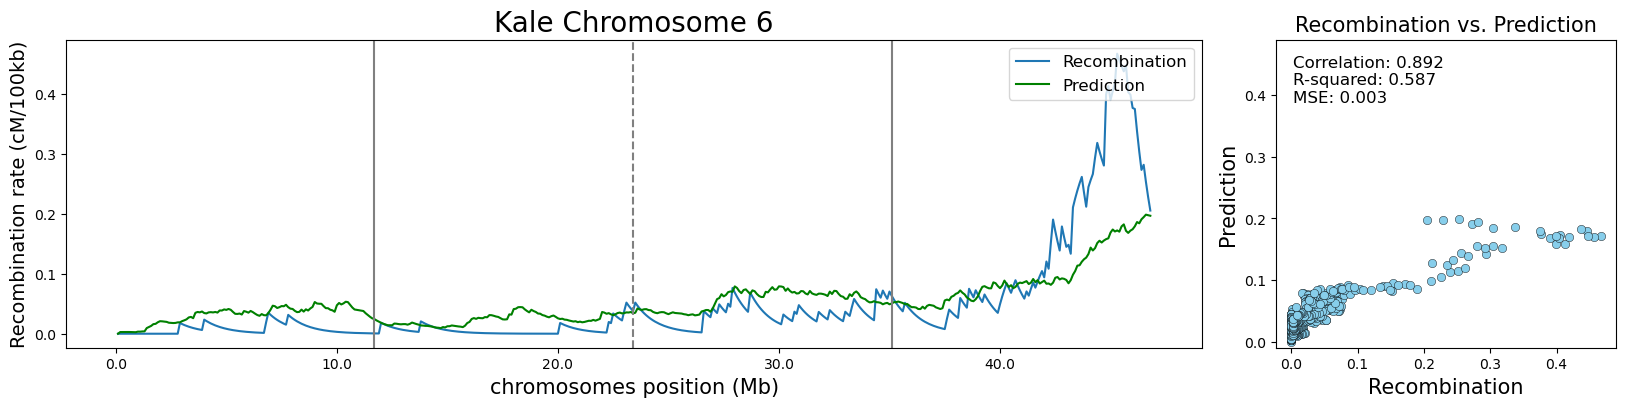

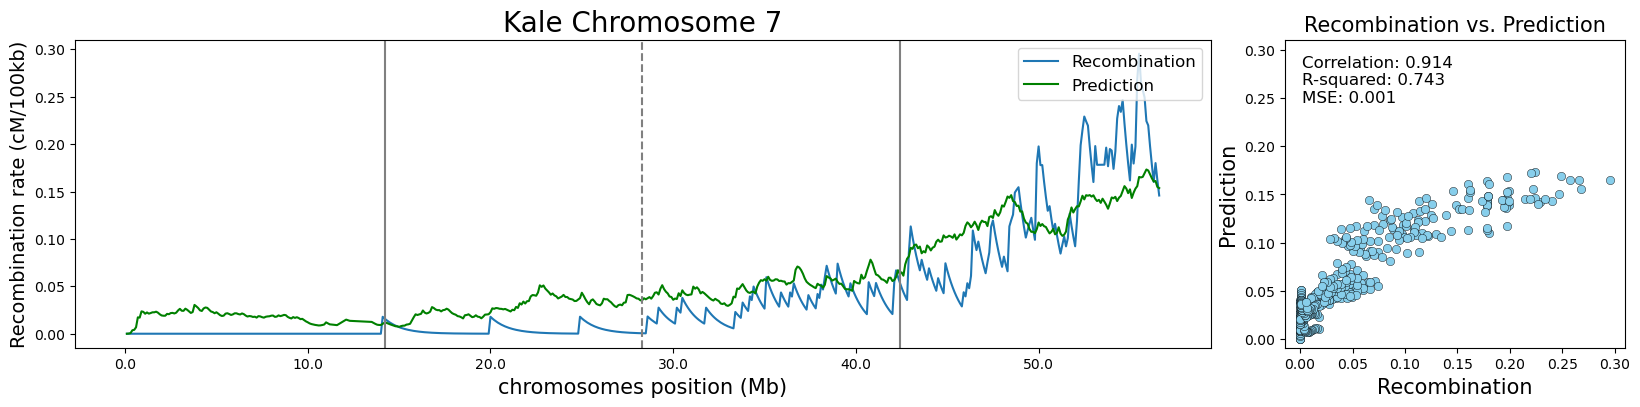

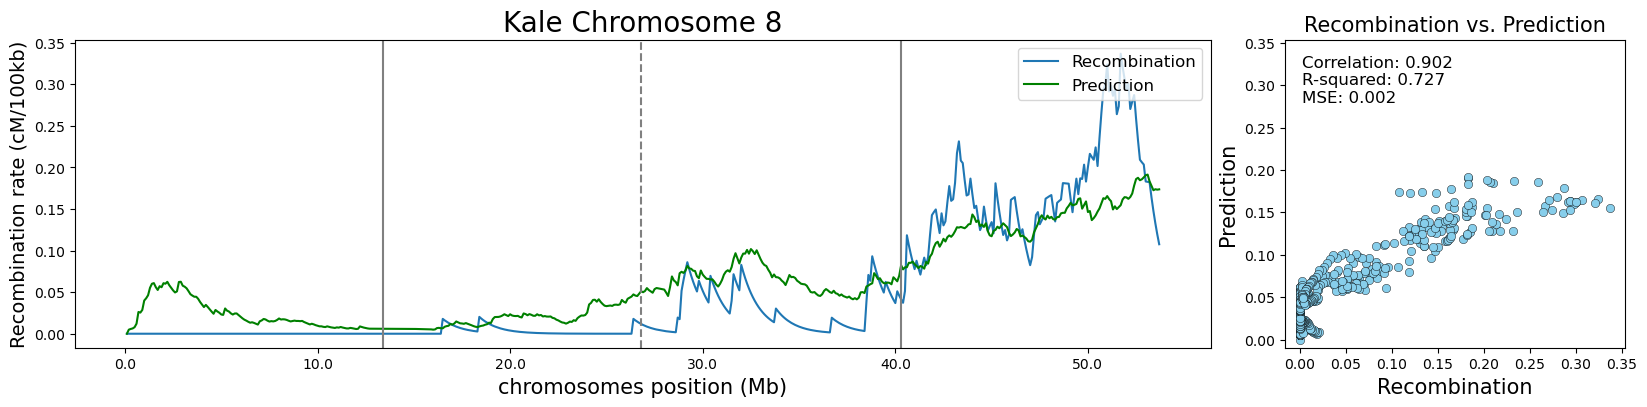

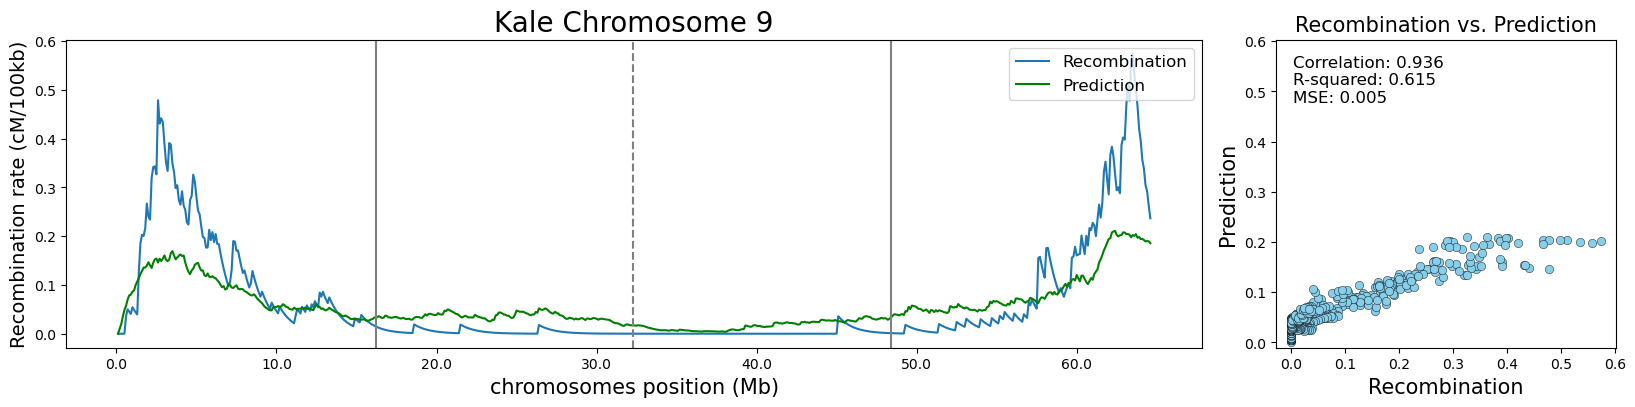

In [52]:
# Predictions and graphs for all chromosomes
for chr_number in range(1, 10):
    plot_chromosome_results(chr_number)
    plt.show()

# Data compilation

In [53]:
corr = pd.DataFrame({'corr':[corr_chr1, corr_chr2, corr_chr3, corr_chr4, corr_chr5, corr_chr6,corr_chr7,corr_chr8,corr_chr9,]})
r2 = pd.DataFrame({'R^2':[r2_chr1, r2_chr2, r2_chr3, r2_chr4, r2_chr5, r2_chr6, r2_chr7, r2_chr8, r2_chr9]})
mse = pd.DataFrame({'MSE':[mse_chr1, mse_chr2, mse_chr3, mse_chr4, mse_chr5, mse_chr6, mse_chr7, mse_chr8, mse_chr9]})
index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9',]})
ta_pk_table = pd.concat([index, corr, r2, mse], axis=1)
ta_pk_table

chr      corr       R^2       MSE
0  chr1  0.906715  0.622358  0.003538
1  chr2  0.940222  0.697223  0.002025
2  chr3  0.818007  0.655632  0.001086
3  chr4  0.849858  0.574844  0.003036
4  chr5  0.887550  0.640017  0.003793
5  chr6  0.891905  0.587393  0.003182
6  chr7  0.914421  0.742928  0.000956
7  chr8  0.901857  0.726585  0.001696
8  chr9  0.936315  0.615191  0.004796

In [54]:
corr_q1 = pd.DataFrame({'Q1':[corr_q1_chr1,corr_q1_chr2,corr_q1_chr3,corr_q1_chr4,corr_q1_chr5,corr_q1_chr6,corr_q1_chr7,corr_q1_chr8,corr_q1_chr9]})
corr_q2 = pd.DataFrame({'Q2':[corr_q2_chr1,corr_q2_chr2,corr_q2_chr3,corr_q2_chr4,corr_q2_chr5,corr_q2_chr6,corr_q2_chr7,corr_q2_chr8,corr_q2_chr9]})
corr_q3 = pd.DataFrame({'Q3':[corr_q3_chr1,corr_q3_chr2,corr_q3_chr3,corr_q3_chr4,corr_q3_chr5,corr_q3_chr6,corr_q3_chr7,corr_q3_chr8,corr_q3_chr9]})
corr_q4 = pd.DataFrame({'Q4':[corr_q4_chr1,corr_q4_chr2,corr_q4_chr3,corr_q4_chr4,corr_q4_chr5,corr_q4_chr6,corr_q4_chr7,corr_q4_chr8,corr_q4_chr9]})

index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9']})
q_corr = pd.concat([index, corr_q1, corr_q2, corr_q3, corr_q4], axis=1)
q_corr_styled = q_corr.style.background_gradient(cmap="PRGn", vmin=-1, vmax=1)
q_corr_styled.set_table_styles([{'selector': 'th',
                                'props': [('text-align', 'center')]}])
q_corr_styled 

# Model trained with information from Brassica crosses to predict recombination on each White chromosome

In [55]:
all_info_without_white = study2[study2['reference'] != 'white' ]
all_info_without_white

cross reference   chr     start       end      srec  \
0       broccoli_cauliflower  broccoli  chr1         0    100000  0.000000   
1       broccoli_cauliflower  broccoli  chr1    100000    200000  0.000000   
2       broccoli_cauliflower  broccoli  chr1    200000    300000  0.000000   
3       broccoli_cauliflower  broccoli  chr1    300000    400000  0.036497   
4       broccoli_cauliflower  broccoli  chr1    400000    500000  0.032847   
...                      ...       ...   ...       ...       ...       ...   
103831        white_kohlrabi  kohlrabi  chr9  64400000  64500000  0.189701   
103832        white_kohlrabi  kohlrabi  chr9  64500000  64600000  0.170731   
103833        white_kohlrabi  kohlrabi  chr9  64600000  64700000  0.153658   
103834        white_kohlrabi  kohlrabi  chr9  64700000  64800000  0.138292   
103835        white_kohlrabi  kohlrabi  chr9  64800000  64900000  0.124463   

        AAA_TTT  AAC_GTT  AAG_CTT  AAT_ATT  ...  LINE/L2  LINE/Rex-Babar  \
0         10211     4046     3224     6793  ...        0               0   
1          8607     3784     4268     5584  ...        0               0   
2          9715     4085     3807     6370  ...        0               0   
3          9583     3997     3850     6207  ...        0               0   
4          9883     3941     4052     6189  ...        0               0   
...         ...      ...      ...      ...  ...      ...             ...   
103831    11246     4299     3298     7081  ...        0               0   
103832    10101     4700     3424     6216  ...        0               0   
103833     9573     3974     3906     6380  ...        0               0   
103834    10861     4256     3452     7026  ...        0               0   
103835    10274     4087     3565     6577  ...        0               0   

        SINE  Retroposon/L1-dep  Satellite  LINE/RTE-BovB  DNA/Sola-1  \
0          0                  0          0              0           0   
1          0                  0          0              0           0   
2          0                  0          0              0           0   
3          0                  0          0              0           0   
4          0                  0          0              0           0   
...      ...                ...        ...            ...         ...   
103831     0                  0          0              0           0   
103832     0                  0          0              0           0   
103833     0                  0          0              0           0   
103834     0                  0          0              0           0   
103835     0                  0          0              0           0   

        LTR/Caulimovirus  DNA/Maverick  rRNA  
0                      0             0     0  
1                      0             0     0  
2                      0             0     0  
3                      0             0     0  
4                      0             0     0  
...                  ...           ...   ...  
103831                 0             0     0  
103832                 0             0     0  
103833                 0             0     0  
103834                 0             0     1  
103835                 0             0     0  

[82954 rows x 80 columns]

In [56]:
all_info_without_white.reference.unique()

array(['broccoli', 'cauliflower', 'kohlrabi', 'kale'], dtype=object)

In [57]:
# TRAINING MODEL WITH BRASSICA CROSSES
X_train = all_info_without_white.drop(['cross', 'reference','chr','start','end','srec'], axis=1)
y_train = all_info_without_white[['srec']]

model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=1)

In [58]:
# Objects with White data per chromosome
chr1 = w[w['chr']== 'chr1']
chr2 = w[w['chr']== 'chr3']
chr4 = w[w['chr']== 'chr4']
chr5 = w[w['chr']== 'chr5']
chr6 = w[w['chr']== 'chr6']
chr7 = w[w['chr']== 'chr7']
chr8 = w[w['chr']== 'chr8']
chr9 = w[w['chr']== 'chr9']

In [59]:
def plot_chromosome_results(chr_number):
    # Replace  with 'chr{chr_number}' 
    chromosomes_data = globals()[f'achr{chr_number}']
    chr_data = globals()[f'chr{chr_number}']

    # MODEL PREDICTIONS
    model_preds = model.predict(chr_data.drop(['cross', 'reference','chr','start','end','srec'], axis=1))
    
    #SMOOTHING
    model_spreds= np.zeros(len(model_preds))

    for i in  range(1, len(model_preds)): 
        model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9
        
    #CORRELATIONS BY QUARTILES
    c_q1 = int(len(chr_data)*0.25)
    c_q2 = int(len(chr_data)*0.50)
    c_q3 = int(len(chr_data)*0.75)
    
    rq1 = chr_data['srec'].iloc[0:c_q1]
    rq2 = chr_data['srec'].iloc[c_q1:c_q2]
    rq3 = chr_data['srec'].iloc[c_q2:c_q3]
    rq4 = chr_data['srec'].iloc[c_q3:int(len(chr_data))]

    pq1 = model_spreds[0:c_q1]
    pq2 = model_spreds[c_q1:c_q2]
    pq3 = model_spreds[c_q2:c_q3]
    pq4 = model_spreds[c_q3:int(len(chr_data))]

    corr_q1 = np.corrcoef(rq1, pq1)[0, 1]
    corr_q2 = np.corrcoef(rq2, pq2)[0, 1]
    corr_q3 = np.corrcoef(rq3, pq3)[0, 1]
    corr_q4 = np.corrcoef(rq4, pq4)[0, 1]
    
    globals()[f'corr_q1_chr{chr_number}'] = corr_q1
    globals()[f'corr_q2_chr{chr_number}'] = corr_q2
    globals()[f'corr_q3_chr{chr_number}'] = corr_q3
    globals()[f'corr_q4_chr{chr_number}'] = corr_q4
     
    # PLOTTING RESULTS
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4), gridspec_kw={'width_ratios': [10, 3]})

    # Line plot and correlation plot
    ax1.plot(chr_data.end, chr_data.srec, label='Recombination')
    ax1.plot(chr_data.end, model_spreds, label='Prediction', color='green')
    ax1.set_title(f'White Chromosome {chr_number}', fontsize=20)
    ax1.set_xlabel('chromosomes position (Mb)', fontsize=15)
    ax1.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
    ax1.legend(loc='upper right', fontsize=12)
    ticks = ax1.get_xticks() / 1000000
    ax1.set_xticklabels(ticks)
        
    chr_len = chr_data["end"].iloc[-1]
    q1 =round(chr_len * 0.25 / 100000) * 100000
    q2 =round(chr_len* 0.50 / 100000) * 100000
    q3 =round(chr_len * 0.75 / 100000) * 100000

    ax1.axvline(x=q1, color='gray', linestyle='-')
    ax1.axvline(x=q2, color='gray', linestyle='--')
    ax1.axvline(x=q3, color='gray', linestyle='-')

    # Scatter plot
    scatter = ax2.scatter(chr_data.srec, model_spreds, c='skyblue', edgecolors='black', linewidth= 0.3)
    ax2.set_title('Recombination vs. Prediction', fontsize=15)
    ax2.set_xlabel('Recombination', fontsize=15)
    ax2.set_ylabel('Prediction', fontsize=15)

    # Calculate correlation coefficient, coefficient of determination, and Mean Squared Error
    corr_chr = np.corrcoef(chr_data.srec, model_spreds)[0, 1]
    r2_chr = r2_score(chr_data.srec, model_spreds)
    mse_chr = mean_squared_error(chr_data.srec, model_spreds)

    # Calculate the aspect ratio based on the plot heights
    h1 = ax1.get_ylim()
    h2 = ax2.get_ylim()
    aspect_ratio = max(h1[1] - h1[0], h2[1] - h2[0]) / (max(h1[1], h2[1]) - min(h1[0], h2[0]))

    # Set the aspect ratio for the scatter plot only if it doesn't distort the square shape
    if aspect_ratio < 1:
        ax2.set_aspect('equal')

    # Display correlation coefficient, coefficient of determination, and Mean Squared Error as plain text
    globals()[f'corr_chr{chr_number}'] = corr_chr
    globals()[f'r2_chr{chr_number}'] = r2_chr
    globals()[f'mse_chr{chr_number}'] = mse_chr

    textstr = f'Correlation: {corr_chr:.3f}\nR-squared: {r2_chr:.3f}\nMSE: {mse_chr:.3f}'
    ax2.text(0.05, 0.95, textstr, transform=ax2.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

    # Adjustments to align the heights of the two plots
    max_height = max(h1[1], h2[1])
    ax1.set_ylim([h1[0], max_height])
    ax2.set_ylim([h2[0], max_height])

    # Reduce the separation between the plots
    plt.subplots_adjust(wspace=0.1)
    plt.show()

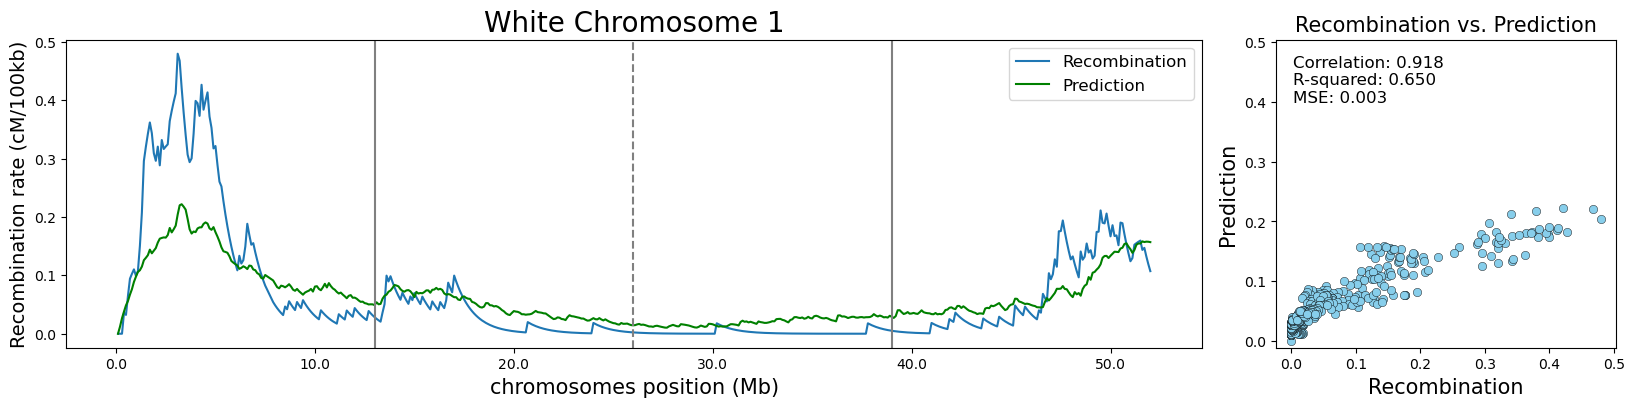

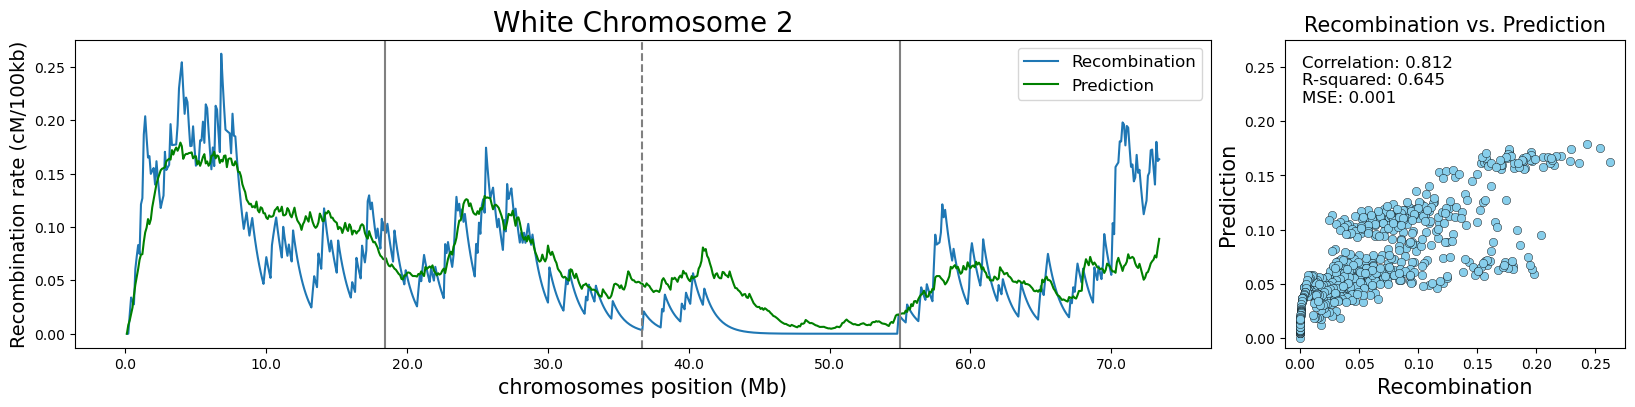

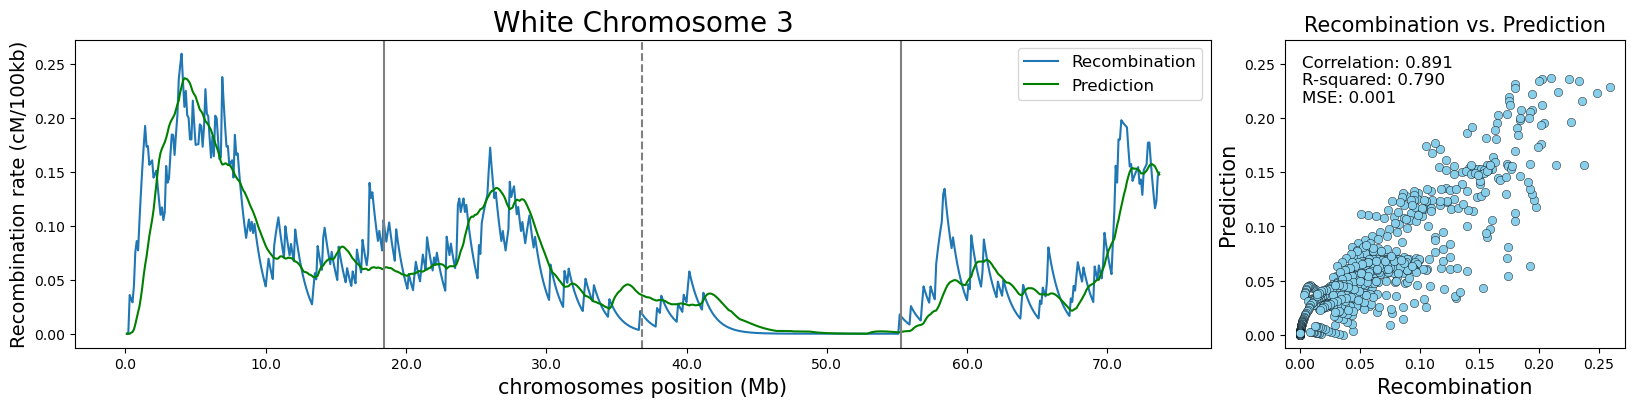

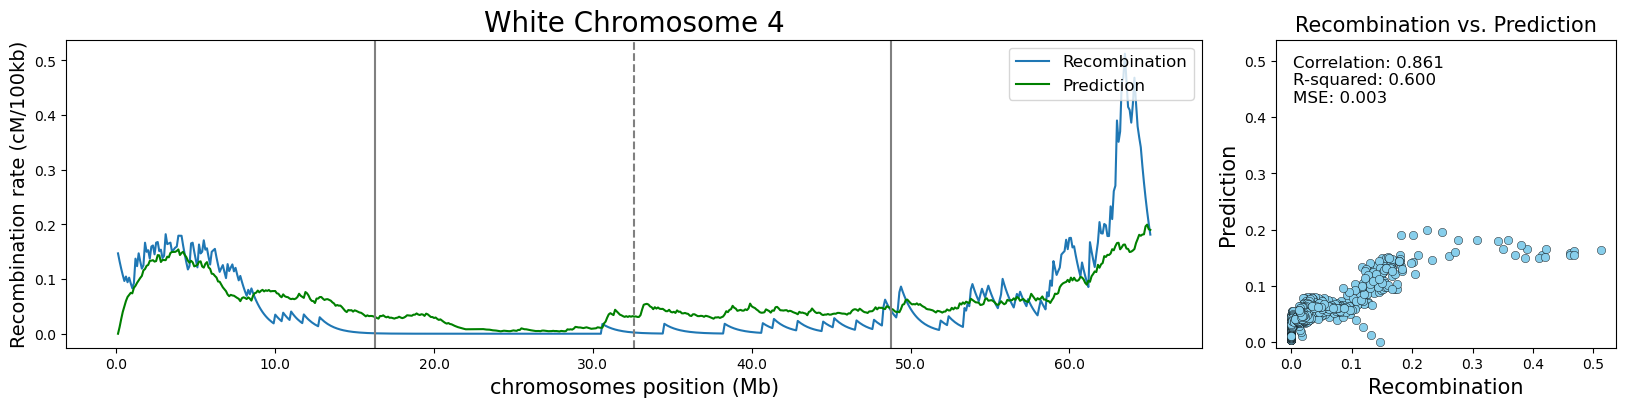

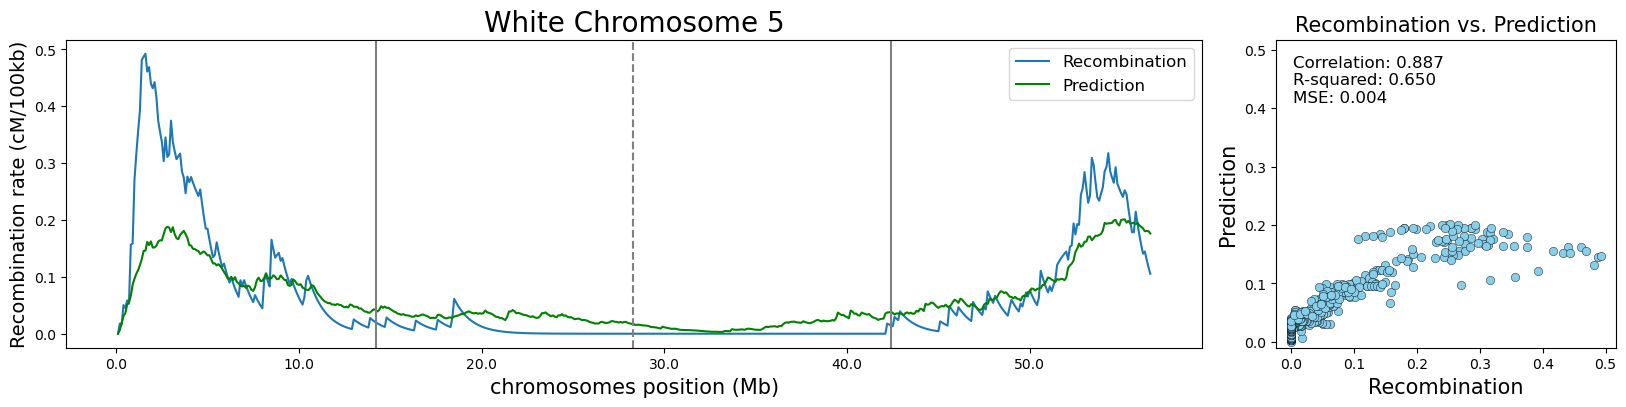

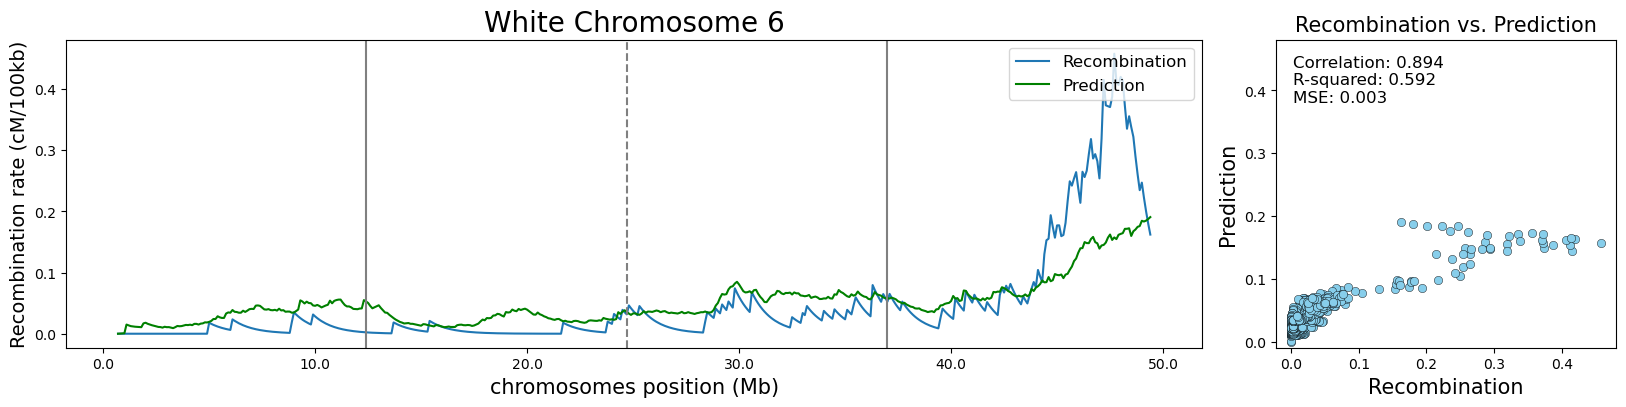

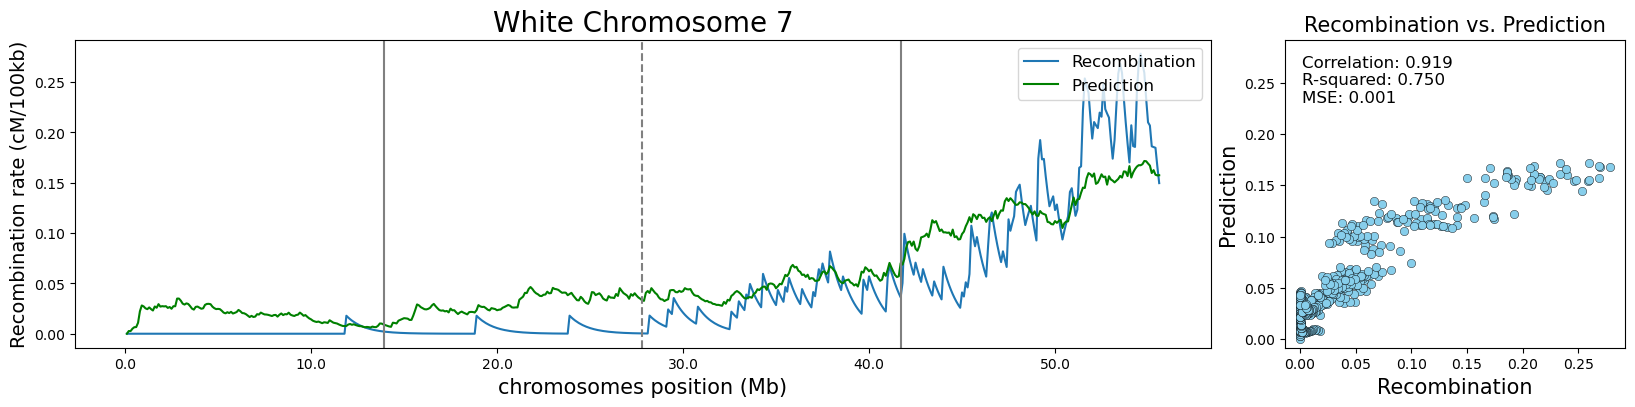

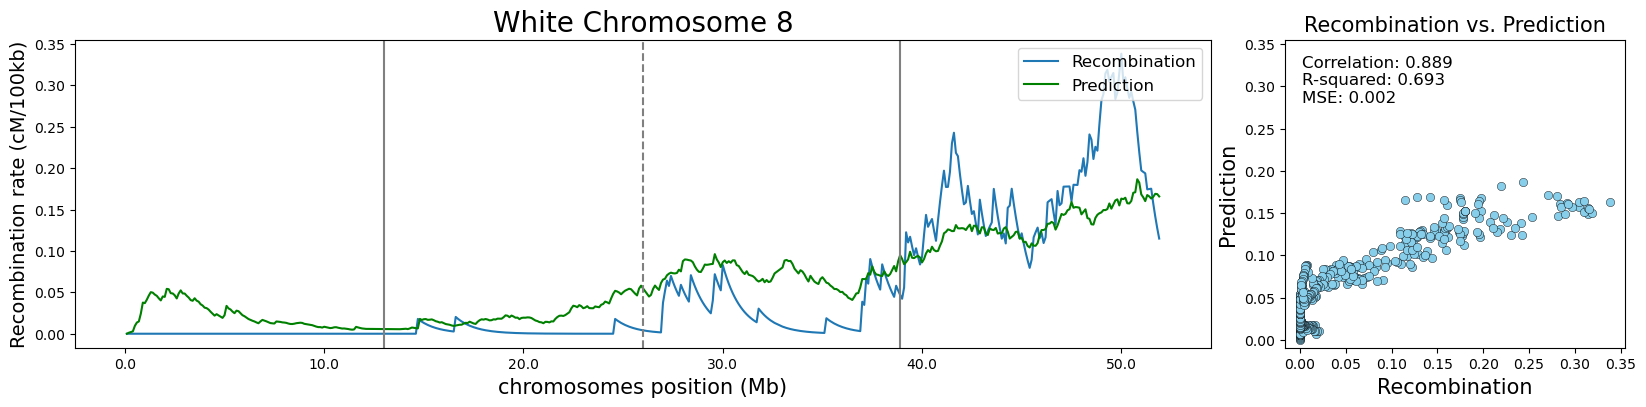

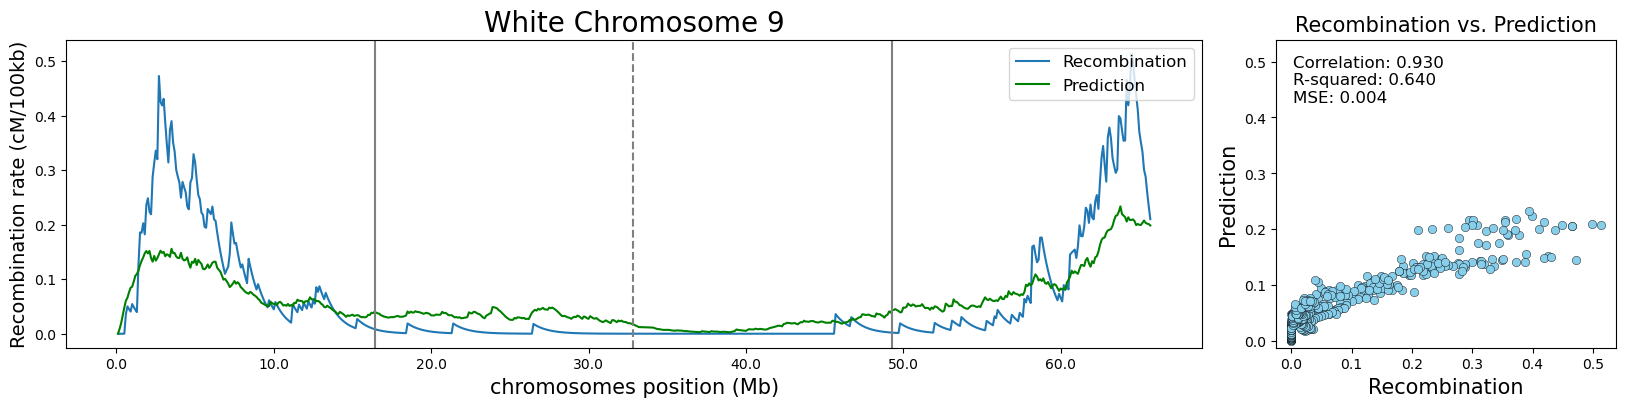

In [60]:
# Predictions and graphs for all chromosomes
for chr_number in range(1, 10):
    plot_chromosome_results(chr_number)
    plt.show()

# Data compilation

In [61]:
corr = pd.DataFrame({'corr':[corr_chr1, corr_chr2, corr_chr3, corr_chr4, corr_chr5, corr_chr6,corr_chr7,corr_chr8,corr_chr9,]})
r2 = pd.DataFrame({'R^2':[r2_chr1, r2_chr2, r2_chr3, r2_chr4, r2_chr5, r2_chr6, r2_chr7, r2_chr8, r2_chr9]})
mse = pd.DataFrame({'MSE':[mse_chr1, mse_chr2, mse_chr3, mse_chr4, mse_chr5, mse_chr6, mse_chr7, mse_chr8, mse_chr9]})
index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9',]})
ta_pw_table = pd.concat([index, corr, r2, mse], axis=1)
ta_pw_table

chr      corr       R^2       MSE
0  chr1  0.917845  0.649800  0.003407
1  chr2  0.811520  0.645379  0.001159
2  chr3  0.891193  0.789563  0.000664
3  chr4  0.861081  0.600269  0.002712
4  chr5  0.886560  0.650021  0.003652
5  chr6  0.893875  0.592492  0.002933
6  chr7  0.919220  0.749778  0.001006
7  chr8  0.888546  0.692723  0.001975
8  chr9  0.929567  0.640264  0.004225

In [62]:
ta_pk_table

chr      corr       R^2       MSE
0  chr1  0.906715  0.622358  0.003538
1  chr2  0.940222  0.697223  0.002025
2  chr3  0.818007  0.655632  0.001086
3  chr4  0.849858  0.574844  0.003036
4  chr5  0.887550  0.640017  0.003793
5  chr6  0.891905  0.587393  0.003182
6  chr7  0.914421  0.742928  0.000956
7  chr8  0.901857  0.726585  0.001696
8  chr9  0.936315  0.615191  0.004796

In [63]:
corr_q1 = pd.DataFrame({'Q1':[corr_q1_chr1,corr_q1_chr2,corr_q1_chr3,corr_q1_chr4,corr_q1_chr5,corr_q1_chr6,corr_q1_chr7,corr_q1_chr8,corr_q1_chr9]})
corr_q2 = pd.DataFrame({'Q2':[corr_q2_chr1,corr_q2_chr2,corr_q2_chr3,corr_q2_chr4,corr_q2_chr5,corr_q2_chr6,corr_q2_chr7,corr_q2_chr8,corr_q2_chr9]})
corr_q3 = pd.DataFrame({'Q3':[corr_q3_chr1,corr_q3_chr2,corr_q3_chr3,corr_q3_chr4,corr_q3_chr5,corr_q3_chr6,corr_q3_chr7,corr_q3_chr8,corr_q3_chr9]})
corr_q4 = pd.DataFrame({'Q4':[corr_q4_chr1,corr_q4_chr2,corr_q4_chr3,corr_q4_chr4,corr_q4_chr5,corr_q4_chr6,corr_q4_chr7,corr_q4_chr8,corr_q4_chr9]})

index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9']})
q_corr = pd.concat([index, corr_q1, corr_q2, corr_q3, corr_q4], axis=1)
q_corr_styled = q_corr.style.background_gradient(cmap="PRGn", vmin=-1, vmax=1)
q_corr_styled.set_table_styles([{'selector': 'th',
                                'props': [('text-align', 'center')]}])
q_corr_styled 

# Comparison of the six models

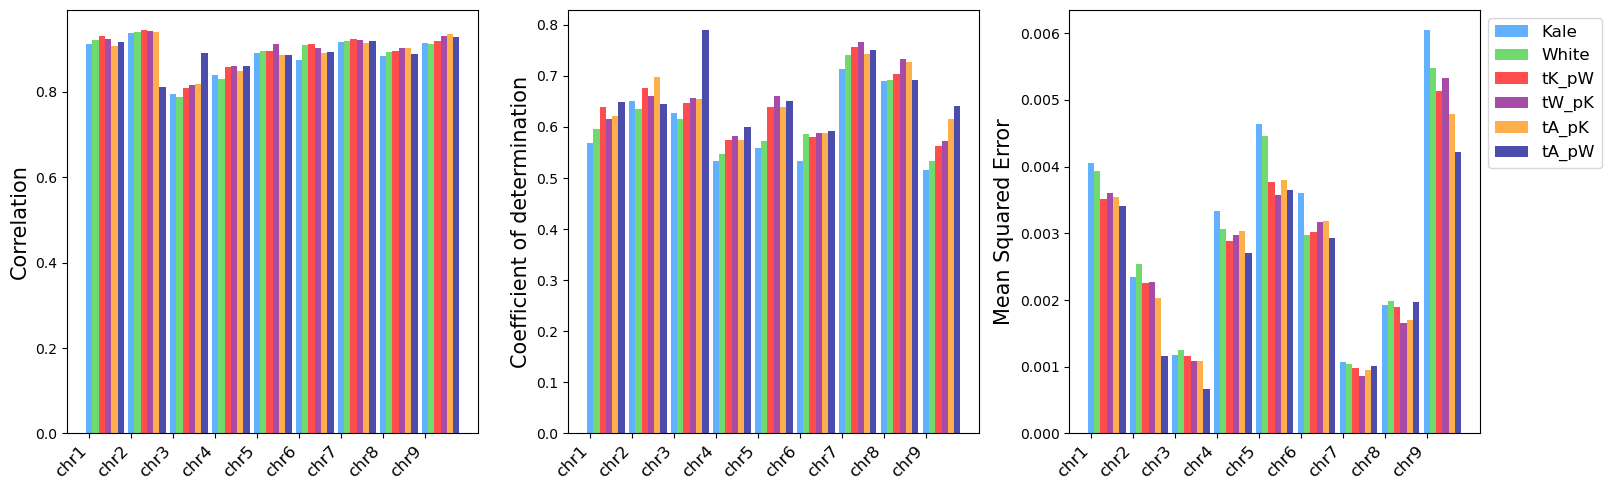

In [64]:
# Adjusting bar width
bar_width = 0.15

# Creating data positions
bar_positions_k = np.arange(len(k_table['chr']))
bar_positions_w = bar_positions_k + bar_width
bar_positions_tk_pw = bar_positions_w + bar_width
bar_positions_tw_pk = bar_positions_tk_pw + bar_width
bar_positions_ta_pk = bar_positions_tw_pk + bar_width
bar_positions_ta_pw = bar_positions_ta_pk + bar_width

# Creating subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# First chart
axs[0].bar(bar_positions_k, k_table['corr'], color='dodgerblue', width=bar_width, label='Kale', alpha=0.7)
axs[0].bar(bar_positions_w, w_table['corr'], color='limegreen', width=bar_width, label='White', alpha=0.7)
axs[0].bar(bar_positions_tk_pw, tk_pw_table['corr'], color='red', width=bar_width, label='tK_pW', alpha=0.7)
axs[0].bar(bar_positions_tw_pk, tw_pk_table['corr'], color='purple', width=bar_width, label='tW_pK', alpha=0.7)
axs[0].bar(bar_positions_ta_pk, ta_pk_table['corr'], color='darkorange', width=bar_width, label='tA_pK', alpha=0.7)
axs[0].bar(bar_positions_ta_pw, ta_pw_table['corr'], color='darkblue', width=bar_width, label='tA_pW', alpha=0.7)

axs[0].set_ylabel('Correlation', fontsize=15)

# Second chart
axs[1].bar(bar_positions_k, k_table['R^2'], color='dodgerblue', width=bar_width, label='Kale', alpha=0.7)
axs[1].bar(bar_positions_w, w_table['R^2'], color='limegreen', width=bar_width, label='White', alpha=0.7)
axs[1].bar(bar_positions_tk_pw, tk_pw_table['R^2'], color='red', width=bar_width, label='tK_pW', alpha=0.7)
axs[1].bar(bar_positions_tw_pk, tw_pk_table['R^2'], color='purple', width=bar_width, label='tW_pK', alpha=0.7)
axs[1].bar(bar_positions_ta_pk, ta_pk_table['R^2'], color='darkorange', width=bar_width, label='tA_pK', alpha=0.7)
axs[1].bar(bar_positions_ta_pw, ta_pw_table['R^2'], color='darkblue', width=bar_width, label='tA_pW', alpha=0.7)

axs[1].set_ylabel('Coefficient of determination', fontsize=15)

# Third chart

axs[2].bar(bar_positions_k, k_table['MSE'], color='dodgerblue', width=bar_width, label='Kale', alpha=0.7)
axs[2].bar(bar_positions_w, w_table['MSE'], color='limegreen', width=bar_width, label='White', alpha=0.7)
axs[2].bar(bar_positions_tk_pw, tk_pw_table['MSE'], color='red', width=bar_width, label='tK_pW', alpha=0.7)
axs[2].bar(bar_positions_tw_pk, tw_pk_table['MSE'], color='purple', width=bar_width, label='tW_pK', alpha=0.7)
axs[2].bar(bar_positions_ta_pk, ta_pk_table['MSE'], color='darkorange', width=bar_width, label='tA_pK', alpha=0.7)
axs[2].bar(bar_positions_ta_pw, ta_pw_table['MSE'], color='darkblue', width=bar_width, label='tA_pW', alpha=0.7)

axs[2].set_ylabel('Mean Squared Error', fontsize=15)

# Get chromosome labels from the 'chr' column
chr_labels = k_table['chr']

# Set x-axis labels for all three subplots
for ax in axs:
    ax.set_xticks(bar_positions_k)
    ax.set_xticklabels(chr_labels)

# Rotate labels for better readability
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Adjusting layout
plt.tight_layout()

# Place legend outside the subplots and above the last subplot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Show the figure
plt.show()

In [65]:
summary = {'Training_set': ['Kale', 'White', 'Kale', 'White', 'All_except_Kale', 'All_except_White'],
           'Testing_set': ['Kale', 'White', 'White', 'Kale', 'Kale', 'White', ],
           'corr': [k_table.describe().iloc[1,0].round(3), w_table.describe().iloc[1,0].round(3), tk_pw_table.describe().iloc[1,0].round(3), tw_pk_table.describe().iloc[1,0].round(3), ta_pk_table.describe().iloc[1,0].round(3), ta_pw_table.describe().iloc[1,0].round(3)],
           'R^2': [k_table.describe().iloc[1,1].round(3), w_table.describe().iloc[1,1].round(3), tk_pw_table.describe().iloc[1,1].round(3), tw_pk_table.describe().iloc[1,1].round(3), ta_pk_table.describe().iloc[1,1].round(3), ta_pw_table.describe().iloc[1,1].round(3)],
           'MSE': [k_table.describe().iloc[1,2].round(3), w_table.describe().iloc[1,2].round(3), tk_pw_table.describe().iloc[1,2].round(3), tw_pk_table.describe().iloc[1,2].round(3), ta_pk_table.describe().iloc[1,2].round(3), ta_pw_table.describe().iloc[1,2].round(3)]}

summary = pd.DataFrame(summary)
summary

Training_set Testing_set   corr    R^2    MSE
0              Kale        Kale  0.886  0.599  0.003
1             White       White  0.891  0.613  0.003
2              Kale       White  0.899  0.642  0.003
3             White        Kale  0.901  0.649  0.003
4   All_except_Kale        Kale  0.894  0.651  0.003
5  All_except_White       White  0.889  0.668  0.002

In [66]:
summary.to_csv('./output/performance_models_kale_white_all.csv', index = None)